# Final Project Notebook

## Project Overview

who are the stakeholders?

Covid-19 has pushed many business online that may have not had a strong online presence. Pivoting

write about e-commerce impact from recommendations.

Book-recommender system is a proof of concept to encourage the new busnisses that have launched online to incorporate a rating and recommender system.



## Data Understanding

In this section you will find...




#### Obtaining the Data

Explain web-scrapping process for reproducibility.

Where to find the functions, how to do it. why did it?

#### Data Properties

How relates to the real world problem.

explain what features the dataset has, which ones will be used for this phase of the project. 

Write about how want to have a good recommendation because want customers to trust the recommendation system so that they continue to use it in the future. 

## Data Preparation and Exploratory Data Analysis

In this section you will find...

#### Import Libraries

The following cell has the libraries needed to perform the operations in this notebook

In [1]:
import pandas as pd

import numpy as np

from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns


import os

from sklearn.preprocessing import LabelEncoder

In [2]:
from pyspark.sql import SparkSession
from pyspark.ml.evaluation import RegressionEvaluator

from pyspark.ml.recommendation import ALS

from pyspark.ml.evaluation import RegressionEvaluator

from pyspark.ml.tuning import CrossValidator, ParamGridBuilder

import pyspark
spark = SparkSession.builder.master('local[*]').appName('capstone').getOrCreate()

# from pyspark.sql.types import IntegerType
from pyspark.sql.functions import isnan, when, count, col
from pyspark.sql.types import *

In [14]:
spark.stop()

ERROR:py4j.java_gateway:An error occurred while trying to connect to the Java server (127.0.0.1:59860)
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.8/site-packages/py4j/java_gateway.py", line 977, in _get_connection
    connection = self.deque.pop()
IndexError: pop from an empty deque

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.8/site-packages/py4j/java_gateway.py", line 1115, in start
    self.socket.connect((self.address, self.port))
ConnectionRefusedError: [Errno 61] Connection refused
/opt/anaconda3/lib/python3.8/site-packages/pyspark/context.py:451: RuntimeWarning: Unable to cleanly shutdown Spark JVM process. It is possible that the process has crashed, been killed or may also be in a zombie state.
  warnings.warn(
ERROR:py4j.java_gateway:An error occurred while trying to connect to the Java server (127.0.0.1:59860)
Traceback (most recent call last):
  File "/o

Py4JNetworkError: An error occurred while trying to connect to the Java server (127.0.0.1:59860)

#### Import Dataset

As mentioned in the previous section, this dataset is a combination of the multiple tables that were exported during the web scrapping process. 

In [2]:
df = pd.read_csv('../../data/final/comb_df.csv')

#### Inspect Dataset

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 157332 entries, 0 to 157331
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   genre             157332 non-null  object 
 1   title             157332 non-null  object 
 2   author            157332 non-null  object 
 3   pages             157332 non-null  object 
 4   unique_key        157332 non-null  object 
 5   average_rating    157332 non-null  float64
 6   book_description  109970 non-null  object 
 7   user_name         157332 non-null  object 
 8   user_unique_key   157332 non-null  object 
 9   number_of_stars   157332 non-null  int64  
 10  book_unique_key   157332 non-null  object 
 11  review_text       154800 non-null  object 
dtypes: float64(1), int64(1), object(10)
memory usage: 14.4+ MB


In [4]:
df.head()

,genre,title,author,pages,unique_key,average_rating,book_description,user_name,user_unique_key,number_of_stars,book_unique_key,review_text
0,short-stories,The Neil Gaiman Reader: Selected Fiction,by Neil Gaiman (Goodreads Author),752 pages,https://www.goodreads.com/book/show/50358085-t...,4.54,An outstanding array—52 pieces in all—of selec...,Kayla Brown,https://www.goodreads.com/user/show/33397902-k...,5,https://www.goodreads.com/book/show/50358085-t...,NaN
1,short-stories,The Neil Gaiman Reader: Selected Fiction,by Neil Gaiman (Goodreads Author),752 pages,https://www.goodreads.com/book/show/50358085-t...,4.54,An outstanding array—52 pieces in all—of selec...,Dan Trefethen,https://www.goodreads.com/user/show/90604449-d...,5,https://www.goodreads.com/book/show/50358085-t...,There are two types of readers in this world:\...
2,short-stories,The Neil Gaiman Reader: Selected Fiction,by Neil Gaiman (Goodreads Author),752 pages,https://www.goodreads.com/book/show/50358085-t...,4.54,An outstanding array—52 pieces in all—of selec...,Jamie (TheRebelliousReader),https://www.goodreads.com/user/show/7515832-ja...,0,https://www.goodreads.com/book/show/50358085-t...,I need this more than I think I've ever needed...
3,short-stories,The Neil Gaiman Reader: Selected Fiction,by Neil Gaiman (Goodreads Author),752 pages,https://www.goodreads.com/book/show/50358085-t...,4.54,An outstanding array—52 pieces in all—of selec...,Adam Di Filippe,https://www.goodreads.com/user/show/5907077-ad...,5,https://www.goodreads.com/book/show/50358085-t...,"I received a free, advanced copy from NetGalle..."
4,short-stories,The Neil Gaiman Reader: Selected Fiction,by Neil Gaiman (Goodreads Author),752 pages,https://www.goodreads.com/book/show/50358085-t...,4.54,An outstanding array—52 pieces in all—of selec...,Morgan,https://www.goodreads.com/user/show/3433933-mo...,0,https://www.goodreads.com/book/show/50358085-t...,"This is a hefty read, but it’s one that can be..."


In [5]:
df.shape

(157332, 12)

In [6]:
df['book_unique_key'].nunique()

484

In [7]:
df['author'].nunique()

415

In [8]:
df['user_unique_key'].nunique()

28959

In [9]:
df['review_text'].nunique()

56058

In [11]:
df.duplicated(subset='user_unique_key',keep=False).sum()

143642

#### Data Preprocessing

Because my scrapper took reviews based on books found on a specific genre's page, there were duplicates between the book ratings because they may have been classified under multiple genres--such as one book falling into fiction, historical fiction, and history genres.

During the data cleaning process I:
- combined the multiple genre book and reviews table to make one combined data frame
- took out the duplicate data left by the scrapping
- removed extraneous text
- removed text in mixed data type columns, such as the word "pages" from the pages columns so that column could be an integer data type


EXPLAIN REASONING BEHIND EACH DECISION.

In [12]:
# replace book unique key link with unique numerical

enc = LabelEncoder()
enc.fit(df['book_unique_key'])
df['book_unique_key'] = enc.transform(df['book_unique_key'])
comb_df2 = df

In [13]:
comb_df2.tail()

,genre,title,author,pages,unique_key,average_rating,book_description,user_name,user_unique_key,number_of_stars,book_unique_key,review_text
157327,adventure,The Sea of Monsters,by Rick Riordan (Goodreads Author),279 pages,https://www.goodreads.com/book/show/28186.The_...,4.24,NaN,ｄａｎｉｅｌａ,https://www.goodreads.com/user/show/69098728,4,105,This was honestly so much fun! I enjoyed this ...
157328,adventure,The Sea of Monsters,by Rick Riordan (Goodreads Author),279 pages,https://www.goodreads.com/book/show/28186.The_...,4.24,NaN,Kyla Harris,https://www.goodreads.com/user/show/27881731-k...,4,105,Plot - 16/20\nCharacters - 16/20\nCreativity -...
157329,adventure,The Sea of Monsters,by Rick Riordan (Goodreads Author),279 pages,https://www.goodreads.com/book/show/28186.The_...,4.24,NaN,Sara,https://www.goodreads.com/user/show/69932312-sara,4,105,I love this Universe!\nThis is a really great ...
157330,adventure,The Sea of Monsters,by Rick Riordan (Goodreads Author),279 pages,https://www.goodreads.com/book/show/28186.The_...,4.24,NaN,Alaina,https://www.goodreads.com/user/show/50620706-a...,5,105,"“Powdered donuts,"" Tyson said earnestly. ""I wi..."
157331,adventure,The Sea of Monsters,by Rick Riordan (Goodreads Author),279 pages,https://www.goodreads.com/book/show/28186.The_...,4.24,NaN,Vanessa J.,https://www.goodreads.com/user/show/19590155-v...,3,105,"3.5 out of 5 stars\n\nDear Percy Jackson fans,..."


In [14]:
# replace user unique key link with unique numerical

enc = LabelEncoder()
enc.fit(comb_df2['user_unique_key'])
comb_df2['user_unique_key'] = enc.transform(comb_df2['user_unique_key'])
comb_df3 = comb_df2
comb_df3.head()

,genre,title,author,pages,unique_key,average_rating,book_description,user_name,user_unique_key,number_of_stars,book_unique_key,review_text
0,short-stories,The Neil Gaiman Reader: Selected Fiction,by Neil Gaiman (Goodreads Author),752 pages,https://www.goodreads.com/book/show/50358085-t...,4.54,An outstanding array—52 pieces in all—of selec...,Kayla Brown,12531,5,287,NaN
1,short-stories,The Neil Gaiman Reader: Selected Fiction,by Neil Gaiman (Goodreads Author),752 pages,https://www.goodreads.com/book/show/50358085-t...,4.54,An outstanding array—52 pieces in all—of selec...,Dan Trefethen,27474,5,287,There are two types of readers in this world:\...
2,short-stories,The Neil Gaiman Reader: Selected Fiction,by Neil Gaiman (Goodreads Author),752 pages,https://www.goodreads.com/book/show/50358085-t...,4.54,An outstanding array—52 pieces in all—of selec...,Jamie (TheRebelliousReader),24616,0,287,I need this more than I think I've ever needed...
3,short-stories,The Neil Gaiman Reader: Selected Fiction,by Neil Gaiman (Goodreads Author),752 pages,https://www.goodreads.com/book/show/50358085-t...,4.54,An outstanding array—52 pieces in all—of selec...,Adam Di Filippe,20526,5,287,"I received a free, advanced copy from NetGalle..."
4,short-stories,The Neil Gaiman Reader: Selected Fiction,by Neil Gaiman (Goodreads Author),752 pages,https://www.goodreads.com/book/show/50358085-t...,4.54,An outstanding array—52 pieces in all—of selec...,Morgan,12873,0,287,"This is a hefty read, but it’s one that can be..."


In [39]:
# remove extraneous text in author column

comb_df3['author'] = comb_df3['author'].replace({'by ': '', "(Goodreads Author)": ''}, regex=True)
comb_df4= comb_df3
comb_df4.head()

,genre,title,author,pages,unique_key,average_rating,book_description,user_name,user_unique_key,number_of_stars,book_unique_key,review_text
0,short-stories,The Neil Gaiman Reader: Selected Fiction,Neil Gaiman (),752,https://www.goodreads.com/book/show/50358085-t...,4.54,An outstanding array—52 pieces in all—of selec...,Kayla Brown,12531,5,287,NaN
1,short-stories,The Neil Gaiman Reader: Selected Fiction,Neil Gaiman (),752,https://www.goodreads.com/book/show/50358085-t...,4.54,An outstanding array—52 pieces in all—of selec...,Dan Trefethen,27474,5,287,There are two types of readers in this world:\...
2,short-stories,The Neil Gaiman Reader: Selected Fiction,Neil Gaiman (),752,https://www.goodreads.com/book/show/50358085-t...,4.54,An outstanding array—52 pieces in all—of selec...,Jamie (TheRebelliousReader),24616,0,287,I need this more than I think I've ever needed...
3,short-stories,The Neil Gaiman Reader: Selected Fiction,Neil Gaiman (),752,https://www.goodreads.com/book/show/50358085-t...,4.54,An outstanding array—52 pieces in all—of selec...,Adam Di Filippe,20526,5,287,"I received a free, advanced copy from NetGalle..."
4,short-stories,The Neil Gaiman Reader: Selected Fiction,Neil Gaiman (),752,https://www.goodreads.com/book/show/50358085-t...,4.54,An outstanding array—52 pieces in all—of selec...,Morgan,12873,0,287,"This is a hefty read, but it’s one that can be..."


In [17]:
# remove extraneous text in pages column

comb_df4['pages'] = comb_df4['pages'].replace({'pages': ''}, regex=True)
comb_df5= comb_df4
comb_df5.head()

,genre,title,author,pages,unique_key,average_rating,book_description,user_name,user_unique_key,number_of_stars,book_unique_key,review_text
0,short-stories,The Neil Gaiman Reader: Selected Fiction,Neil Gaiman (),752,https://www.goodreads.com/book/show/50358085-t...,4.54,An outstanding array—52 pieces in all—of selec...,Kayla Brown,12531,5,287,NaN
1,short-stories,The Neil Gaiman Reader: Selected Fiction,Neil Gaiman (),752,https://www.goodreads.com/book/show/50358085-t...,4.54,An outstanding array—52 pieces in all—of selec...,Dan Trefethen,27474,5,287,There are two types of readers in this world:\...
2,short-stories,The Neil Gaiman Reader: Selected Fiction,Neil Gaiman (),752,https://www.goodreads.com/book/show/50358085-t...,4.54,An outstanding array—52 pieces in all—of selec...,Jamie (TheRebelliousReader),24616,0,287,I need this more than I think I've ever needed...
3,short-stories,The Neil Gaiman Reader: Selected Fiction,Neil Gaiman (),752,https://www.goodreads.com/book/show/50358085-t...,4.54,An outstanding array—52 pieces in all—of selec...,Adam Di Filippe,20526,5,287,"I received a free, advanced copy from NetGalle..."
4,short-stories,The Neil Gaiman Reader: Selected Fiction,Neil Gaiman (),752,https://www.goodreads.com/book/show/50358085-t...,4.54,An outstanding array—52 pieces in all—of selec...,Morgan,12873,0,287,"This is a hefty read, but it’s one that can be..."


In [19]:
# remove unnessary columns
# dropping unique_key column because it is a duplicate of book unique key
# dropping user_name column because user_unique_key serves the same purpose and 
# addresses any similarities there may be within user names

comb_df6= comb_df5.drop(['unique_key', 'user_name'], axis= 1)
comb_df6.head() 


,genre,title,author,pages,average_rating,book_description,user_unique_key,number_of_stars,book_unique_key,review_text
0,short-stories,The Neil Gaiman Reader: Selected Fiction,Neil Gaiman (),752,4.54,An outstanding array—52 pieces in all—of selec...,12531,5,287,NaN
1,short-stories,The Neil Gaiman Reader: Selected Fiction,Neil Gaiman (),752,4.54,An outstanding array—52 pieces in all—of selec...,27474,5,287,There are two types of readers in this world:\...
2,short-stories,The Neil Gaiman Reader: Selected Fiction,Neil Gaiman (),752,4.54,An outstanding array—52 pieces in all—of selec...,24616,0,287,I need this more than I think I've ever needed...
3,short-stories,The Neil Gaiman Reader: Selected Fiction,Neil Gaiman (),752,4.54,An outstanding array—52 pieces in all—of selec...,20526,5,287,"I received a free, advanced copy from NetGalle..."
4,short-stories,The Neil Gaiman Reader: Selected Fiction,Neil Gaiman (),752,4.54,An outstanding array—52 pieces in all—of selec...,12873,0,287,"This is a hefty read, but it’s one that can be..."


In [30]:

comb_df7= comb_df6.drop_duplicates(subset=['user_unique_key', 'book_unique_key'], keep='first')
comb_df7.head()

,genre,title,author,pages,average_rating,book_description,user_unique_key,number_of_stars,book_unique_key,review_text
0,short-stories,The Neil Gaiman Reader: Selected Fiction,Neil Gaiman (),752,4.54,An outstanding array—52 pieces in all—of selec...,12531,5,287,NaN
1,short-stories,The Neil Gaiman Reader: Selected Fiction,Neil Gaiman (),752,4.54,An outstanding array—52 pieces in all—of selec...,27474,5,287,There are two types of readers in this world:\...
2,short-stories,The Neil Gaiman Reader: Selected Fiction,Neil Gaiman (),752,4.54,An outstanding array—52 pieces in all—of selec...,24616,0,287,I need this more than I think I've ever needed...
3,short-stories,The Neil Gaiman Reader: Selected Fiction,Neil Gaiman (),752,4.54,An outstanding array—52 pieces in all—of selec...,20526,5,287,"I received a free, advanced copy from NetGalle..."
4,short-stories,The Neil Gaiman Reader: Selected Fiction,Neil Gaiman (),752,4.54,An outstanding array—52 pieces in all—of selec...,12873,0,287,"This is a hefty read, but it’s one that can be..."


In [21]:
comb_df7.head()

,genre,title,author,pages,average_rating,book_description,user_unique_key,number_of_stars,book_unique_key,review_text
0,short-stories,The Neil Gaiman Reader: Selected Fiction,Neil Gaiman (),752,4.54,An outstanding array—52 pieces in all—of selec...,12531,5,287,NaN
1,short-stories,The Neil Gaiman Reader: Selected Fiction,Neil Gaiman (),752,4.54,An outstanding array—52 pieces in all—of selec...,27474,5,287,There are two types of readers in this world:\...
2,short-stories,The Neil Gaiman Reader: Selected Fiction,Neil Gaiman (),752,4.54,An outstanding array—52 pieces in all—of selec...,24616,0,287,I need this more than I think I've ever needed...
3,short-stories,The Neil Gaiman Reader: Selected Fiction,Neil Gaiman (),752,4.54,An outstanding array—52 pieces in all—of selec...,20526,5,287,"I received a free, advanced copy from NetGalle..."
4,short-stories,The Neil Gaiman Reader: Selected Fiction,Neil Gaiman (),752,4.54,An outstanding array—52 pieces in all—of selec...,12873,0,287,"This is a hefty read, but it’s one that can be..."


In [26]:
# remove ratings with "0" stars because these represent readers who wrote a review but did not give it a rating.
# for the moment, we are only interested in readers who gave it a rating. Ratings are from 1-5 stars.

comb_df8= comb_df7[comb_df7.number_of_stars != 0]

In [29]:
comb_df8.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 55079 entries, 0 to 157121
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   genre             55079 non-null  object 
 1   title             55079 non-null  object 
 2   author            55079 non-null  object 
 3   pages             55079 non-null  object 
 4   average_rating    55079 non-null  float64
 5   book_description  41148 non-null  object 
 6   user_unique_key   55079 non-null  int64  
 7   number_of_stars   55079 non-null  int64  
 8   book_unique_key   55079 non-null  int64  
 9   review_text       54016 non-null  object 
dtypes: float64(1), int64(3), object(6)
memory usage: 4.6+ MB


##### From the summary above we see that are some missing values in some of the columns. For this stage of the project, it is fine to leave them as is. For this first phase I am intersted in having a book_unique_key and number_of_stars that are not empty. If I were to remove the empty rows based on null values in book_description and review_text, I would lose rows wit valid data for this first phase.  Removing these missing values can be done during the second phase of the project when more data is added to the overall dataset.

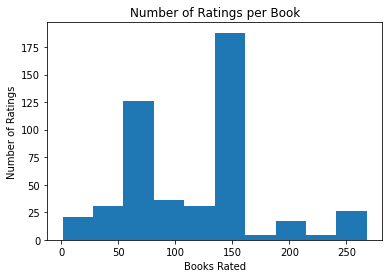

In [34]:
ratings_num=comb_df8.groupby('book_unique_key')['number_of_stars'].count().sort_values()

plt.hist(ratings_num);
plt.xlabel('Books Rated')
plt.ylabel('Number of Ratings')
plt.title('Number of Ratings per Book')
#plt.grid(True)
plt.show()

In [44]:
# saving cleaned data to import it into a spark dataframe for modeling
# could use dataframe without saving to external csv, but I wanted to save a copy of clean data for future processing

comb_df8.to_csv('../../data/final/comb_df_full.csv', index=False)


In [18]:
small = df_pd[['user_unique_key', 'number_of_stars', 'book_unique_key']]

In [3]:
small.to_csv('../../data/final/comb_df_sm.csv', index=False)

NameError: name 'small' is not defined

## Modeling

During the modeling process...

EXPLAIN pyspark ALS


In [3]:
# df_pd= pd.read_csv('../../data/final/comb_df_clean.csv')


In [4]:
# setting a schema to let spark know what data types to import the columns as from the csv

# schema = StructType([StructField("genre", StringType(), True),StructField("title", StringType(), True), 
#                      StructField("author", StringType(), True), StructField("pages", IntegerType(), True), 
#                      StructField("average_rating", FloatType(), True), StructField("book_description", StringType(), True), 
#                      StructField("user_unique_key", IntegerType(), True),StructField("number_of_stars", IntegerType(), True), 
#                      StructField("book_unique_key", IntegerType(), True), StructField("review_text", StringType(), True)])

# df_sp = spark.createDataFrame(df_pd, schema=schema)

In [3]:
df_pd= pd.read_csv('../../data/final/comb_df_sm.csv')

In [4]:
schema = StructType([StructField("user_unique_key", IntegerType(), True),StructField("number_of_stars", IntegerType(), True), 
                      StructField("book_unique_key", IntegerType(), True)])

df_sp = spark.createDataFrame(df_pd, schema=schema)

SPARCITY:

In [5]:
stars_num= df_sp.select("number_of_stars").count()


users = df_sp.select("user_unique_key").distinct().count()
books = df_sp.select("book_unique_key").distinct().count()


denominator = users * books


sparsity = (1.0 - (stars_num *1.0)/denominator)*100
print("The ratings dataframe is ", "%.2f" % sparsity + "% empty.")

The ratings dataframe is  99.60% empty.


In [5]:
train, test = df_sp.randomSplit([0.8, 0.2], seed= 2020)

#### First Simple Model(FSM)

In [6]:
als = ALS(userCol='user_unique_key', itemCol='book_unique_key', 
          ratingCol='number_of_stars',
          coldStartStrategy='drop')


model_fsm = als.fit(train)


In [7]:
predictions = model_fsm.transform(test)

In [8]:
evaluator = RegressionEvaluator(metricName='rmse', labelCol='number_of_stars',
                                predictionCol='prediction')
rmse = evaluator.evaluate(predictions)
print('The RMSE is= ' + str(rmse))

The RMSE is= 1.5986875907003517


In [9]:
evaluator2 = RegressionEvaluator(metricName='mae', labelCol='number_of_stars',
                                predictionCol='prediction')
mae = evaluator2.evaluate(predictions)
print('The MAE is = ' + str(mae))

The MAE is = 1.2244768512854267


In [10]:
als2 = ALS(maxIter=5,rank=4, 
          userCol='user_unique_key', itemCol='book_unique_key', 
          ratingCol='number_of_stars',
          coldStartStrategy='drop', seed= 2020)


model_2 = als2.fit(train)
predictions2 = model_2.transform(test)
predictions2.show()

+---------------+---------------+---------------+----------+
|user_unique_key|number_of_stars|book_unique_key|prediction|
+---------------+---------------+---------------+----------+
|          15108|              4|            148|  4.440096|
|          23425|              5|            148| 2.3717651|
|           1114|              4|            148| 1.5453693|
|          22818|              5|            148|  4.038414|
|          19906|              5|            148| 3.7037847|
|          24328|              4|            148|   3.44603|
|          19732|              4|            148| 3.6605346|
|           6728|              4|            148| 2.8172495|
|          19599|              4|            148| 3.8714411|
|          13901|              5|            148| 3.5737967|
|          28773|              5|            148| 3.1483269|
|          21987|              3|            148| 3.8977916|
|          16454|              3|            148| 4.5940084|
|          14344|       

In [13]:
rmse2 = evaluator.evaluate(predictions2)
print('The RMSE for Model 2 is= ' + str(rmse2))

The RMSE for Model 2 is= 1.9110262281206258


In [14]:
mae2 = evaluator2.evaluate(predictions2)
print('The MAE for Model 2 is = ' + str(mae2))

The MAE for Model 2 is = 1.3487552461758907


Model 2 did worse than the first model. So I will try and put the numbers higher than the automatic values of 

In [16]:
als3 = ALS(maxIter=15,rank=10, 
          userCol='user_unique_key', itemCol='book_unique_key', 
          ratingCol='number_of_stars',
          coldStartStrategy='drop', seed= 2020)


model_3 = als3.fit(train)
predictions3 = model_3.transform(test)


In [17]:
rmse3 = evaluator.evaluate(predictions3)
print('The RMSE for Model 3 is= ' + str(rmse3))
mae3 = evaluator2.evaluate(predictions3)
print('The MAE for Model 3 is = ' + str(mae3))

The RMSE for Model 3 is= 1.3476289986585732
The MAE for Model 3 is = 1.04600046428953


In [19]:
als4 = ALS(maxIter=15,rank=15, 
          userCol='user_unique_key', itemCol='book_unique_key', 
          ratingCol='number_of_stars',
          coldStartStrategy='drop', seed= 2020)


model_4 = als4.fit(train)
predictions4 = model_4.transform(test)

In [20]:
rmse4 = evaluator.evaluate(predictions4)
print('The RMSE for Model 4 is= ' + str(rmse4))
mae4 = evaluator2.evaluate(predictions4)
print('The MAE for Model 4 is = ' + str(mae4))

The RMSE for Model 4 is= 1.3560000712066078
The MAE for Model 4 is = 1.0610425236177448


In [21]:
als5 = ALS(maxIter=20,rank=10, 
          userCol='user_unique_key', itemCol='book_unique_key', 
          ratingCol='number_of_stars',
          coldStartStrategy='drop', seed= 2020)

model_5 = als5.fit(train)
predictions5 = model_5.transform(test)

In [22]:
rmse5 = evaluator.evaluate(predictions5)
print('The RMSE for Model 5 is= ' + str(rmse5))
mae5 = evaluator2.evaluate(predictions5)
print('The MAE for Model 5 is = ' + str(mae5))

The RMSE for Model 5 is= 1.269203298147445
The MAE for Model 5 is = 0.9883590474245254


In [27]:
als6 = ALS(maxIter=25,rank=10, 
          userCol='user_unique_key', itemCol='book_unique_key', 
          ratingCol='number_of_stars',
          coldStartStrategy='drop', seed= 2020)

model_6 = als6.fit(train)
predictions6 = model_6.transform(test)

ERROR:py4j.java_gateway:An error occurred while trying to connect to the Java server (127.0.0.1:61551)
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.8/site-packages/py4j/java_gateway.py", line 977, in _get_connection
    connection = self.deque.pop()
IndexError: pop from an empty deque

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.8/site-packages/py4j/java_gateway.py", line 1115, in start
    self.socket.connect((self.address, self.port))
ConnectionRefusedError: [Errno 61] Connection refused


Py4JNetworkError: An error occurred while trying to connect to the Java server (127.0.0.1:61551)

In [23]:
rmse6 = evaluator.evaluate(predictions6)
print('The RMSE for Model 6 is= ' + str(rmse6))
mae6 = evaluator2.evaluate(predictions6)
print('The MAE for Model 6 is = ' + str(mae6))

NameError: name 'predictions6' is not defined

In [9]:
als_model_reg = ALS(userCol='user_unique_key', itemCol='book_unique_key',ratingCol='number_of_stars',
                nonnegative=True,implicitPrefs=False, 
                coldStartStrategy='drop')

model_reg = als_model_reg.fit(train)

In [10]:
pred = model_reg.transform(test)

In [11]:
evaluator_reg = RegressionEvaluator(metricName='rmse', labelCol='number_of_stars',
                                predictionCol='prediction')

In [12]:
# params=ParamGridBuilder()
params = ParamGridBuilder().addGrid(als_model_reg.regParam, [0.01, 0.05, .1, 1.5]) \
        .addGrid(als_model_reg.rank, [4, 10, 30]) \
        .addGrid(als_model_reg.maxIter, [5, 15, 30]).build()
    


In [13]:
cv= CrossValidator()
crossval = CrossValidator(estimator=als_model_reg, 
                          estimatorParamMaps=params,
                          evaluator=evaluator_reg,
                          numFolds= 5)

In [14]:
print(crossval)

CrossValidator_508cc021c8aa


In [15]:
model= crossval.fit(train)  
#type(crossval)

Py4JJavaError: An error occurred while calling o648.fit.
: org.apache.spark.SparkException: Job aborted due to stage failure: Task 6 in stage 281.0 failed 1 times, most recent failure: Lost task 6.0 in stage 281.0 (TID 2653, 10.0.0.8, executor driver): java.lang.StackOverflowError
	at java.io.ObjectInputStream.readHandle(ObjectInputStream.java:1778)
	at java.io.ObjectInputStream.readClassDesc(ObjectInputStream.java:1842)
	at java.io.ObjectInputStream.readOrdinaryObject(ObjectInputStream.java:2160)
	at java.io.ObjectInputStream.readObject0(ObjectInputStream.java:1667)
	at java.io.ObjectInputStream.defaultReadFields(ObjectInputStream.java:2405)
	at java.io.ObjectInputStream.readSerialData(ObjectInputStream.java:2329)
	at java.io.ObjectInputStream.readOrdinaryObject(ObjectInputStream.java:2187)
	at java.io.ObjectInputStream.readObject0(ObjectInputStream.java:1667)
	at java.io.ObjectInputStream.defaultReadFields(ObjectInputStream.java:2405)
	at java.io.ObjectInputStream.readSerialData(ObjectInputStream.java:2329)
	at java.io.ObjectInputStream.readOrdinaryObject(ObjectInputStream.java:2187)
	at java.io.ObjectInputStream.readObject0(ObjectInputStream.java:1667)
	at java.io.ObjectInputStream.readObject(ObjectInputStream.java:503)
	at java.io.ObjectInputStream.readObject(ObjectInputStream.java:461)
	at scala.collection.immutable.List$SerializationProxy.readObject(List.scala:488)
	at sun.reflect.GeneratedMethodAccessor37.invoke(Unknown Source)
	at sun.reflect.DelegatingMethodAccessorImpl.invoke(DelegatingMethodAccessorImpl.java:43)
	at java.lang.reflect.Method.invoke(Method.java:498)
	at java.io.ObjectStreamClass.invokeReadObject(ObjectStreamClass.java:1184)
	at java.io.ObjectInputStream.readSerialData(ObjectInputStream.java:2296)
	at java.io.ObjectInputStream.readOrdinaryObject(ObjectInputStream.java:2187)
	at java.io.ObjectInputStream.readObject0(ObjectInputStream.java:1667)
	at java.io.ObjectInputStream.defaultReadFields(ObjectInputStream.java:2405)
	at java.io.ObjectInputStream.readSerialData(ObjectInputStream.java:2329)
	at java.io.ObjectInputStream.readOrdinaryObject(ObjectInputStream.java:2187)
	at java.io.ObjectInputStream.readObject0(ObjectInputStream.java:1667)
	at java.io.ObjectInputStream.defaultReadFields(ObjectInputStream.java:2405)
	at java.io.ObjectInputStream.readSerialData(ObjectInputStream.java:2329)
	at java.io.ObjectInputStream.readOrdinaryObject(ObjectInputStream.java:2187)
	at java.io.ObjectInputStream.readObject0(ObjectInputStream.java:1667)
	at java.io.ObjectInputStream.readObject(ObjectInputStream.java:503)
	at java.io.ObjectInputStream.readObject(ObjectInputStream.java:461)
	at scala.collection.immutable.List$SerializationProxy.readObject(List.scala:488)
	at sun.reflect.GeneratedMethodAccessor37.invoke(Unknown Source)
	at sun.reflect.DelegatingMethodAccessorImpl.invoke(DelegatingMethodAccessorImpl.java:43)
	at java.lang.reflect.Method.invoke(Method.java:498)
	at java.io.ObjectStreamClass.invokeReadObject(ObjectStreamClass.java:1184)
	at java.io.ObjectInputStream.readSerialData(ObjectInputStream.java:2296)
	at java.io.ObjectInputStream.readOrdinaryObject(ObjectInputStream.java:2187)
	at java.io.ObjectInputStream.readObject0(ObjectInputStream.java:1667)
	at java.io.ObjectInputStream.defaultReadFields(ObjectInputStream.java:2405)
	at java.io.ObjectInputStream.readSerialData(ObjectInputStream.java:2329)
	at java.io.ObjectInputStream.readOrdinaryObject(ObjectInputStream.java:2187)
	at java.io.ObjectInputStream.readObject0(ObjectInputStream.java:1667)
	at java.io.ObjectInputStream.defaultReadFields(ObjectInputStream.java:2405)
	at java.io.ObjectInputStream.readSerialData(ObjectInputStream.java:2329)
	at java.io.ObjectInputStream.readOrdinaryObject(ObjectInputStream.java:2187)
	at java.io.ObjectInputStream.readObject0(ObjectInputStream.java:1667)
	at java.io.ObjectInputStream.readObject(ObjectInputStream.java:503)
	at java.io.ObjectInputStream.readObject(ObjectInputStream.java:461)
	at scala.collection.immutable.List$SerializationProxy.readObject(List.scala:488)
	at sun.reflect.GeneratedMethodAccessor37.invoke(Unknown Source)
	at sun.reflect.DelegatingMethodAccessorImpl.invoke(DelegatingMethodAccessorImpl.java:43)
	at java.lang.reflect.Method.invoke(Method.java:498)
	at java.io.ObjectStreamClass.invokeReadObject(ObjectStreamClass.java:1184)
	at java.io.ObjectInputStream.readSerialData(ObjectInputStream.java:2296)
	at java.io.ObjectInputStream.readOrdinaryObject(ObjectInputStream.java:2187)
	at java.io.ObjectInputStream.readObject0(ObjectInputStream.java:1667)
	at java.io.ObjectInputStream.defaultReadFields(ObjectInputStream.java:2405)
	at java.io.ObjectInputStream.readSerialData(ObjectInputStream.java:2329)
	at java.io.ObjectInputStream.readOrdinaryObject(ObjectInputStream.java:2187)
	at java.io.ObjectInputStream.readObject0(ObjectInputStream.java:1667)
	at java.io.ObjectInputStream.defaultReadFields(ObjectInputStream.java:2405)
	at java.io.ObjectInputStream.readSerialData(ObjectInputStream.java:2329)
	at java.io.ObjectInputStream.readOrdinaryObject(ObjectInputStream.java:2187)
	at java.io.ObjectInputStream.readObject0(ObjectInputStream.java:1667)
	at java.io.ObjectInputStream.readObject(ObjectInputStream.java:503)
	at java.io.ObjectInputStream.readObject(ObjectInputStream.java:461)
	at scala.collection.immutable.List$SerializationProxy.readObject(List.scala:488)
	at sun.reflect.GeneratedMethodAccessor37.invoke(Unknown Source)
	at sun.reflect.DelegatingMethodAccessorImpl.invoke(DelegatingMethodAccessorImpl.java:43)
	at java.lang.reflect.Method.invoke(Method.java:498)
	at java.io.ObjectStreamClass.invokeReadObject(ObjectStreamClass.java:1184)
	at java.io.ObjectInputStream.readSerialData(ObjectInputStream.java:2296)
	at java.io.ObjectInputStream.readOrdinaryObject(ObjectInputStream.java:2187)
	at java.io.ObjectInputStream.readObject0(ObjectInputStream.java:1667)
	at java.io.ObjectInputStream.defaultReadFields(ObjectInputStream.java:2405)
	at java.io.ObjectInputStream.readSerialData(ObjectInputStream.java:2329)
	at java.io.ObjectInputStream.readOrdinaryObject(ObjectInputStream.java:2187)
	at java.io.ObjectInputStream.readObject0(ObjectInputStream.java:1667)
	at java.io.ObjectInputStream.defaultReadFields(ObjectInputStream.java:2405)
	at java.io.ObjectInputStream.readSerialData(ObjectInputStream.java:2329)
	at java.io.ObjectInputStream.readOrdinaryObject(ObjectInputStream.java:2187)
	at java.io.ObjectInputStream.readObject0(ObjectInputStream.java:1667)
	at java.io.ObjectInputStream.readObject(ObjectInputStream.java:503)
	at java.io.ObjectInputStream.readObject(ObjectInputStream.java:461)
	at scala.collection.immutable.List$SerializationProxy.readObject(List.scala:488)
	at sun.reflect.GeneratedMethodAccessor37.invoke(Unknown Source)
	at sun.reflect.DelegatingMethodAccessorImpl.invoke(DelegatingMethodAccessorImpl.java:43)
	at java.lang.reflect.Method.invoke(Method.java:498)
	at java.io.ObjectStreamClass.invokeReadObject(ObjectStreamClass.java:1184)
	at java.io.ObjectInputStream.readSerialData(ObjectInputStream.java:2296)
	at java.io.ObjectInputStream.readOrdinaryObject(ObjectInputStream.java:2187)
	at java.io.ObjectInputStream.readObject0(ObjectInputStream.java:1667)
	at java.io.ObjectInputStream.defaultReadFields(ObjectInputStream.java:2405)
	at java.io.ObjectInputStream.readSerialData(ObjectInputStream.java:2329)
	at java.io.ObjectInputStream.readOrdinaryObject(ObjectInputStream.java:2187)
	at java.io.ObjectInputStream.readObject0(ObjectInputStream.java:1667)
	at java.io.ObjectInputStream.defaultReadFields(ObjectInputStream.java:2405)
	at java.io.ObjectInputStream.readSerialData(ObjectInputStream.java:2329)
	at java.io.ObjectInputStream.readOrdinaryObject(ObjectInputStream.java:2187)
	at java.io.ObjectInputStream.readObject0(ObjectInputStream.java:1667)
	at java.io.ObjectInputStream.readArray(ObjectInputStream.java:2093)
	at java.io.ObjectInputStream.readObject0(ObjectInputStream.java:1655)
	at java.io.ObjectInputStream.defaultReadFields(ObjectInputStream.java:2405)
	at java.io.ObjectInputStream.readSerialData(ObjectInputStream.java:2329)
	at java.io.ObjectInputStream.readOrdinaryObject(ObjectInputStream.java:2187)
	at java.io.ObjectInputStream.readObject0(ObjectInputStream.java:1667)
	at java.io.ObjectInputStream.defaultReadFields(ObjectInputStream.java:2405)
	at java.io.ObjectInputStream.readSerialData(ObjectInputStream.java:2329)
	at java.io.ObjectInputStream.readOrdinaryObject(ObjectInputStream.java:2187)
	at java.io.ObjectInputStream.readObject0(ObjectInputStream.java:1667)
	at java.io.ObjectInputStream.defaultReadFields(ObjectInputStream.java:2405)
	at java.io.ObjectInputStream.readSerialData(ObjectInputStream.java:2329)
	at java.io.ObjectInputStream.readOrdinaryObject(ObjectInputStream.java:2187)
	at java.io.ObjectInputStream.readObject0(ObjectInputStream.java:1667)
	at java.io.ObjectInputStream.defaultReadFields(ObjectInputStream.java:2405)
	at java.io.ObjectInputStream.readSerialData(ObjectInputStream.java:2329)
	at java.io.ObjectInputStream.readOrdinaryObject(ObjectInputStream.java:2187)
	at java.io.ObjectInputStream.readObject0(ObjectInputStream.java:1667)
	at java.io.ObjectInputStream.readObject(ObjectInputStream.java:503)
	at java.io.ObjectInputStream.readObject(ObjectInputStream.java:461)
	at scala.collection.immutable.List$SerializationProxy.readObject(List.scala:488)
	at sun.reflect.GeneratedMethodAccessor37.invoke(Unknown Source)
	at sun.reflect.DelegatingMethodAccessorImpl.invoke(DelegatingMethodAccessorImpl.java:43)
	at java.lang.reflect.Method.invoke(Method.java:498)
	at java.io.ObjectStreamClass.invokeReadObject(ObjectStreamClass.java:1184)
	at java.io.ObjectInputStream.readSerialData(ObjectInputStream.java:2296)
	at java.io.ObjectInputStream.readOrdinaryObject(ObjectInputStream.java:2187)
	at java.io.ObjectInputStream.readObject0(ObjectInputStream.java:1667)
	at java.io.ObjectInputStream.defaultReadFields(ObjectInputStream.java:2405)
	at java.io.ObjectInputStream.readSerialData(ObjectInputStream.java:2329)
	at java.io.ObjectInputStream.readOrdinaryObject(ObjectInputStream.java:2187)
	at java.io.ObjectInputStream.readObject0(ObjectInputStream.java:1667)
	at java.io.ObjectInputStream.defaultReadFields(ObjectInputStream.java:2405)
	at java.io.ObjectInputStream.readSerialData(ObjectInputStream.java:2329)
	at java.io.ObjectInputStream.readOrdinaryObject(ObjectInputStream.java:2187)
	at java.io.ObjectInputStream.readObject0(ObjectInputStream.java:1667)
	at java.io.ObjectInputStream.readObject(ObjectInputStream.java:503)
	at java.io.ObjectInputStream.readObject(ObjectInputStream.java:461)
	at scala.collection.immutable.List$SerializationProxy.readObject(List.scala:488)
	at sun.reflect.GeneratedMethodAccessor37.invoke(Unknown Source)
	at sun.reflect.DelegatingMethodAccessorImpl.invoke(DelegatingMethodAccessorImpl.java:43)
	at java.lang.reflect.Method.invoke(Method.java:498)
	at java.io.ObjectStreamClass.invokeReadObject(ObjectStreamClass.java:1184)
	at java.io.ObjectInputStream.readSerialData(ObjectInputStream.java:2296)
	at java.io.ObjectInputStream.readOrdinaryObject(ObjectInputStream.java:2187)
	at java.io.ObjectInputStream.readObject0(ObjectInputStream.java:1667)
	at java.io.ObjectInputStream.defaultReadFields(ObjectInputStream.java:2405)
	at java.io.ObjectInputStream.readSerialData(ObjectInputStream.java:2329)
	at java.io.ObjectInputStream.readOrdinaryObject(ObjectInputStream.java:2187)
	at java.io.ObjectInputStream.readObject0(ObjectInputStream.java:1667)
	at java.io.ObjectInputStream.defaultReadFields(ObjectInputStream.java:2405)
	at java.io.ObjectInputStream.readSerialData(ObjectInputStream.java:2329)
	at java.io.ObjectInputStream.readOrdinaryObject(ObjectInputStream.java:2187)
	at java.io.ObjectInputStream.readObject0(ObjectInputStream.java:1667)
	at java.io.ObjectInputStream.readObject(ObjectInputStream.java:503)
	at java.io.ObjectInputStream.readObject(ObjectInputStream.java:461)
	at scala.collection.immutable.List$SerializationProxy.readObject(List.scala:488)
	at sun.reflect.GeneratedMethodAccessor37.invoke(Unknown Source)
	at sun.reflect.DelegatingMethodAccessorImpl.invoke(DelegatingMethodAccessorImpl.java:43)
	at java.lang.reflect.Method.invoke(Method.java:498)
	at java.io.ObjectStreamClass.invokeReadObject(ObjectStreamClass.java:1184)
	at java.io.ObjectInputStream.readSerialData(ObjectInputStream.java:2296)
	at java.io.ObjectInputStream.readOrdinaryObject(ObjectInputStream.java:2187)
	at java.io.ObjectInputStream.readObject0(ObjectInputStream.java:1667)
	at java.io.ObjectInputStream.defaultReadFields(ObjectInputStream.java:2405)
	at java.io.ObjectInputStream.readSerialData(ObjectInputStream.java:2329)
	at java.io.ObjectInputStream.readOrdinaryObject(ObjectInputStream.java:2187)
	at java.io.ObjectInputStream.readObject0(ObjectInputStream.java:1667)
	at java.io.ObjectInputStream.defaultReadFields(ObjectInputStream.java:2405)
	at java.io.ObjectInputStream.readSerialData(ObjectInputStream.java:2329)
	at java.io.ObjectInputStream.readOrdinaryObject(ObjectInputStream.java:2187)
	at java.io.ObjectInputStream.readObject0(ObjectInputStream.java:1667)
	at java.io.ObjectInputStream.readObject(ObjectInputStream.java:503)
	at java.io.ObjectInputStream.readObject(ObjectInputStream.java:461)
	at scala.collection.immutable.List$SerializationProxy.readObject(List.scala:488)
	at sun.reflect.GeneratedMethodAccessor37.invoke(Unknown Source)
	at sun.reflect.DelegatingMethodAccessorImpl.invoke(DelegatingMethodAccessorImpl.java:43)
	at java.lang.reflect.Method.invoke(Method.java:498)
	at java.io.ObjectStreamClass.invokeReadObject(ObjectStreamClass.java:1184)
	at java.io.ObjectInputStream.readSerialData(ObjectInputStream.java:2296)
	at java.io.ObjectInputStream.readOrdinaryObject(ObjectInputStream.java:2187)
	at java.io.ObjectInputStream.readObject0(ObjectInputStream.java:1667)
	at java.io.ObjectInputStream.defaultReadFields(ObjectInputStream.java:2405)
	at java.io.ObjectInputStream.readSerialData(ObjectInputStream.java:2329)
	at java.io.ObjectInputStream.readOrdinaryObject(ObjectInputStream.java:2187)
	at java.io.ObjectInputStream.readObject0(ObjectInputStream.java:1667)
	at java.io.ObjectInputStream.defaultReadFields(ObjectInputStream.java:2405)
	at java.io.ObjectInputStream.readSerialData(ObjectInputStream.java:2329)
	at java.io.ObjectInputStream.readOrdinaryObject(ObjectInputStream.java:2187)
	at java.io.ObjectInputStream.readObject0(ObjectInputStream.java:1667)
	at java.io.ObjectInputStream.readObject(ObjectInputStream.java:503)
	at java.io.ObjectInputStream.readObject(ObjectInputStream.java:461)
	at scala.collection.immutable.List$SerializationProxy.readObject(List.scala:488)
	at sun.reflect.GeneratedMethodAccessor37.invoke(Unknown Source)
	at sun.reflect.DelegatingMethodAccessorImpl.invoke(DelegatingMethodAccessorImpl.java:43)
	at java.lang.reflect.Method.invoke(Method.java:498)
	at java.io.ObjectStreamClass.invokeReadObject(ObjectStreamClass.java:1184)
	at java.io.ObjectInputStream.readSerialData(ObjectInputStream.java:2296)
	at java.io.ObjectInputStream.readOrdinaryObject(ObjectInputStream.java:2187)
	at java.io.ObjectInputStream.readObject0(ObjectInputStream.java:1667)
	at java.io.ObjectInputStream.defaultReadFields(ObjectInputStream.java:2405)
	at java.io.ObjectInputStream.readSerialData(ObjectInputStream.java:2329)
	at java.io.ObjectInputStream.readOrdinaryObject(ObjectInputStream.java:2187)
	at java.io.ObjectInputStream.readObject0(ObjectInputStream.java:1667)
	at java.io.ObjectInputStream.defaultReadFields(ObjectInputStream.java:2405)
	at java.io.ObjectInputStream.readSerialData(ObjectInputStream.java:2329)
	at java.io.ObjectInputStream.readOrdinaryObject(ObjectInputStream.java:2187)
	at java.io.ObjectInputStream.readObject0(ObjectInputStream.java:1667)
	at java.io.ObjectInputStream.readObject(ObjectInputStream.java:503)
	at java.io.ObjectInputStream.readObject(ObjectInputStream.java:461)
	at scala.collection.immutable.List$SerializationProxy.readObject(List.scala:488)
	at sun.reflect.GeneratedMethodAccessor37.invoke(Unknown Source)
	at sun.reflect.DelegatingMethodAccessorImpl.invoke(DelegatingMethodAccessorImpl.java:43)
	at java.lang.reflect.Method.invoke(Method.java:498)
	at java.io.ObjectStreamClass.invokeReadObject(ObjectStreamClass.java:1184)
	at java.io.ObjectInputStream.readSerialData(ObjectInputStream.java:2296)
	at java.io.ObjectInputStream.readOrdinaryObject(ObjectInputStream.java:2187)
	at java.io.ObjectInputStream.readObject0(ObjectInputStream.java:1667)
	at java.io.ObjectInputStream.defaultReadFields(ObjectInputStream.java:2405)
	at java.io.ObjectInputStream.readSerialData(ObjectInputStream.java:2329)
	at java.io.ObjectInputStream.readOrdinaryObject(ObjectInputStream.java:2187)
	at java.io.ObjectInputStream.readObject0(ObjectInputStream.java:1667)
	at java.io.ObjectInputStream.defaultReadFields(ObjectInputStream.java:2405)
	at java.io.ObjectInputStream.readSerialData(ObjectInputStream.java:2329)
	at java.io.ObjectInputStream.readOrdinaryObject(ObjectInputStream.java:2187)
	at java.io.ObjectInputStream.readObject0(ObjectInputStream.java:1667)
	at java.io.ObjectInputStream.readObject(ObjectInputStream.java:503)
	at java.io.ObjectInputStream.readObject(ObjectInputStream.java:461)
	at scala.collection.immutable.List$SerializationProxy.readObject(List.scala:488)
	at sun.reflect.GeneratedMethodAccessor37.invoke(Unknown Source)
	at sun.reflect.DelegatingMethodAccessorImpl.invoke(DelegatingMethodAccessorImpl.java:43)
	at java.lang.reflect.Method.invoke(Method.java:498)
	at java.io.ObjectStreamClass.invokeReadObject(ObjectStreamClass.java:1184)
	at java.io.ObjectInputStream.readSerialData(ObjectInputStream.java:2296)
	at java.io.ObjectInputStream.readOrdinaryObject(ObjectInputStream.java:2187)
	at java.io.ObjectInputStream.readObject0(ObjectInputStream.java:1667)
	at java.io.ObjectInputStream.defaultReadFields(ObjectInputStream.java:2405)
	at java.io.ObjectInputStream.readSerialData(ObjectInputStream.java:2329)
	at java.io.ObjectInputStream.readOrdinaryObject(ObjectInputStream.java:2187)
	at java.io.ObjectInputStream.readObject0(ObjectInputStream.java:1667)
	at java.io.ObjectInputStream.defaultReadFields(ObjectInputStream.java:2405)
	at java.io.ObjectInputStream.readSerialData(ObjectInputStream.java:2329)
	at java.io.ObjectInputStream.readOrdinaryObject(ObjectInputStream.java:2187)
	at java.io.ObjectInputStream.readObject0(ObjectInputStream.java:1667)
	at java.io.ObjectInputStream.readObject(ObjectInputStream.java:503)
	at java.io.ObjectInputStream.readObject(ObjectInputStream.java:461)
	at scala.collection.immutable.List$SerializationProxy.readObject(List.scala:488)
	at sun.reflect.GeneratedMethodAccessor37.invoke(Unknown Source)
	at sun.reflect.DelegatingMethodAccessorImpl.invoke(DelegatingMethodAccessorImpl.java:43)
	at java.lang.reflect.Method.invoke(Method.java:498)
	at java.io.ObjectStreamClass.invokeReadObject(ObjectStreamClass.java:1184)
	at java.io.ObjectInputStream.readSerialData(ObjectInputStream.java:2296)
	at java.io.ObjectInputStream.readOrdinaryObject(ObjectInputStream.java:2187)
	at java.io.ObjectInputStream.readObject0(ObjectInputStream.java:1667)
	at java.io.ObjectInputStream.defaultReadFields(ObjectInputStream.java:2405)
	at java.io.ObjectInputStream.readSerialData(ObjectInputStream.java:2329)
	at java.io.ObjectInputStream.readOrdinaryObject(ObjectInputStream.java:2187)
	at java.io.ObjectInputStream.readObject0(ObjectInputStream.java:1667)
	at java.io.ObjectInputStream.defaultReadFields(ObjectInputStream.java:2405)
	at java.io.ObjectInputStream.readSerialData(ObjectInputStream.java:2329)
	at java.io.ObjectInputStream.readOrdinaryObject(ObjectInputStream.java:2187)
	at java.io.ObjectInputStream.readObject0(ObjectInputStream.java:1667)
	at java.io.ObjectInputStream.readObject(ObjectInputStream.java:503)
	at java.io.ObjectInputStream.readObject(ObjectInputStream.java:461)
	at scala.collection.immutable.List$SerializationProxy.readObject(List.scala:488)
	at sun.reflect.GeneratedMethodAccessor37.invoke(Unknown Source)
	at sun.reflect.DelegatingMethodAccessorImpl.invoke(DelegatingMethodAccessorImpl.java:43)
	at java.lang.reflect.Method.invoke(Method.java:498)
	at java.io.ObjectStreamClass.invokeReadObject(ObjectStreamClass.java:1184)
	at java.io.ObjectInputStream.readSerialData(ObjectInputStream.java:2296)
	at java.io.ObjectInputStream.readOrdinaryObject(ObjectInputStream.java:2187)
	at java.io.ObjectInputStream.readObject0(ObjectInputStream.java:1667)
	at java.io.ObjectInputStream.defaultReadFields(ObjectInputStream.java:2405)
	at java.io.ObjectInputStream.readSerialData(ObjectInputStream.java:2329)
	at java.io.ObjectInputStream.readOrdinaryObject(ObjectInputStream.java:2187)
	at java.io.ObjectInputStream.readObject0(ObjectInputStream.java:1667)
	at java.io.ObjectInputStream.defaultReadFields(ObjectInputStream.java:2405)
	at java.io.ObjectInputStream.readSerialData(ObjectInputStream.java:2329)
	at java.io.ObjectInputStream.readOrdinaryObject(ObjectInputStream.java:2187)
	at java.io.ObjectInputStream.readObject0(ObjectInputStream.java:1667)
	at java.io.ObjectInputStream.readArray(ObjectInputStream.java:2093)
	at java.io.ObjectInputStream.readObject0(ObjectInputStream.java:1655)
	at java.io.ObjectInputStream.defaultReadFields(ObjectInputStream.java:2405)
	at java.io.ObjectInputStream.readSerialData(ObjectInputStream.java:2329)
	at java.io.ObjectInputStream.readOrdinaryObject(ObjectInputStream.java:2187)
	at java.io.ObjectInputStream.readObject0(ObjectInputStream.java:1667)
	at java.io.ObjectInputStream.defaultReadFields(ObjectInputStream.java:2405)
	at java.io.ObjectInputStream.readSerialData(ObjectInputStream.java:2329)
	at java.io.ObjectInputStream.readOrdinaryObject(ObjectInputStream.java:2187)
	at java.io.ObjectInputStream.readObject0(ObjectInputStream.java:1667)
	at java.io.ObjectInputStream.defaultReadFields(ObjectInputStream.java:2405)
	at java.io.ObjectInputStream.readSerialData(ObjectInputStream.java:2329)
	at java.io.ObjectInputStream.readOrdinaryObject(ObjectInputStream.java:2187)
	at java.io.ObjectInputStream.readObject0(ObjectInputStream.java:1667)
	at java.io.ObjectInputStream.defaultReadFields(ObjectInputStream.java:2405)
	at java.io.ObjectInputStream.readSerialData(ObjectInputStream.java:2329)
	at java.io.ObjectInputStream.readOrdinaryObject(ObjectInputStream.java:2187)
	at java.io.ObjectInputStream.readObject0(ObjectInputStream.java:1667)
	at java.io.ObjectInputStream.readObject(ObjectInputStream.java:503)
	at java.io.ObjectInputStream.readObject(ObjectInputStream.java:461)
	at scala.collection.immutable.List$SerializationProxy.readObject(List.scala:488)
	at sun.reflect.GeneratedMethodAccessor37.invoke(Unknown Source)
	at sun.reflect.DelegatingMethodAccessorImpl.invoke(DelegatingMethodAccessorImpl.java:43)
	at java.lang.reflect.Method.invoke(Method.java:498)
	at java.io.ObjectStreamClass.invokeReadObject(ObjectStreamClass.java:1184)
	at java.io.ObjectInputStream.readSerialData(ObjectInputStream.java:2296)
	at java.io.ObjectInputStream.readOrdinaryObject(ObjectInputStream.java:2187)
	at java.io.ObjectInputStream.readObject0(ObjectInputStream.java:1667)
	at java.io.ObjectInputStream.defaultReadFields(ObjectInputStream.java:2405)
	at java.io.ObjectInputStream.readSerialData(ObjectInputStream.java:2329)
	at java.io.ObjectInputStream.readOrdinaryObject(ObjectInputStream.java:2187)
	at java.io.ObjectInputStream.readObject0(ObjectInputStream.java:1667)
	at java.io.ObjectInputStream.defaultReadFields(ObjectInputStream.java:2405)
	at java.io.ObjectInputStream.readSerialData(ObjectInputStream.java:2329)
	at java.io.ObjectInputStream.readOrdinaryObject(ObjectInputStream.java:2187)
	at java.io.ObjectInputStream.readObject0(ObjectInputStream.java:1667)
	at java.io.ObjectInputStream.readObject(ObjectInputStream.java:503)
	at java.io.ObjectInputStream.readObject(ObjectInputStream.java:461)
	at scala.collection.immutable.List$SerializationProxy.readObject(List.scala:488)
	at sun.reflect.GeneratedMethodAccessor37.invoke(Unknown Source)
	at sun.reflect.DelegatingMethodAccessorImpl.invoke(DelegatingMethodAccessorImpl.java:43)
	at java.lang.reflect.Method.invoke(Method.java:498)
	at java.io.ObjectStreamClass.invokeReadObject(ObjectStreamClass.java:1184)
	at java.io.ObjectInputStream.readSerialData(ObjectInputStream.java:2296)
	at java.io.ObjectInputStream.readOrdinaryObject(ObjectInputStream.java:2187)
	at java.io.ObjectInputStream.readObject0(ObjectInputStream.java:1667)
	at java.io.ObjectInputStream.defaultReadFields(ObjectInputStream.java:2405)
	at java.io.ObjectInputStream.readSerialData(ObjectInputStream.java:2329)
	at java.io.ObjectInputStream.readOrdinaryObject(ObjectInputStream.java:2187)
	at java.io.ObjectInputStream.readObject0(ObjectInputStream.java:1667)
	at java.io.ObjectInputStream.defaultReadFields(ObjectInputStream.java:2405)
	at java.io.ObjectInputStream.readSerialData(ObjectInputStream.java:2329)
	at java.io.ObjectInputStream.readOrdinaryObject(ObjectInputStream.java:2187)
	at java.io.ObjectInputStream.readObject0(ObjectInputStream.java:1667)
	at java.io.ObjectInputStream.readObject(ObjectInputStream.java:503)
	at java.io.ObjectInputStream.readObject(ObjectInputStream.java:461)
	at scala.collection.immutable.List$SerializationProxy.readObject(List.scala:488)
	at sun.reflect.GeneratedMethodAccessor37.invoke(Unknown Source)
	at sun.reflect.DelegatingMethodAccessorImpl.invoke(DelegatingMethodAccessorImpl.java:43)
	at java.lang.reflect.Method.invoke(Method.java:498)
	at java.io.ObjectStreamClass.invokeReadObject(ObjectStreamClass.java:1184)
	at java.io.ObjectInputStream.readSerialData(ObjectInputStream.java:2296)
	at java.io.ObjectInputStream.readOrdinaryObject(ObjectInputStream.java:2187)
	at java.io.ObjectInputStream.readObject0(ObjectInputStream.java:1667)
	at java.io.ObjectInputStream.defaultReadFields(ObjectInputStream.java:2405)
	at java.io.ObjectInputStream.readSerialData(ObjectInputStream.java:2329)
	at java.io.ObjectInputStream.readOrdinaryObject(ObjectInputStream.java:2187)
	at java.io.ObjectInputStream.readObject0(ObjectInputStream.java:1667)
	at java.io.ObjectInputStream.defaultReadFields(ObjectInputStream.java:2405)
	at java.io.ObjectInputStream.readSerialData(ObjectInputStream.java:2329)
	at java.io.ObjectInputStream.readOrdinaryObject(ObjectInputStream.java:2187)
	at java.io.ObjectInputStream.readObject0(ObjectInputStream.java:1667)
	at java.io.ObjectInputStream.readObject(ObjectInputStream.java:503)
	at java.io.ObjectInputStream.readObject(ObjectInputStream.java:461)
	at scala.collection.immutable.List$SerializationProxy.readObject(List.scala:488)
	at sun.reflect.GeneratedMethodAccessor37.invoke(Unknown Source)
	at sun.reflect.DelegatingMethodAccessorImpl.invoke(DelegatingMethodAccessorImpl.java:43)
	at java.lang.reflect.Method.invoke(Method.java:498)
	at java.io.ObjectStreamClass.invokeReadObject(ObjectStreamClass.java:1184)
	at java.io.ObjectInputStream.readSerialData(ObjectInputStream.java:2296)
	at java.io.ObjectInputStream.readOrdinaryObject(ObjectInputStream.java:2187)
	at java.io.ObjectInputStream.readObject0(ObjectInputStream.java:1667)
	at java.io.ObjectInputStream.defaultReadFields(ObjectInputStream.java:2405)
	at java.io.ObjectInputStream.readSerialData(ObjectInputStream.java:2329)
	at java.io.ObjectInputStream.readOrdinaryObject(ObjectInputStream.java:2187)
	at java.io.ObjectInputStream.readObject0(ObjectInputStream.java:1667)
	at java.io.ObjectInputStream.defaultReadFields(ObjectInputStream.java:2405)
	at java.io.ObjectInputStream.readSerialData(ObjectInputStream.java:2329)
	at java.io.ObjectInputStream.readOrdinaryObject(ObjectInputStream.java:2187)
	at java.io.ObjectInputStream.readObject0(ObjectInputStream.java:1667)
	at java.io.ObjectInputStream.readObject(ObjectInputStream.java:503)
	at java.io.ObjectInputStream.readObject(ObjectInputStream.java:461)
	at scala.collection.immutable.List$SerializationProxy.readObject(List.scala:488)
	at sun.reflect.GeneratedMethodAccessor37.invoke(Unknown Source)
	at sun.reflect.DelegatingMethodAccessorImpl.invoke(DelegatingMethodAccessorImpl.java:43)
	at java.lang.reflect.Method.invoke(Method.java:498)
	at java.io.ObjectStreamClass.invokeReadObject(ObjectStreamClass.java:1184)
	at java.io.ObjectInputStream.readSerialData(ObjectInputStream.java:2296)
	at java.io.ObjectInputStream.readOrdinaryObject(ObjectInputStream.java:2187)
	at java.io.ObjectInputStream.readObject0(ObjectInputStream.java:1667)
	at java.io.ObjectInputStream.defaultReadFields(ObjectInputStream.java:2405)
	at java.io.ObjectInputStream.readSerialData(ObjectInputStream.java:2329)
	at java.io.ObjectInputStream.readOrdinaryObject(ObjectInputStream.java:2187)
	at java.io.ObjectInputStream.readObject0(ObjectInputStream.java:1667)
	at java.io.ObjectInputStream.defaultReadFields(ObjectInputStream.java:2405)
	at java.io.ObjectInputStream.readSerialData(ObjectInputStream.java:2329)
	at java.io.ObjectInputStream.readOrdinaryObject(ObjectInputStream.java:2187)
	at java.io.ObjectInputStream.readObject0(ObjectInputStream.java:1667)
	at java.io.ObjectInputStream.readObject(ObjectInputStream.java:503)
	at java.io.ObjectInputStream.readObject(ObjectInputStream.java:461)
	at scala.collection.immutable.List$SerializationProxy.readObject(List.scala:488)
	at sun.reflect.GeneratedMethodAccessor37.invoke(Unknown Source)
	at sun.reflect.DelegatingMethodAccessorImpl.invoke(DelegatingMethodAccessorImpl.java:43)
	at java.lang.reflect.Method.invoke(Method.java:498)
	at java.io.ObjectStreamClass.invokeReadObject(ObjectStreamClass.java:1184)
	at java.io.ObjectInputStream.readSerialData(ObjectInputStream.java:2296)
	at java.io.ObjectInputStream.readOrdinaryObject(ObjectInputStream.java:2187)
	at java.io.ObjectInputStream.readObject0(ObjectInputStream.java:1667)
	at java.io.ObjectInputStream.defaultReadFields(ObjectInputStream.java:2405)
	at java.io.ObjectInputStream.readSerialData(ObjectInputStream.java:2329)
	at java.io.ObjectInputStream.readOrdinaryObject(ObjectInputStream.java:2187)
	at java.io.ObjectInputStream.readObject0(ObjectInputStream.java:1667)
	at java.io.ObjectInputStream.defaultReadFields(ObjectInputStream.java:2405)
	at java.io.ObjectInputStream.readSerialData(ObjectInputStream.java:2329)
	at java.io.ObjectInputStream.readOrdinaryObject(ObjectInputStream.java:2187)
	at java.io.ObjectInputStream.readObject0(ObjectInputStream.java:1667)
	at java.io.ObjectInputStream.readObject(ObjectInputStream.java:503)
	at java.io.ObjectInputStream.readObject(ObjectInputStream.java:461)
	at scala.collection.immutable.List$SerializationProxy.readObject(List.scala:488)
	at sun.reflect.GeneratedMethodAccessor37.invoke(Unknown Source)
	at sun.reflect.DelegatingMethodAccessorImpl.invoke(DelegatingMethodAccessorImpl.java:43)
	at java.lang.reflect.Method.invoke(Method.java:498)
	at java.io.ObjectStreamClass.invokeReadObject(ObjectStreamClass.java:1184)
	at java.io.ObjectInputStream.readSerialData(ObjectInputStream.java:2296)
	at java.io.ObjectInputStream.readOrdinaryObject(ObjectInputStream.java:2187)
	at java.io.ObjectInputStream.readObject0(ObjectInputStream.java:1667)
	at java.io.ObjectInputStream.defaultReadFields(ObjectInputStream.java:2405)
	at java.io.ObjectInputStream.readSerialData(ObjectInputStream.java:2329)
	at java.io.ObjectInputStream.readOrdinaryObject(ObjectInputStream.java:2187)
	at java.io.ObjectInputStream.readObject0(ObjectInputStream.java:1667)
	at java.io.ObjectInputStream.defaultReadFields(ObjectInputStream.java:2405)
	at java.io.ObjectInputStream.readSerialData(ObjectInputStream.java:2329)
	at java.io.ObjectInputStream.readOrdinaryObject(ObjectInputStream.java:2187)
	at java.io.ObjectInputStream.readObject0(ObjectInputStream.java:1667)
	at java.io.ObjectInputStream.readObject(ObjectInputStream.java:503)
	at java.io.ObjectInputStream.readObject(ObjectInputStream.java:461)
	at scala.collection.immutable.List$SerializationProxy.readObject(List.scala:488)
	at sun.reflect.GeneratedMethodAccessor37.invoke(Unknown Source)
	at sun.reflect.DelegatingMethodAccessorImpl.invoke(DelegatingMethodAccessorImpl.java:43)
	at java.lang.reflect.Method.invoke(Method.java:498)
	at java.io.ObjectStreamClass.invokeReadObject(ObjectStreamClass.java:1184)
	at java.io.ObjectInputStream.readSerialData(ObjectInputStream.java:2296)
	at java.io.ObjectInputStream.readOrdinaryObject(ObjectInputStream.java:2187)
	at java.io.ObjectInputStream.readObject0(ObjectInputStream.java:1667)
	at java.io.ObjectInputStream.defaultReadFields(ObjectInputStream.java:2405)
	at java.io.ObjectInputStream.readSerialData(ObjectInputStream.java:2329)
	at java.io.ObjectInputStream.readOrdinaryObject(ObjectInputStream.java:2187)
	at java.io.ObjectInputStream.readObject0(ObjectInputStream.java:1667)
	at java.io.ObjectInputStream.defaultReadFields(ObjectInputStream.java:2405)
	at java.io.ObjectInputStream.readSerialData(ObjectInputStream.java:2329)
	at java.io.ObjectInputStream.readOrdinaryObject(ObjectInputStream.java:2187)
	at java.io.ObjectInputStream.readObject0(ObjectInputStream.java:1667)
	at java.io.ObjectInputStream.readObject(ObjectInputStream.java:503)
	at java.io.ObjectInputStream.readObject(ObjectInputStream.java:461)
	at scala.collection.immutable.List$SerializationProxy.readObject(List.scala:488)
	at sun.reflect.GeneratedMethodAccessor37.invoke(Unknown Source)
	at sun.reflect.DelegatingMethodAccessorImpl.invoke(DelegatingMethodAccessorImpl.java:43)
	at java.lang.reflect.Method.invoke(Method.java:498)
	at java.io.ObjectStreamClass.invokeReadObject(ObjectStreamClass.java:1184)
	at java.io.ObjectInputStream.readSerialData(ObjectInputStream.java:2296)
	at java.io.ObjectInputStream.readOrdinaryObject(ObjectInputStream.java:2187)
	at java.io.ObjectInputStream.readObject0(ObjectInputStream.java:1667)
	at java.io.ObjectInputStream.defaultReadFields(ObjectInputStream.java:2405)
	at java.io.ObjectInputStream.readSerialData(ObjectInputStream.java:2329)
	at java.io.ObjectInputStream.readOrdinaryObject(ObjectInputStream.java:2187)
	at java.io.ObjectInputStream.readObject0(ObjectInputStream.java:1667)
	at java.io.ObjectInputStream.defaultReadFields(ObjectInputStream.java:2405)
	at java.io.ObjectInputStream.readSerialData(ObjectInputStream.java:2329)
	at java.io.ObjectInputStream.readOrdinaryObject(ObjectInputStream.java:2187)
	at java.io.ObjectInputStream.readObject0(ObjectInputStream.java:1667)
	at java.io.ObjectInputStream.readArray(ObjectInputStream.java:2093)
	at java.io.ObjectInputStream.readObject0(ObjectInputStream.java:1655)
	at java.io.ObjectInputStream.defaultReadFields(ObjectInputStream.java:2405)
	at java.io.ObjectInputStream.readSerialData(ObjectInputStream.java:2329)
	at java.io.ObjectInputStream.readOrdinaryObject(ObjectInputStream.java:2187)
	at java.io.ObjectInputStream.readObject0(ObjectInputStream.java:1667)
	at java.io.ObjectInputStream.defaultReadFields(ObjectInputStream.java:2405)
	at java.io.ObjectInputStream.readSerialData(ObjectInputStream.java:2329)
	at java.io.ObjectInputStream.readOrdinaryObject(ObjectInputStream.java:2187)
	at java.io.ObjectInputStream.readObject0(ObjectInputStream.java:1667)
	at java.io.ObjectInputStream.defaultReadFields(ObjectInputStream.java:2405)
	at java.io.ObjectInputStream.readSerialData(ObjectInputStream.java:2329)
	at java.io.ObjectInputStream.readOrdinaryObject(ObjectInputStream.java:2187)
	at java.io.ObjectInputStream.readObject0(ObjectInputStream.java:1667)
	at java.io.ObjectInputStream.defaultReadFields(ObjectInputStream.java:2405)
	at java.io.ObjectInputStream.readSerialData(ObjectInputStream.java:2329)
	at java.io.ObjectInputStream.readOrdinaryObject(ObjectInputStream.java:2187)
	at java.io.ObjectInputStream.readObject0(ObjectInputStream.java:1667)
	at java.io.ObjectInputStream.readObject(ObjectInputStream.java:503)
	at java.io.ObjectInputStream.readObject(ObjectInputStream.java:461)
	at scala.collection.immutable.List$SerializationProxy.readObject(List.scala:488)
	at sun.reflect.GeneratedMethodAccessor37.invoke(Unknown Source)
	at sun.reflect.DelegatingMethodAccessorImpl.invoke(DelegatingMethodAccessorImpl.java:43)
	at java.lang.reflect.Method.invoke(Method.java:498)
	at java.io.ObjectStreamClass.invokeReadObject(ObjectStreamClass.java:1184)
	at java.io.ObjectInputStream.readSerialData(ObjectInputStream.java:2296)
	at java.io.ObjectInputStream.readOrdinaryObject(ObjectInputStream.java:2187)
	at java.io.ObjectInputStream.readObject0(ObjectInputStream.java:1667)
	at java.io.ObjectInputStream.defaultReadFields(ObjectInputStream.java:2405)
	at java.io.ObjectInputStream.readSerialData(ObjectInputStream.java:2329)
	at java.io.ObjectInputStream.readOrdinaryObject(ObjectInputStream.java:2187)
	at java.io.ObjectInputStream.readObject0(ObjectInputStream.java:1667)
	at java.io.ObjectInputStream.defaultReadFields(ObjectInputStream.java:2405)
	at java.io.ObjectInputStream.readSerialData(ObjectInputStream.java:2329)
	at java.io.ObjectInputStream.readOrdinaryObject(ObjectInputStream.java:2187)
	at java.io.ObjectInputStream.readObject0(ObjectInputStream.java:1667)
	at java.io.ObjectInputStream.readObject(ObjectInputStream.java:503)
	at java.io.ObjectInputStream.readObject(ObjectInputStream.java:461)
	at scala.collection.immutable.List$SerializationProxy.readObject(List.scala:488)
	at sun.reflect.GeneratedMethodAccessor37.invoke(Unknown Source)
	at sun.reflect.DelegatingMethodAccessorImpl.invoke(DelegatingMethodAccessorImpl.java:43)
	at java.lang.reflect.Method.invoke(Method.java:498)
	at java.io.ObjectStreamClass.invokeReadObject(ObjectStreamClass.java:1184)
	at java.io.ObjectInputStream.readSerialData(ObjectInputStream.java:2296)
	at java.io.ObjectInputStream.readOrdinaryObject(ObjectInputStream.java:2187)
	at java.io.ObjectInputStream.readObject0(ObjectInputStream.java:1667)
	at java.io.ObjectInputStream.defaultReadFields(ObjectInputStream.java:2405)
	at java.io.ObjectInputStream.readSerialData(ObjectInputStream.java:2329)
	at java.io.ObjectInputStream.readOrdinaryObject(ObjectInputStream.java:2187)
	at java.io.ObjectInputStream.readObject0(ObjectInputStream.java:1667)
	at java.io.ObjectInputStream.defaultReadFields(ObjectInputStream.java:2405)
	at java.io.ObjectInputStream.readSerialData(ObjectInputStream.java:2329)
	at java.io.ObjectInputStream.readOrdinaryObject(ObjectInputStream.java:2187)
	at java.io.ObjectInputStream.readObject0(ObjectInputStream.java:1667)
	at java.io.ObjectInputStream.readObject(ObjectInputStream.java:503)
	at java.io.ObjectInputStream.readObject(ObjectInputStream.java:461)
	at scala.collection.immutable.List$SerializationProxy.readObject(List.scala:488)
	at sun.reflect.GeneratedMethodAccessor37.invoke(Unknown Source)
	at sun.reflect.DelegatingMethodAccessorImpl.invoke(DelegatingMethodAccessorImpl.java:43)
	at java.lang.reflect.Method.invoke(Method.java:498)
	at java.io.ObjectStreamClass.invokeReadObject(ObjectStreamClass.java:1184)
	at java.io.ObjectInputStream.readSerialData(ObjectInputStream.java:2296)
	at java.io.ObjectInputStream.readOrdinaryObject(ObjectInputStream.java:2187)
	at java.io.ObjectInputStream.readObject0(ObjectInputStream.java:1667)
	at java.io.ObjectInputStream.defaultReadFields(ObjectInputStream.java:2405)
	at java.io.ObjectInputStream.readSerialData(ObjectInputStream.java:2329)
	at java.io.ObjectInputStream.readOrdinaryObject(ObjectInputStream.java:2187)
	at java.io.ObjectInputStream.readObject0(ObjectInputStream.java:1667)
	at java.io.ObjectInputStream.defaultReadFields(ObjectInputStream.java:2405)
	at java.io.ObjectInputStream.readSerialData(ObjectInputStream.java:2329)
	at java.io.ObjectInputStream.readOrdinaryObject(ObjectInputStream.java:2187)
	at java.io.ObjectInputStream.readObject0(ObjectInputStream.java:1667)
	at java.io.ObjectInputStream.readObject(ObjectInputStream.java:503)
	at java.io.ObjectInputStream.readObject(ObjectInputStream.java:461)
	at scala.collection.immutable.List$SerializationProxy.readObject(List.scala:488)
	at sun.reflect.GeneratedMethodAccessor37.invoke(Unknown Source)
	at sun.reflect.DelegatingMethodAccessorImpl.invoke(DelegatingMethodAccessorImpl.java:43)
	at java.lang.reflect.Method.invoke(Method.java:498)
	at java.io.ObjectStreamClass.invokeReadObject(ObjectStreamClass.java:1184)
	at java.io.ObjectInputStream.readSerialData(ObjectInputStream.java:2296)
	at java.io.ObjectInputStream.readOrdinaryObject(ObjectInputStream.java:2187)
	at java.io.ObjectInputStream.readObject0(ObjectInputStream.java:1667)
	at java.io.ObjectInputStream.defaultReadFields(ObjectInputStream.java:2405)
	at java.io.ObjectInputStream.readSerialData(ObjectInputStream.java:2329)
	at java.io.ObjectInputStream.readOrdinaryObject(ObjectInputStream.java:2187)
	at java.io.ObjectInputStream.readObject0(ObjectInputStream.java:1667)
	at java.io.ObjectInputStream.defaultReadFields(ObjectInputStream.java:2405)
	at java.io.ObjectInputStream.readSerialData(ObjectInputStream.java:2329)
	at java.io.ObjectInputStream.readOrdinaryObject(ObjectInputStream.java:2187)
	at java.io.ObjectInputStream.readObject0(ObjectInputStream.java:1667)
	at java.io.ObjectInputStream.readObject(ObjectInputStream.java:503)
	at java.io.ObjectInputStream.readObject(ObjectInputStream.java:461)
	at scala.collection.immutable.List$SerializationProxy.readObject(List.scala:488)
	at sun.reflect.GeneratedMethodAccessor37.invoke(Unknown Source)
	at sun.reflect.DelegatingMethodAccessorImpl.invoke(DelegatingMethodAccessorImpl.java:43)
	at java.lang.reflect.Method.invoke(Method.java:498)
	at java.io.ObjectStreamClass.invokeReadObject(ObjectStreamClass.java:1184)
	at java.io.ObjectInputStream.readSerialData(ObjectInputStream.java:2296)
	at java.io.ObjectInputStream.readOrdinaryObject(ObjectInputStream.java:2187)
	at java.io.ObjectInputStream.readObject0(ObjectInputStream.java:1667)
	at java.io.ObjectInputStream.defaultReadFields(ObjectInputStream.java:2405)
	at java.io.ObjectInputStream.readSerialData(ObjectInputStream.java:2329)
	at java.io.ObjectInputStream.readOrdinaryObject(ObjectInputStream.java:2187)
	at java.io.ObjectInputStream.readObject0(ObjectInputStream.java:1667)
	at java.io.ObjectInputStream.defaultReadFields(ObjectInputStream.java:2405)
	at java.io.ObjectInputStream.readSerialData(ObjectInputStream.java:2329)
	at java.io.ObjectInputStream.readOrdinaryObject(ObjectInputStream.java:2187)
	at java.io.ObjectInputStream.readObject0(ObjectInputStream.java:1667)
	at java.io.ObjectInputStream.readObject(ObjectInputStream.java:503)
	at java.io.ObjectInputStream.readObject(ObjectInputStream.java:461)
	at scala.collection.immutable.List$SerializationProxy.readObject(List.scala:488)
	at sun.reflect.GeneratedMethodAccessor37.invoke(Unknown Source)
	at sun.reflect.DelegatingMethodAccessorImpl.invoke(DelegatingMethodAccessorImpl.java:43)
	at java.lang.reflect.Method.invoke(Method.java:498)
	at java.io.ObjectStreamClass.invokeReadObject(ObjectStreamClass.java:1184)
	at java.io.ObjectInputStream.readSerialData(ObjectInputStream.java:2296)
	at java.io.ObjectInputStream.readOrdinaryObject(ObjectInputStream.java:2187)
	at java.io.ObjectInputStream.readObject0(ObjectInputStream.java:1667)
	at java.io.ObjectInputStream.defaultReadFields(ObjectInputStream.java:2405)
	at java.io.ObjectInputStream.readSerialData(ObjectInputStream.java:2329)
	at java.io.ObjectInputStream.readOrdinaryObject(ObjectInputStream.java:2187)
	at java.io.ObjectInputStream.readObject0(ObjectInputStream.java:1667)
	at java.io.ObjectInputStream.defaultReadFields(ObjectInputStream.java:2405)
	at java.io.ObjectInputStream.readSerialData(ObjectInputStream.java:2329)
	at java.io.ObjectInputStream.readOrdinaryObject(ObjectInputStream.java:2187)
	at java.io.ObjectInputStream.readObject0(ObjectInputStream.java:1667)
	at java.io.ObjectInputStream.readObject(ObjectInputStream.java:503)
	at java.io.ObjectInputStream.readObject(ObjectInputStream.java:461)
	at scala.collection.immutable.List$SerializationProxy.readObject(List.scala:488)
	at sun.reflect.GeneratedMethodAccessor37.invoke(Unknown Source)
	at sun.reflect.DelegatingMethodAccessorImpl.invoke(DelegatingMethodAccessorImpl.java:43)
	at java.lang.reflect.Method.invoke(Method.java:498)
	at java.io.ObjectStreamClass.invokeReadObject(ObjectStreamClass.java:1184)
	at java.io.ObjectInputStream.readSerialData(ObjectInputStream.java:2296)
	at java.io.ObjectInputStream.readOrdinaryObject(ObjectInputStream.java:2187)
	at java.io.ObjectInputStream.readObject0(ObjectInputStream.java:1667)
	at java.io.ObjectInputStream.defaultReadFields(ObjectInputStream.java:2405)
	at java.io.ObjectInputStream.readSerialData(ObjectInputStream.java:2329)
	at java.io.ObjectInputStream.readOrdinaryObject(ObjectInputStream.java:2187)
	at java.io.ObjectInputStream.readObject0(ObjectInputStream.java:1667)
	at java.io.ObjectInputStream.defaultReadFields(ObjectInputStream.java:2405)
	at java.io.ObjectInputStream.readSerialData(ObjectInputStream.java:2329)
	at java.io.ObjectInputStream.readOrdinaryObject(ObjectInputStream.java:2187)
	at java.io.ObjectInputStream.readObject0(ObjectInputStream.java:1667)
	at java.io.ObjectInputStream.readObject(ObjectInputStream.java:503)
	at java.io.ObjectInputStream.readObject(ObjectInputStream.java:461)
	at scala.collection.immutable.List$SerializationProxy.readObject(List.scala:488)
	at sun.reflect.GeneratedMethodAccessor37.invoke(Unknown Source)
	at sun.reflect.DelegatingMethodAccessorImpl.invoke(DelegatingMethodAccessorImpl.java:43)
	at java.lang.reflect.Method.invoke(Method.java:498)
	at java.io.ObjectStreamClass.invokeReadObject(ObjectStreamClass.java:1184)
	at java.io.ObjectInputStream.readSerialData(ObjectInputStream.java:2296)
	at java.io.ObjectInputStream.readOrdinaryObject(ObjectInputStream.java:2187)
	at java.io.ObjectInputStream.readObject0(ObjectInputStream.java:1667)
	at java.io.ObjectInputStream.defaultReadFields(ObjectInputStream.java:2405)
	at java.io.ObjectInputStream.readSerialData(ObjectInputStream.java:2329)
	at java.io.ObjectInputStream.readOrdinaryObject(ObjectInputStream.java:2187)
	at java.io.ObjectInputStream.readObject0(ObjectInputStream.java:1667)
	at java.io.ObjectInputStream.defaultReadFields(ObjectInputStream.java:2405)
	at java.io.ObjectInputStream.readSerialData(ObjectInputStream.java:2329)
	at java.io.ObjectInputStream.readOrdinaryObject(ObjectInputStream.java:2187)
	at java.io.ObjectInputStream.readObject0(ObjectInputStream.java:1667)
	at java.io.ObjectInputStream.readObject(ObjectInputStream.java:503)
	at java.io.ObjectInputStream.readObject(ObjectInputStream.java:461)
	at scala.collection.immutable.List$SerializationProxy.readObject(List.scala:488)
	at sun.reflect.GeneratedMethodAccessor37.invoke(Unknown Source)
	at sun.reflect.DelegatingMethodAccessorImpl.invoke(DelegatingMethodAccessorImpl.java:43)
	at java.lang.reflect.Method.invoke(Method.java:498)
	at java.io.ObjectStreamClass.invokeReadObject(ObjectStreamClass.java:1184)
	at java.io.ObjectInputStream.readSerialData(ObjectInputStream.java:2296)
	at java.io.ObjectInputStream.readOrdinaryObject(ObjectInputStream.java:2187)
	at java.io.ObjectInputStream.readObject0(ObjectInputStream.java:1667)
	at java.io.ObjectInputStream.defaultReadFields(ObjectInputStream.java:2405)
	at java.io.ObjectInputStream.readSerialData(ObjectInputStream.java:2329)
	at java.io.ObjectInputStream.readOrdinaryObject(ObjectInputStream.java:2187)
	at java.io.ObjectInputStream.readObject0(ObjectInputStream.java:1667)
	at java.io.ObjectInputStream.defaultReadFields(ObjectInputStream.java:2405)
	at java.io.ObjectInputStream.readSerialData(ObjectInputStream.java:2329)
	at java.io.ObjectInputStream.readOrdinaryObject(ObjectInputStream.java:2187)
	at java.io.ObjectInputStream.readObject0(ObjectInputStream.java:1667)
	at java.io.ObjectInputStream.readArray(ObjectInputStream.java:2093)
	at java.io.ObjectInputStream.readObject0(ObjectInputStream.java:1655)
	at java.io.ObjectInputStream.defaultReadFields(ObjectInputStream.java:2405)
	at java.io.ObjectInputStream.readSerialData(ObjectInputStream.java:2329)
	at java.io.ObjectInputStream.readOrdinaryObject(ObjectInputStream.java:2187)
	at java.io.ObjectInputStream.readObject0(ObjectInputStream.java:1667)
	at java.io.ObjectInputStream.defaultReadFields(ObjectInputStream.java:2405)
	at java.io.ObjectInputStream.readSerialData(ObjectInputStream.java:2329)
	at java.io.ObjectInputStream.readOrdinaryObject(ObjectInputStream.java:2187)
	at java.io.ObjectInputStream.readObject0(ObjectInputStream.java:1667)
	at java.io.ObjectInputStream.defaultReadFields(ObjectInputStream.java:2405)
	at java.io.ObjectInputStream.readSerialData(ObjectInputStream.java:2329)
	at java.io.ObjectInputStream.readOrdinaryObject(ObjectInputStream.java:2187)
	at java.io.ObjectInputStream.readObject0(ObjectInputStream.java:1667)
	at java.io.ObjectInputStream.defaultReadFields(ObjectInputStream.java:2405)
	at java.io.ObjectInputStream.readSerialData(ObjectInputStream.java:2329)
	at java.io.ObjectInputStream.readOrdinaryObject(ObjectInputStream.java:2187)
	at java.io.ObjectInputStream.readObject0(ObjectInputStream.java:1667)
	at java.io.ObjectInputStream.readObject(ObjectInputStream.java:503)
	at java.io.ObjectInputStream.readObject(ObjectInputStream.java:461)
	at scala.collection.immutable.List$SerializationProxy.readObject(List.scala:488)
	at sun.reflect.GeneratedMethodAccessor37.invoke(Unknown Source)
	at sun.reflect.DelegatingMethodAccessorImpl.invoke(DelegatingMethodAccessorImpl.java:43)
	at java.lang.reflect.Method.invoke(Method.java:498)
	at java.io.ObjectStreamClass.invokeReadObject(ObjectStreamClass.java:1184)
	at java.io.ObjectInputStream.readSerialData(ObjectInputStream.java:2296)
	at java.io.ObjectInputStream.readOrdinaryObject(ObjectInputStream.java:2187)
	at java.io.ObjectInputStream.readObject0(ObjectInputStream.java:1667)
	at java.io.ObjectInputStream.defaultReadFields(ObjectInputStream.java:2405)
	at java.io.ObjectInputStream.readSerialData(ObjectInputStream.java:2329)
	at java.io.ObjectInputStream.readOrdinaryObject(ObjectInputStream.java:2187)
	at java.io.ObjectInputStream.readObject0(ObjectInputStream.java:1667)
	at java.io.ObjectInputStream.defaultReadFields(ObjectInputStream.java:2405)
	at java.io.ObjectInputStream.readSerialData(ObjectInputStream.java:2329)
	at java.io.ObjectInputStream.readOrdinaryObject(ObjectInputStream.java:2187)
	at java.io.ObjectInputStream.readObject0(ObjectInputStream.java:1667)
	at java.io.ObjectInputStream.readObject(ObjectInputStream.java:503)
	at java.io.ObjectInputStream.readObject(ObjectInputStream.java:461)
	at scala.collection.immutable.List$SerializationProxy.readObject(List.scala:488)
	at sun.reflect.GeneratedMethodAccessor37.invoke(Unknown Source)
	at sun.reflect.DelegatingMethodAccessorImpl.invoke(DelegatingMethodAccessorImpl.java:43)
	at java.lang.reflect.Method.invoke(Method.java:498)
	at java.io.ObjectStreamClass.invokeReadObject(ObjectStreamClass.java:1184)
	at java.io.ObjectInputStream.readSerialData(ObjectInputStream.java:2296)
	at java.io.ObjectInputStream.readOrdinaryObject(ObjectInputStream.java:2187)
	at java.io.ObjectInputStream.readObject0(ObjectInputStream.java:1667)
	at java.io.ObjectInputStream.defaultReadFields(ObjectInputStream.java:2405)
	at java.io.ObjectInputStream.readSerialData(ObjectInputStream.java:2329)
	at java.io.ObjectInputStream.readOrdinaryObject(ObjectInputStream.java:2187)
	at java.io.ObjectInputStream.readObject0(ObjectInputStream.java:1667)
	at java.io.ObjectInputStream.defaultReadFields(ObjectInputStream.java:2405)
	at java.io.ObjectInputStream.readSerialData(ObjectInputStream.java:2329)
	at java.io.ObjectInputStream.readOrdinaryObject(ObjectInputStream.java:2187)
	at java.io.ObjectInputStream.readObject0(ObjectInputStream.java:1667)
	at java.io.ObjectInputStream.readObject(ObjectInputStream.java:503)
	at java.io.ObjectInputStream.readObject(ObjectInputStream.java:461)
	at scala.collection.immutable.List$SerializationProxy.readObject(List.scala:488)
	at sun.reflect.GeneratedMethodAccessor37.invoke(Unknown Source)
	at sun.reflect.DelegatingMethodAccessorImpl.invoke(DelegatingMethodAccessorImpl.java:43)
	at java.lang.reflect.Method.invoke(Method.java:498)
	at java.io.ObjectStreamClass.invokeReadObject(ObjectStreamClass.java:1184)
	at java.io.ObjectInputStream.readSerialData(ObjectInputStream.java:2296)
	at java.io.ObjectInputStream.readOrdinaryObject(ObjectInputStream.java:2187)
	at java.io.ObjectInputStream.readObject0(ObjectInputStream.java:1667)
	at java.io.ObjectInputStream.defaultReadFields(ObjectInputStream.java:2405)
	at java.io.ObjectInputStream.readSerialData(ObjectInputStream.java:2329)
	at java.io.ObjectInputStream.readOrdinaryObject(ObjectInputStream.java:2187)
	at java.io.ObjectInputStream.readObject0(ObjectInputStream.java:1667)
	at java.io.ObjectInputStream.defaultReadFields(ObjectInputStream.java:2405)
	at java.io.ObjectInputStream.readSerialData(ObjectInputStream.java:2329)
	at java.io.ObjectInputStream.readOrdinaryObject(ObjectInputStream.java:2187)
	at java.io.ObjectInputStream.readObject0(ObjectInputStream.java:1667)
	at java.io.ObjectInputStream.readObject(ObjectInputStream.java:503)
	at java.io.ObjectInputStream.readObject(ObjectInputStream.java:461)
	at scala.collection.immutable.List$SerializationProxy.readObject(List.scala:488)
	at sun.reflect.GeneratedMethodAccessor37.invoke(Unknown Source)
	at sun.reflect.DelegatingMethodAccessorImpl.invoke(DelegatingMethodAccessorImpl.java:43)
	at java.lang.reflect.Method.invoke(Method.java:498)
	at java.io.ObjectStreamClass.invokeReadObject(ObjectStreamClass.java:1184)
	at java.io.ObjectInputStream.readSerialData(ObjectInputStream.java:2296)
	at java.io.ObjectInputStream.readOrdinaryObject(ObjectInputStream.java:2187)
	at java.io.ObjectInputStream.readObject0(ObjectInputStream.java:1667)
	at java.io.ObjectInputStream.defaultReadFields(ObjectInputStream.java:2405)
	at java.io.ObjectInputStream.readSerialData(ObjectInputStream.java:2329)
	at java.io.ObjectInputStream.readOrdinaryObject(ObjectInputStream.java:2187)
	at java.io.ObjectInputStream.readObject0(ObjectInputStream.java:1667)
	at java.io.ObjectInputStream.defaultReadFields(ObjectInputStream.java:2405)
	at java.io.ObjectInputStream.readSerialData(ObjectInputStream.java:2329)
	at java.io.ObjectInputStream.readOrdinaryObject(ObjectInputStream.java:2187)
	at java.io.ObjectInputStream.readObject0(ObjectInputStream.java:1667)
	at java.io.ObjectInputStream.readObject(ObjectInputStream.java:503)
	at java.io.ObjectInputStream.readObject(ObjectInputStream.java:461)
	at scala.collection.immutable.List$SerializationProxy.readObject(List.scala:488)
	at sun.reflect.GeneratedMethodAccessor37.invoke(Unknown Source)
	at sun.reflect.DelegatingMethodAccessorImpl.invoke(DelegatingMethodAccessorImpl.java:43)
	at java.lang.reflect.Method.invoke(Method.java:498)
	at java.io.ObjectStreamClass.invokeReadObject(ObjectStreamClass.java:1184)
	at java.io.ObjectInputStream.readSerialData(ObjectInputStream.java:2296)
	at java.io.ObjectInputStream.readOrdinaryObject(ObjectInputStream.java:2187)
	at java.io.ObjectInputStream.readObject0(ObjectInputStream.java:1667)
	at java.io.ObjectInputStream.defaultReadFields(ObjectInputStream.java:2405)
	at java.io.ObjectInputStream.readSerialData(ObjectInputStream.java:2329)
	at java.io.ObjectInputStream.readOrdinaryObject(ObjectInputStream.java:2187)
	at java.io.ObjectInputStream.readObject0(ObjectInputStream.java:1667)
	at java.io.ObjectInputStream.defaultReadFields(ObjectInputStream.java:2405)
	at java.io.ObjectInputStream.readSerialData(ObjectInputStream.java:2329)
	at java.io.ObjectInputStream.readOrdinaryObject(ObjectInputStream.java:2187)
	at java.io.ObjectInputStream.readObject0(ObjectInputStream.java:1667)
	at java.io.ObjectInputStream.readObject(ObjectInputStream.java:503)
	at java.io.ObjectInputStream.readObject(ObjectInputStream.java:461)
	at scala.collection.immutable.List$SerializationProxy.readObject(List.scala:488)
	at sun.reflect.GeneratedMethodAccessor37.invoke(Unknown Source)
	at sun.reflect.DelegatingMethodAccessorImpl.invoke(DelegatingMethodAccessorImpl.java:43)
	at java.lang.reflect.Method.invoke(Method.java:498)
	at java.io.ObjectStreamClass.invokeReadObject(ObjectStreamClass.java:1184)
	at java.io.ObjectInputStream.readSerialData(ObjectInputStream.java:2296)
	at java.io.ObjectInputStream.readOrdinaryObject(ObjectInputStream.java:2187)
	at java.io.ObjectInputStream.readObject0(ObjectInputStream.java:1667)
	at java.io.ObjectInputStream.defaultReadFields(ObjectInputStream.java:2405)
	at java.io.ObjectInputStream.readSerialData(ObjectInputStream.java:2329)
	at java.io.ObjectInputStream.readOrdinaryObject(ObjectInputStream.java:2187)
	at java.io.ObjectInputStream.readObject0(ObjectInputStream.java:1667)
	at java.io.ObjectInputStream.defaultReadFields(ObjectInputStream.java:2405)
	at java.io.ObjectInputStream.readSerialData(ObjectInputStream.java:2329)
	at java.io.ObjectInputStream.readOrdinaryObject(ObjectInputStream.java:2187)
	at java.io.ObjectInputStream.readObject0(ObjectInputStream.java:1667)
	at java.io.ObjectInputStream.readObject(ObjectInputStream.java:503)
	at java.io.ObjectInputStream.readObject(ObjectInputStream.java:461)
	at scala.collection.immutable.List$SerializationProxy.readObject(List.scala:488)
	at sun.reflect.GeneratedMethodAccessor37.invoke(Unknown Source)
	at sun.reflect.DelegatingMethodAccessorImpl.invoke(DelegatingMethodAccessorImpl.java:43)
	at java.lang.reflect.Method.invoke(Method.java:498)
	at java.io.ObjectStreamClass.invokeReadObject(ObjectStreamClass.java:1184)
	at java.io.ObjectInputStream.readSerialData(ObjectInputStream.java:2296)
	at java.io.ObjectInputStream.readOrdinaryObject(ObjectInputStream.java:2187)
	at java.io.ObjectInputStream.readObject0(ObjectInputStream.java:1667)
	at java.io.ObjectInputStream.defaultReadFields(ObjectInputStream.java:2405)
	at java.io.ObjectInputStream.readSerialData(ObjectInputStream.java:2329)
	at java.io.ObjectInputStream.readOrdinaryObject(ObjectInputStream.java:2187)
	at java.io.ObjectInputStream.readObject0(ObjectInputStream.java:1667)
	at java.io.ObjectInputStream.defaultReadFields(ObjectInputStream.java:2405)
	at java.io.ObjectInputStream.readSerialData(ObjectInputStream.java:2329)
	at java.io.ObjectInputStream.readOrdinaryObject(ObjectInputStream.java:2187)
	at java.io.ObjectInputStream.readObject0(ObjectInputStream.java:1667)
	at java.io.ObjectInputStream.readObject(ObjectInputStream.java:503)
	at java.io.ObjectInputStream.readObject(ObjectInputStream.java:461)
	at scala.collection.immutable.List$SerializationProxy.readObject(List.scala:488)
	at sun.reflect.GeneratedMethodAccessor37.invoke(Unknown Source)
	at sun.reflect.DelegatingMethodAccessorImpl.invoke(DelegatingMethodAccessorImpl.java:43)
	at java.lang.reflect.Method.invoke(Method.java:498)
	at java.io.ObjectStreamClass.invokeReadObject(ObjectStreamClass.java:1184)
	at java.io.ObjectInputStream.readSerialData(ObjectInputStream.java:2296)
	at java.io.ObjectInputStream.readOrdinaryObject(ObjectInputStream.java:2187)
	at java.io.ObjectInputStream.readObject0(ObjectInputStream.java:1667)
	at java.io.ObjectInputStream.defaultReadFields(ObjectInputStream.java:2405)
	at java.io.ObjectInputStream.readSerialData(ObjectInputStream.java:2329)
	at java.io.ObjectInputStream.readOrdinaryObject(ObjectInputStream.java:2187)
	at java.io.ObjectInputStream.readObject0(ObjectInputStream.java:1667)
	at java.io.ObjectInputStream.defaultReadFields(ObjectInputStream.java:2405)
	at java.io.ObjectInputStream.readSerialData(ObjectInputStream.java:2329)
	at java.io.ObjectInputStream.readOrdinaryObject(ObjectInputStream.java:2187)
	at java.io.ObjectInputStream.readObject0(ObjectInputStream.java:1667)
	at java.io.ObjectInputStream.readObject(ObjectInputStream.java:503)
	at java.io.ObjectInputStream.readObject(ObjectInputStream.java:461)
	at scala.collection.immutable.List$SerializationProxy.readObject(List.scala:488)
	at sun.reflect.GeneratedMethodAccessor37.invoke(Unknown Source)
	at sun.reflect.DelegatingMethodAccessorImpl.invoke(DelegatingMethodAccessorImpl.java:43)
	at java.lang.reflect.Method.invoke(Method.java:498)
	at java.io.ObjectStreamClass.invokeReadObject(ObjectStreamClass.java:1184)
	at java.io.ObjectInputStream.readSerialData(ObjectInputStream.java:2296)
	at java.io.ObjectInputStream.readOrdinaryObject(ObjectInputStream.java:2187)
	at java.io.ObjectInputStream.readObject0(ObjectInputStream.java:1667)
	at java.io.ObjectInputStream.defaultReadFields(ObjectInputStream.java:2405)
	at java.io.ObjectInputStream.readSerialData(ObjectInputStream.java:2329)
	at java.io.ObjectInputStream.readOrdinaryObject(ObjectInputStream.java:2187)
	at java.io.ObjectInputStream.readObject0(ObjectInputStream.java:1667)
	at java.io.ObjectInputStream.defaultReadFields(ObjectInputStream.java:2405)
	at java.io.ObjectInputStream.readSerialData(ObjectInputStream.java:2329)
	at java.io.ObjectInputStream.readOrdinaryObject(ObjectInputStream.java:2187)
	at java.io.ObjectInputStream.readObject0(ObjectInputStream.java:1667)
	at java.io.ObjectInputStream.readArray(ObjectInputStream.java:2093)
	at java.io.ObjectInputStream.readObject0(ObjectInputStream.java:1655)
	at java.io.ObjectInputStream.defaultReadFields(ObjectInputStream.java:2405)
	at java.io.ObjectInputStream.readSerialData(ObjectInputStream.java:2329)
	at java.io.ObjectInputStream.readOrdinaryObject(ObjectInputStream.java:2187)
	at java.io.ObjectInputStream.readObject0(ObjectInputStream.java:1667)
	at java.io.ObjectInputStream.defaultReadFields(ObjectInputStream.java:2405)
	at java.io.ObjectInputStream.readSerialData(ObjectInputStream.java:2329)
	at java.io.ObjectInputStream.readOrdinaryObject(ObjectInputStream.java:2187)
	at java.io.ObjectInputStream.readObject0(ObjectInputStream.java:1667)
	at java.io.ObjectInputStream.defaultReadFields(ObjectInputStream.java:2405)
	at java.io.ObjectInputStream.readSerialData(ObjectInputStream.java:2329)
	at java.io.ObjectInputStream.readOrdinaryObject(ObjectInputStream.java:2187)
	at java.io.ObjectInputStream.readObject0(ObjectInputStream.java:1667)
	at java.io.ObjectInputStream.defaultReadFields(ObjectInputStream.java:2405)
	at java.io.ObjectInputStream.readSerialData(ObjectInputStream.java:2329)
	at java.io.ObjectInputStream.readOrdinaryObject(ObjectInputStream.java:2187)
	at java.io.ObjectInputStream.readObject0(ObjectInputStream.java:1667)
	at java.io.ObjectInputStream.readObject(ObjectInputStream.java:503)
	at java.io.ObjectInputStream.readObject(ObjectInputStream.java:461)
	at scala.collection.immutable.List$SerializationProxy.readObject(List.scala:488)
	at sun.reflect.GeneratedMethodAccessor37.invoke(Unknown Source)
	at sun.reflect.DelegatingMethodAccessorImpl.invoke(DelegatingMethodAccessorImpl.java:43)
	at java.lang.reflect.Method.invoke(Method.java:498)
	at java.io.ObjectStreamClass.invokeReadObject(ObjectStreamClass.java:1184)
	at java.io.ObjectInputStream.readSerialData(ObjectInputStream.java:2296)
	at java.io.ObjectInputStream.readOrdinaryObject(ObjectInputStream.java:2187)
	at java.io.ObjectInputStream.readObject0(ObjectInputStream.java:1667)
	at java.io.ObjectInputStream.defaultReadFields(ObjectInputStream.java:2405)
	at java.io.ObjectInputStream.readSerialData(ObjectInputStream.java:2329)
	at java.io.ObjectInputStream.readOrdinaryObject(ObjectInputStream.java:2187)
	at java.io.ObjectInputStream.readObject0(ObjectInputStream.java:1667)
	at java.io.ObjectInputStream.defaultReadFields(ObjectInputStream.java:2405)
	at java.io.ObjectInputStream.readSerialData(ObjectInputStream.java:2329)
	at java.io.ObjectInputStream.readOrdinaryObject(ObjectInputStream.java:2187)
	at java.io.ObjectInputStream.readObject0(ObjectInputStream.java:1667)
	at java.io.ObjectInputStream.readObject(ObjectInputStream.java:503)
	at java.io.ObjectInputStream.readObject(ObjectInputStream.java:461)
	at scala.collection.immutable.List$SerializationProxy.readObject(List.scala:488)
	at sun.reflect.GeneratedMethodAccessor37.invoke(Unknown Source)
	at sun.reflect.DelegatingMethodAccessorImpl.invoke(DelegatingMethodAccessorImpl.java:43)
	at java.lang.reflect.Method.invoke(Method.java:498)
	at java.io.ObjectStreamClass.invokeReadObject(ObjectStreamClass.java:1184)
	at java.io.ObjectInputStream.readSerialData(ObjectInputStream.java:2296)
	at java.io.ObjectInputStream.readOrdinaryObject(ObjectInputStream.java:2187)
	at java.io.ObjectInputStream.readObject0(ObjectInputStream.java:1667)
	at java.io.ObjectInputStream.defaultReadFields(ObjectInputStream.java:2405)
	at java.io.ObjectInputStream.readSerialData(ObjectInputStream.java:2329)
	at java.io.ObjectInputStream.readOrdinaryObject(ObjectInputStream.java:2187)
	at java.io.ObjectInputStream.readObject0(ObjectInputStream.java:1667)
	at java.io.ObjectInputStream.defaultReadFields(ObjectInputStream.java:2405)
	at java.io.ObjectInputStream.readSerialData(ObjectInputStream.java:2329)
	at java.io.ObjectInputStream.readOrdinaryObject(ObjectInputStream.java:2187)
	at java.io.ObjectInputStream.readObject0(ObjectInputStream.java:1667)
	at java.io.ObjectInputStream.readObject(ObjectInputStream.java:503)
	at java.io.ObjectInputStream.readObject(ObjectInputStream.java:461)
	at scala.collection.immutable.List$SerializationProxy.readObject(List.scala:488)
	at sun.reflect.GeneratedMethodAccessor37.invoke(Unknown Source)
	at sun.reflect.DelegatingMethodAccessorImpl.invoke(DelegatingMethodAccessorImpl.java:43)
	at java.lang.reflect.Method.invoke(Method.java:498)
	at java.io.ObjectStreamClass.invokeReadObject(ObjectStreamClass.java:1184)
	at java.io.ObjectInputStream.readSerialData(ObjectInputStream.java:2296)
	at java.io.ObjectInputStream.readOrdinaryObject(ObjectInputStream.java:2187)
	at java.io.ObjectInputStream.readObject0(ObjectInputStream.java:1667)
	at java.io.ObjectInputStream.defaultReadFields(ObjectInputStream.java:2405)
	at java.io.ObjectInputStream.readSerialData(ObjectInputStream.java:2329)
	at java.io.ObjectInputStream.readOrdinaryObject(ObjectInputStream.java:2187)
	at java.io.ObjectInputStream.readObject0(ObjectInputStream.java:1667)
	at java.io.ObjectInputStream.defaultReadFields(ObjectInputStream.java:2405)
	at java.io.ObjectInputStream.readSerialData(ObjectInputStream.java:2329)
	at java.io.ObjectInputStream.readOrdinaryObject(ObjectInputStream.java:2187)
	at java.io.ObjectInputStream.readObject0(ObjectInputStream.java:1667)
	at java.io.ObjectInputStream.readObject(ObjectInputStream.java:503)
	at java.io.ObjectInputStream.readObject(ObjectInputStream.java:461)
	at scala.collection.immutable.List$SerializationProxy.readObject(List.scala:488)
	at sun.reflect.GeneratedMethodAccessor37.invoke(Unknown Source)
	at sun.reflect.DelegatingMethodAccessorImpl.invoke(DelegatingMethodAccessorImpl.java:43)
	at java.lang.reflect.Method.invoke(Method.java:498)
	at java.io.ObjectStreamClass.invokeReadObject(ObjectStreamClass.java:1184)
	at java.io.ObjectInputStream.readSerialData(ObjectInputStream.java:2296)
	at java.io.ObjectInputStream.readOrdinaryObject(ObjectInputStream.java:2187)
	at java.io.ObjectInputStream.readObject0(ObjectInputStream.java:1667)
	at java.io.ObjectInputStream.defaultReadFields(ObjectInputStream.java:2405)
	at java.io.ObjectInputStream.readSerialData(ObjectInputStream.java:2329)
	at java.io.ObjectInputStream.readOrdinaryObject(ObjectInputStream.java:2187)
	at java.io.ObjectInputStream.readObject0(ObjectInputStream.java:1667)
	at java.io.ObjectInputStream.defaultReadFields(ObjectInputStream.java:2405)
	at java.io.ObjectInputStream.readSerialData(ObjectInputStream.java:2329)
	at java.io.ObjectInputStream.readOrdinaryObject(ObjectInputStream.java:2187)
	at java.io.ObjectInputStream.readObject0(ObjectInputStream.java:1667)
	at java.io.ObjectInputStream.readObject(ObjectInputStream.java:503)
	at java.io.ObjectInputStream.readObject(ObjectInputStream.java:461)
	at scala.collection.immutable.List$SerializationProxy.readObject(List.scala:488)
	at sun.reflect.GeneratedMethodAccessor37.invoke(Unknown Source)
	at sun.reflect.DelegatingMethodAccessorImpl.invoke(DelegatingMethodAccessorImpl.java:43)
	at java.lang.reflect.Method.invoke(Method.java:498)
	at java.io.ObjectStreamClass.invokeReadObject(ObjectStreamClass.java:1184)
	at java.io.ObjectInputStream.readSerialData(ObjectInputStream.java:2296)
	at java.io.ObjectInputStream.readOrdinaryObject(ObjectInputStream.java:2187)
	at java.io.ObjectInputStream.readObject0(ObjectInputStream.java:1667)
	at java.io.ObjectInputStream.defaultReadFields(ObjectInputStream.java:2405)
	at java.io.ObjectInputStream.readSerialData(ObjectInputStream.java:2329)
	at java.io.ObjectInputStream.readOrdinaryObject(ObjectInputStream.java:2187)
	at java.io.ObjectInputStream.readObject0(ObjectInputStream.java:1667)
	at java.io.ObjectInputStream.defaultReadFields(ObjectInputStream.java:2405)
	at java.io.ObjectInputStream.readSerialData(ObjectInputStream.java:2329)
	at java.io.ObjectInputStream.readOrdinaryObject(ObjectInputStream.java:2187)
	at java.io.ObjectInputStream.readObject0(ObjectInputStream.java:1667)
	at java.io.ObjectInputStream.readObject(ObjectInputStream.java:503)
	at java.io.ObjectInputStream.readObject(ObjectInputStream.java:461)
	at scala.collection.immutable.List$SerializationProxy.readObject(List.scala:488)
	at sun.reflect.GeneratedMethodAccessor37.invoke(Unknown Source)
	at sun.reflect.DelegatingMethodAccessorImpl.invoke(DelegatingMethodAccessorImpl.java:43)
	at java.lang.reflect.Method.invoke(Method.java:498)
	at java.io.ObjectStreamClass.invokeReadObject(ObjectStreamClass.java:1184)
	at java.io.ObjectInputStream.readSerialData(ObjectInputStream.java:2296)
	at java.io.ObjectInputStream.readOrdinaryObject(ObjectInputStream.java:2187)
	at java.io.ObjectInputStream.readObject0(ObjectInputStream.java:1667)
	at java.io.ObjectInputStream.defaultReadFields(ObjectInputStream.java:2405)
	at java.io.ObjectInputStream.readSerialData(ObjectInputStream.java:2329)
	at java.io.ObjectInputStream.readOrdinaryObject(ObjectInputStream.java:2187)
	at java.io.ObjectInputStream.readObject0(ObjectInputStream.java:1667)
	at java.io.ObjectInputStream.defaultReadFields(ObjectInputStream.java:2405)
	at java.io.ObjectInputStream.readSerialData(ObjectInputStream.java:2329)
	at java.io.ObjectInputStream.readOrdinaryObject(ObjectInputStream.java:2187)
	at java.io.ObjectInputStream.readObject0(ObjectInputStream.java:1667)
	at java.io.ObjectInputStream.readObject(ObjectInputStream.java:503)
	at java.io.ObjectInputStream.readObject(ObjectInputStream.java:461)
	at scala.collection.immutable.List$SerializationProxy.readObject(List.scala:488)
	at sun.reflect.GeneratedMethodAccessor37.invoke(Unknown Source)
	at sun.reflect.DelegatingMethodAccessorImpl.invoke(DelegatingMethodAccessorImpl.java:43)
	at java.lang.reflect.Method.invoke(Method.java:498)
	at java.io.ObjectStreamClass.invokeReadObject(ObjectStreamClass.java:1184)
	at java.io.ObjectInputStream.readSerialData(ObjectInputStream.java:2296)
	at java.io.ObjectInputStream.readOrdinaryObject(ObjectInputStream.java:2187)
	at java.io.ObjectInputStream.readObject0(ObjectInputStream.java:1667)
	at java.io.ObjectInputStream.defaultReadFields(ObjectInputStream.java:2405)
	at java.io.ObjectInputStream.readSerialData(ObjectInputStream.java:2329)
	at java.io.ObjectInputStream.readOrdinaryObject(ObjectInputStream.java:2187)
	at java.io.ObjectInputStream.readObject0(ObjectInputStream.java:1667)
	at java.io.ObjectInputStream.defaultReadFields(ObjectInputStream.java:2405)
	at java.io.ObjectInputStream.readSerialData(ObjectInputStream.java:2329)
	at java.io.ObjectInputStream.readOrdinaryObject(ObjectInputStream.java:2187)
	at java.io.ObjectInputStream.readObject0(ObjectInputStream.java:1667)
	at java.io.ObjectInputStream.readObject(ObjectInputStream.java:503)
	at java.io.ObjectInputStream.readObject(ObjectInputStream.java:461)
	at scala.collection.immutable.List$SerializationProxy.readObject(List.scala:488)
	at sun.reflect.GeneratedMethodAccessor37.invoke(Unknown Source)
	at sun.reflect.DelegatingMethodAccessorImpl.invoke(DelegatingMethodAccessorImpl.java:43)
	at java.lang.reflect.Method.invoke(Method.java:498)
	at java.io.ObjectStreamClass.invokeReadObject(ObjectStreamClass.java:1184)
	at java.io.ObjectInputStream.readSerialData(ObjectInputStream.java:2296)
	at java.io.ObjectInputStream.readOrdinaryObject(ObjectInputStream.java:2187)
	at java.io.ObjectInputStream.readObject0(ObjectInputStream.java:1667)
	at java.io.ObjectInputStream.defaultReadFields(ObjectInputStream.java:2405)
	at java.io.ObjectInputStream.readSerialData(ObjectInputStream.java:2329)
	at java.io.ObjectInputStream.readOrdinaryObject(ObjectInputStream.java:2187)
	at java.io.ObjectInputStream.readObject0(ObjectInputStream.java:1667)
	at java.io.ObjectInputStream.defaultReadFields(ObjectInputStream.java:2405)
	at java.io.ObjectInputStream.readSerialData(ObjectInputStream.java:2329)
	at java.io.ObjectInputStream.readOrdinaryObject(ObjectInputStream.java:2187)
	at java.io.ObjectInputStream.readObject0(ObjectInputStream.java:1667)
	at java.io.ObjectInputStream.readObject(ObjectInputStream.java:503)
	at java.io.ObjectInputStream.readObject(ObjectInputStream.java:461)
	at scala.collection.immutable.List$SerializationProxy.readObject(List.scala:488)
	at sun.reflect.GeneratedMethodAccessor37.invoke(Unknown Source)
	at sun.reflect.DelegatingMethodAccessorImpl.invoke(DelegatingMethodAccessorImpl.java:43)
	at java.lang.reflect.Method.invoke(Method.java:498)
	at java.io.ObjectStreamClass.invokeReadObject(ObjectStreamClass.java:1184)
	at java.io.ObjectInputStream.readSerialData(ObjectInputStream.java:2296)
	at java.io.ObjectInputStream.readOrdinaryObject(ObjectInputStream.java:2187)
	at java.io.ObjectInputStream.readObject0(ObjectInputStream.java:1667)
	at java.io.ObjectInputStream.defaultReadFields(ObjectInputStream.java:2405)
	at java.io.ObjectInputStream.readSerialData(ObjectInputStream.java:2329)
	at java.io.ObjectInputStream.readOrdinaryObject(ObjectInputStream.java:2187)
	at java.io.ObjectInputStream.readObject0(ObjectInputStream.java:1667)
	at java.io.ObjectInputStream.defaultReadFields(ObjectInputStream.java:2405)
	at java.io.ObjectInputStream.readSerialData(ObjectInputStream.java:2329)
	at java.io.ObjectInputStream.readOrdinaryObject(ObjectInputStream.java:2187)
	at java.io.ObjectInputStream.readObject0(ObjectInputStream.java:1667)
	at java.io.ObjectInputStream.readArray(ObjectInputStream.java:2093)
	at java.io.ObjectInputStream.readObject0(ObjectInputStream.java:1655)
	at java.io.ObjectInputStream.defaultReadFields(ObjectInputStream.java:2405)
	at java.io.ObjectInputStream.readSerialData(ObjectInputStream.java:2329)
	at java.io.ObjectInputStream.readOrdinaryObject(ObjectInputStream.java:2187)
	at java.io.ObjectInputStream.readObject0(ObjectInputStream.java:1667)
	at java.io.ObjectInputStream.defaultReadFields(ObjectInputStream.java:2405)
	at java.io.ObjectInputStream.readSerialData(ObjectInputStream.java:2329)
	at java.io.ObjectInputStream.readOrdinaryObject(ObjectInputStream.java:2187)
	at java.io.ObjectInputStream.readObject0(ObjectInputStream.java:1667)
	at java.io.ObjectInputStream.defaultReadFields(ObjectInputStream.java:2405)
	at java.io.ObjectInputStream.readSerialData(ObjectInputStream.java:2329)
	at java.io.ObjectInputStream.readOrdinaryObject(ObjectInputStream.java:2187)
	at java.io.ObjectInputStream.readObject0(ObjectInputStream.java:1667)
	at java.io.ObjectInputStream.defaultReadFields(ObjectInputStream.java:2405)
	at java.io.ObjectInputStream.readSerialData(ObjectInputStream.java:2329)
	at java.io.ObjectInputStream.readOrdinaryObject(ObjectInputStream.java:2187)
	at java.io.ObjectInputStream.readObject0(ObjectInputStream.java:1667)
	at java.io.ObjectInputStream.readObject(ObjectInputStream.java:503)
	at java.io.ObjectInputStream.readObject(ObjectInputStream.java:461)
	at scala.collection.immutable.List$SerializationProxy.readObject(List.scala:488)
	at sun.reflect.GeneratedMethodAccessor37.invoke(Unknown Source)

Driver stacktrace:
	at org.apache.spark.scheduler.DAGScheduler.failJobAndIndependentStages(DAGScheduler.scala:2059)
	at org.apache.spark.scheduler.DAGScheduler.$anonfun$abortStage$2(DAGScheduler.scala:2008)
	at org.apache.spark.scheduler.DAGScheduler.$anonfun$abortStage$2$adapted(DAGScheduler.scala:2007)
	at scala.collection.mutable.ResizableArray.foreach(ResizableArray.scala:62)
	at scala.collection.mutable.ResizableArray.foreach$(ResizableArray.scala:55)
	at scala.collection.mutable.ArrayBuffer.foreach(ArrayBuffer.scala:49)
	at org.apache.spark.scheduler.DAGScheduler.abortStage(DAGScheduler.scala:2007)
	at org.apache.spark.scheduler.DAGScheduler.$anonfun$handleTaskSetFailed$1(DAGScheduler.scala:973)
	at org.apache.spark.scheduler.DAGScheduler.$anonfun$handleTaskSetFailed$1$adapted(DAGScheduler.scala:973)
	at scala.Option.foreach(Option.scala:407)
	at org.apache.spark.scheduler.DAGScheduler.handleTaskSetFailed(DAGScheduler.scala:973)
	at org.apache.spark.scheduler.DAGSchedulerEventProcessLoop.doOnReceive(DAGScheduler.scala:2239)
	at org.apache.spark.scheduler.DAGSchedulerEventProcessLoop.onReceive(DAGScheduler.scala:2188)
	at org.apache.spark.scheduler.DAGSchedulerEventProcessLoop.onReceive(DAGScheduler.scala:2177)
	at org.apache.spark.util.EventLoop$$anon$1.run(EventLoop.scala:49)
	at org.apache.spark.scheduler.DAGScheduler.runJob(DAGScheduler.scala:775)
	at org.apache.spark.SparkContext.runJob(SparkContext.scala:2099)
	at org.apache.spark.SparkContext.runJob(SparkContext.scala:2120)
	at org.apache.spark.SparkContext.runJob(SparkContext.scala:2139)
	at org.apache.spark.SparkContext.runJob(SparkContext.scala:2164)
	at org.apache.spark.rdd.RDD.count(RDD.scala:1227)
	at org.apache.spark.ml.recommendation.ALS$.train(ALS.scala:1064)
	at org.apache.spark.ml.recommendation.ALS.$anonfun$fit$1(ALS.scala:709)
	at org.apache.spark.ml.util.Instrumentation$.$anonfun$instrumented$1(Instrumentation.scala:191)
	at scala.util.Try$.apply(Try.scala:213)
	at org.apache.spark.ml.util.Instrumentation$.instrumented(Instrumentation.scala:191)
	at org.apache.spark.ml.recommendation.ALS.fit(ALS.scala:691)
	at sun.reflect.NativeMethodAccessorImpl.invoke0(Native Method)
	at sun.reflect.NativeMethodAccessorImpl.invoke(NativeMethodAccessorImpl.java:62)
	at sun.reflect.DelegatingMethodAccessorImpl.invoke(DelegatingMethodAccessorImpl.java:43)
	at java.lang.reflect.Method.invoke(Method.java:498)
	at py4j.reflection.MethodInvoker.invoke(MethodInvoker.java:244)
	at py4j.reflection.ReflectionEngine.invoke(ReflectionEngine.java:357)
	at py4j.Gateway.invoke(Gateway.java:282)
	at py4j.commands.AbstractCommand.invokeMethod(AbstractCommand.java:132)
	at py4j.commands.CallCommand.execute(CallCommand.java:79)
	at py4j.GatewayConnection.run(GatewayConnection.java:238)
	at java.lang.Thread.run(Thread.java:748)
Caused by: java.lang.StackOverflowError
	at java.io.ObjectInputStream.readHandle(ObjectInputStream.java:1778)
	at java.io.ObjectInputStream.readClassDesc(ObjectInputStream.java:1842)
	at java.io.ObjectInputStream.readOrdinaryObject(ObjectInputStream.java:2160)
	at java.io.ObjectInputStream.readObject0(ObjectInputStream.java:1667)
	at java.io.ObjectInputStream.defaultReadFields(ObjectInputStream.java:2405)
	at java.io.ObjectInputStream.readSerialData(ObjectInputStream.java:2329)
	at java.io.ObjectInputStream.readOrdinaryObject(ObjectInputStream.java:2187)
	at java.io.ObjectInputStream.readObject0(ObjectInputStream.java:1667)
	at java.io.ObjectInputStream.defaultReadFields(ObjectInputStream.java:2405)
	at java.io.ObjectInputStream.readSerialData(ObjectInputStream.java:2329)
	at java.io.ObjectInputStream.readOrdinaryObject(ObjectInputStream.java:2187)
	at java.io.ObjectInputStream.readObject0(ObjectInputStream.java:1667)
	at java.io.ObjectInputStream.readObject(ObjectInputStream.java:503)
	at java.io.ObjectInputStream.readObject(ObjectInputStream.java:461)
	at scala.collection.immutable.List$SerializationProxy.readObject(List.scala:488)
	at sun.reflect.GeneratedMethodAccessor37.invoke(Unknown Source)
	at sun.reflect.DelegatingMethodAccessorImpl.invoke(DelegatingMethodAccessorImpl.java:43)
	at java.lang.reflect.Method.invoke(Method.java:498)
	at java.io.ObjectStreamClass.invokeReadObject(ObjectStreamClass.java:1184)
	at java.io.ObjectInputStream.readSerialData(ObjectInputStream.java:2296)
	at java.io.ObjectInputStream.readOrdinaryObject(ObjectInputStream.java:2187)
	at java.io.ObjectInputStream.readObject0(ObjectInputStream.java:1667)
	at java.io.ObjectInputStream.defaultReadFields(ObjectInputStream.java:2405)
	at java.io.ObjectInputStream.readSerialData(ObjectInputStream.java:2329)
	at java.io.ObjectInputStream.readOrdinaryObject(ObjectInputStream.java:2187)
	at java.io.ObjectInputStream.readObject0(ObjectInputStream.java:1667)
	at java.io.ObjectInputStream.defaultReadFields(ObjectInputStream.java:2405)
	at java.io.ObjectInputStream.readSerialData(ObjectInputStream.java:2329)
	at java.io.ObjectInputStream.readOrdinaryObject(ObjectInputStream.java:2187)
	at java.io.ObjectInputStream.readObject0(ObjectInputStream.java:1667)
	at java.io.ObjectInputStream.readObject(ObjectInputStream.java:503)
	at java.io.ObjectInputStream.readObject(ObjectInputStream.java:461)
	at scala.collection.immutable.List$SerializationProxy.readObject(List.scala:488)
	at sun.reflect.GeneratedMethodAccessor37.invoke(Unknown Source)
	at sun.reflect.DelegatingMethodAccessorImpl.invoke(DelegatingMethodAccessorImpl.java:43)
	at java.lang.reflect.Method.invoke(Method.java:498)
	at java.io.ObjectStreamClass.invokeReadObject(ObjectStreamClass.java:1184)
	at java.io.ObjectInputStream.readSerialData(ObjectInputStream.java:2296)
	at java.io.ObjectInputStream.readOrdinaryObject(ObjectInputStream.java:2187)
	at java.io.ObjectInputStream.readObject0(ObjectInputStream.java:1667)
	at java.io.ObjectInputStream.defaultReadFields(ObjectInputStream.java:2405)
	at java.io.ObjectInputStream.readSerialData(ObjectInputStream.java:2329)
	at java.io.ObjectInputStream.readOrdinaryObject(ObjectInputStream.java:2187)
	at java.io.ObjectInputStream.readObject0(ObjectInputStream.java:1667)
	at java.io.ObjectInputStream.defaultReadFields(ObjectInputStream.java:2405)
	at java.io.ObjectInputStream.readSerialData(ObjectInputStream.java:2329)
	at java.io.ObjectInputStream.readOrdinaryObject(ObjectInputStream.java:2187)
	at java.io.ObjectInputStream.readObject0(ObjectInputStream.java:1667)
	at java.io.ObjectInputStream.readObject(ObjectInputStream.java:503)
	at java.io.ObjectInputStream.readObject(ObjectInputStream.java:461)
	at scala.collection.immutable.List$SerializationProxy.readObject(List.scala:488)
	at sun.reflect.GeneratedMethodAccessor37.invoke(Unknown Source)
	at sun.reflect.DelegatingMethodAccessorImpl.invoke(DelegatingMethodAccessorImpl.java:43)
	at java.lang.reflect.Method.invoke(Method.java:498)
	at java.io.ObjectStreamClass.invokeReadObject(ObjectStreamClass.java:1184)
	at java.io.ObjectInputStream.readSerialData(ObjectInputStream.java:2296)
	at java.io.ObjectInputStream.readOrdinaryObject(ObjectInputStream.java:2187)
	at java.io.ObjectInputStream.readObject0(ObjectInputStream.java:1667)
	at java.io.ObjectInputStream.defaultReadFields(ObjectInputStream.java:2405)
	at java.io.ObjectInputStream.readSerialData(ObjectInputStream.java:2329)
	at java.io.ObjectInputStream.readOrdinaryObject(ObjectInputStream.java:2187)
	at java.io.ObjectInputStream.readObject0(ObjectInputStream.java:1667)
	at java.io.ObjectInputStream.defaultReadFields(ObjectInputStream.java:2405)
	at java.io.ObjectInputStream.readSerialData(ObjectInputStream.java:2329)
	at java.io.ObjectInputStream.readOrdinaryObject(ObjectInputStream.java:2187)
	at java.io.ObjectInputStream.readObject0(ObjectInputStream.java:1667)
	at java.io.ObjectInputStream.readObject(ObjectInputStream.java:503)
	at java.io.ObjectInputStream.readObject(ObjectInputStream.java:461)
	at scala.collection.immutable.List$SerializationProxy.readObject(List.scala:488)
	at sun.reflect.GeneratedMethodAccessor37.invoke(Unknown Source)
	at sun.reflect.DelegatingMethodAccessorImpl.invoke(DelegatingMethodAccessorImpl.java:43)
	at java.lang.reflect.Method.invoke(Method.java:498)
	at java.io.ObjectStreamClass.invokeReadObject(ObjectStreamClass.java:1184)
	at java.io.ObjectInputStream.readSerialData(ObjectInputStream.java:2296)
	at java.io.ObjectInputStream.readOrdinaryObject(ObjectInputStream.java:2187)
	at java.io.ObjectInputStream.readObject0(ObjectInputStream.java:1667)
	at java.io.ObjectInputStream.defaultReadFields(ObjectInputStream.java:2405)
	at java.io.ObjectInputStream.readSerialData(ObjectInputStream.java:2329)
	at java.io.ObjectInputStream.readOrdinaryObject(ObjectInputStream.java:2187)
	at java.io.ObjectInputStream.readObject0(ObjectInputStream.java:1667)
	at java.io.ObjectInputStream.defaultReadFields(ObjectInputStream.java:2405)
	at java.io.ObjectInputStream.readSerialData(ObjectInputStream.java:2329)
	at java.io.ObjectInputStream.readOrdinaryObject(ObjectInputStream.java:2187)
	at java.io.ObjectInputStream.readObject0(ObjectInputStream.java:1667)
	at java.io.ObjectInputStream.readObject(ObjectInputStream.java:503)
	at java.io.ObjectInputStream.readObject(ObjectInputStream.java:461)
	at scala.collection.immutable.List$SerializationProxy.readObject(List.scala:488)
	at sun.reflect.GeneratedMethodAccessor37.invoke(Unknown Source)
	at sun.reflect.DelegatingMethodAccessorImpl.invoke(DelegatingMethodAccessorImpl.java:43)
	at java.lang.reflect.Method.invoke(Method.java:498)
	at java.io.ObjectStreamClass.invokeReadObject(ObjectStreamClass.java:1184)
	at java.io.ObjectInputStream.readSerialData(ObjectInputStream.java:2296)
	at java.io.ObjectInputStream.readOrdinaryObject(ObjectInputStream.java:2187)
	at java.io.ObjectInputStream.readObject0(ObjectInputStream.java:1667)
	at java.io.ObjectInputStream.defaultReadFields(ObjectInputStream.java:2405)
	at java.io.ObjectInputStream.readSerialData(ObjectInputStream.java:2329)
	at java.io.ObjectInputStream.readOrdinaryObject(ObjectInputStream.java:2187)
	at java.io.ObjectInputStream.readObject0(ObjectInputStream.java:1667)
	at java.io.ObjectInputStream.defaultReadFields(ObjectInputStream.java:2405)
	at java.io.ObjectInputStream.readSerialData(ObjectInputStream.java:2329)
	at java.io.ObjectInputStream.readOrdinaryObject(ObjectInputStream.java:2187)
	at java.io.ObjectInputStream.readObject0(ObjectInputStream.java:1667)
	at java.io.ObjectInputStream.readArray(ObjectInputStream.java:2093)
	at java.io.ObjectInputStream.readObject0(ObjectInputStream.java:1655)
	at java.io.ObjectInputStream.defaultReadFields(ObjectInputStream.java:2405)
	at java.io.ObjectInputStream.readSerialData(ObjectInputStream.java:2329)
	at java.io.ObjectInputStream.readOrdinaryObject(ObjectInputStream.java:2187)
	at java.io.ObjectInputStream.readObject0(ObjectInputStream.java:1667)
	at java.io.ObjectInputStream.defaultReadFields(ObjectInputStream.java:2405)
	at java.io.ObjectInputStream.readSerialData(ObjectInputStream.java:2329)
	at java.io.ObjectInputStream.readOrdinaryObject(ObjectInputStream.java:2187)
	at java.io.ObjectInputStream.readObject0(ObjectInputStream.java:1667)
	at java.io.ObjectInputStream.defaultReadFields(ObjectInputStream.java:2405)
	at java.io.ObjectInputStream.readSerialData(ObjectInputStream.java:2329)
	at java.io.ObjectInputStream.readOrdinaryObject(ObjectInputStream.java:2187)
	at java.io.ObjectInputStream.readObject0(ObjectInputStream.java:1667)
	at java.io.ObjectInputStream.defaultReadFields(ObjectInputStream.java:2405)
	at java.io.ObjectInputStream.readSerialData(ObjectInputStream.java:2329)
	at java.io.ObjectInputStream.readOrdinaryObject(ObjectInputStream.java:2187)
	at java.io.ObjectInputStream.readObject0(ObjectInputStream.java:1667)
	at java.io.ObjectInputStream.readObject(ObjectInputStream.java:503)
	at java.io.ObjectInputStream.readObject(ObjectInputStream.java:461)
	at scala.collection.immutable.List$SerializationProxy.readObject(List.scala:488)
	at sun.reflect.GeneratedMethodAccessor37.invoke(Unknown Source)
	at sun.reflect.DelegatingMethodAccessorImpl.invoke(DelegatingMethodAccessorImpl.java:43)
	at java.lang.reflect.Method.invoke(Method.java:498)
	at java.io.ObjectStreamClass.invokeReadObject(ObjectStreamClass.java:1184)
	at java.io.ObjectInputStream.readSerialData(ObjectInputStream.java:2296)
	at java.io.ObjectInputStream.readOrdinaryObject(ObjectInputStream.java:2187)
	at java.io.ObjectInputStream.readObject0(ObjectInputStream.java:1667)
	at java.io.ObjectInputStream.defaultReadFields(ObjectInputStream.java:2405)
	at java.io.ObjectInputStream.readSerialData(ObjectInputStream.java:2329)
	at java.io.ObjectInputStream.readOrdinaryObject(ObjectInputStream.java:2187)
	at java.io.ObjectInputStream.readObject0(ObjectInputStream.java:1667)
	at java.io.ObjectInputStream.defaultReadFields(ObjectInputStream.java:2405)
	at java.io.ObjectInputStream.readSerialData(ObjectInputStream.java:2329)
	at java.io.ObjectInputStream.readOrdinaryObject(ObjectInputStream.java:2187)
	at java.io.ObjectInputStream.readObject0(ObjectInputStream.java:1667)
	at java.io.ObjectInputStream.readObject(ObjectInputStream.java:503)
	at java.io.ObjectInputStream.readObject(ObjectInputStream.java:461)
	at scala.collection.immutable.List$SerializationProxy.readObject(List.scala:488)
	at sun.reflect.GeneratedMethodAccessor37.invoke(Unknown Source)
	at sun.reflect.DelegatingMethodAccessorImpl.invoke(DelegatingMethodAccessorImpl.java:43)
	at java.lang.reflect.Method.invoke(Method.java:498)
	at java.io.ObjectStreamClass.invokeReadObject(ObjectStreamClass.java:1184)
	at java.io.ObjectInputStream.readSerialData(ObjectInputStream.java:2296)
	at java.io.ObjectInputStream.readOrdinaryObject(ObjectInputStream.java:2187)
	at java.io.ObjectInputStream.readObject0(ObjectInputStream.java:1667)
	at java.io.ObjectInputStream.defaultReadFields(ObjectInputStream.java:2405)
	at java.io.ObjectInputStream.readSerialData(ObjectInputStream.java:2329)
	at java.io.ObjectInputStream.readOrdinaryObject(ObjectInputStream.java:2187)
	at java.io.ObjectInputStream.readObject0(ObjectInputStream.java:1667)
	at java.io.ObjectInputStream.defaultReadFields(ObjectInputStream.java:2405)
	at java.io.ObjectInputStream.readSerialData(ObjectInputStream.java:2329)
	at java.io.ObjectInputStream.readOrdinaryObject(ObjectInputStream.java:2187)
	at java.io.ObjectInputStream.readObject0(ObjectInputStream.java:1667)
	at java.io.ObjectInputStream.readObject(ObjectInputStream.java:503)
	at java.io.ObjectInputStream.readObject(ObjectInputStream.java:461)
	at scala.collection.immutable.List$SerializationProxy.readObject(List.scala:488)
	at sun.reflect.GeneratedMethodAccessor37.invoke(Unknown Source)
	at sun.reflect.DelegatingMethodAccessorImpl.invoke(DelegatingMethodAccessorImpl.java:43)
	at java.lang.reflect.Method.invoke(Method.java:498)
	at java.io.ObjectStreamClass.invokeReadObject(ObjectStreamClass.java:1184)
	at java.io.ObjectInputStream.readSerialData(ObjectInputStream.java:2296)
	at java.io.ObjectInputStream.readOrdinaryObject(ObjectInputStream.java:2187)
	at java.io.ObjectInputStream.readObject0(ObjectInputStream.java:1667)
	at java.io.ObjectInputStream.defaultReadFields(ObjectInputStream.java:2405)
	at java.io.ObjectInputStream.readSerialData(ObjectInputStream.java:2329)
	at java.io.ObjectInputStream.readOrdinaryObject(ObjectInputStream.java:2187)
	at java.io.ObjectInputStream.readObject0(ObjectInputStream.java:1667)
	at java.io.ObjectInputStream.defaultReadFields(ObjectInputStream.java:2405)
	at java.io.ObjectInputStream.readSerialData(ObjectInputStream.java:2329)
	at java.io.ObjectInputStream.readOrdinaryObject(ObjectInputStream.java:2187)
	at java.io.ObjectInputStream.readObject0(ObjectInputStream.java:1667)
	at java.io.ObjectInputStream.readObject(ObjectInputStream.java:503)
	at java.io.ObjectInputStream.readObject(ObjectInputStream.java:461)
	at scala.collection.immutable.List$SerializationProxy.readObject(List.scala:488)
	at sun.reflect.GeneratedMethodAccessor37.invoke(Unknown Source)
	at sun.reflect.DelegatingMethodAccessorImpl.invoke(DelegatingMethodAccessorImpl.java:43)
	at java.lang.reflect.Method.invoke(Method.java:498)
	at java.io.ObjectStreamClass.invokeReadObject(ObjectStreamClass.java:1184)
	at java.io.ObjectInputStream.readSerialData(ObjectInputStream.java:2296)
	at java.io.ObjectInputStream.readOrdinaryObject(ObjectInputStream.java:2187)
	at java.io.ObjectInputStream.readObject0(ObjectInputStream.java:1667)
	at java.io.ObjectInputStream.defaultReadFields(ObjectInputStream.java:2405)
	at java.io.ObjectInputStream.readSerialData(ObjectInputStream.java:2329)
	at java.io.ObjectInputStream.readOrdinaryObject(ObjectInputStream.java:2187)
	at java.io.ObjectInputStream.readObject0(ObjectInputStream.java:1667)
	at java.io.ObjectInputStream.defaultReadFields(ObjectInputStream.java:2405)
	at java.io.ObjectInputStream.readSerialData(ObjectInputStream.java:2329)
	at java.io.ObjectInputStream.readOrdinaryObject(ObjectInputStream.java:2187)
	at java.io.ObjectInputStream.readObject0(ObjectInputStream.java:1667)
	at java.io.ObjectInputStream.readObject(ObjectInputStream.java:503)
	at java.io.ObjectInputStream.readObject(ObjectInputStream.java:461)
	at scala.collection.immutable.List$SerializationProxy.readObject(List.scala:488)
	at sun.reflect.GeneratedMethodAccessor37.invoke(Unknown Source)
	at sun.reflect.DelegatingMethodAccessorImpl.invoke(DelegatingMethodAccessorImpl.java:43)
	at java.lang.reflect.Method.invoke(Method.java:498)
	at java.io.ObjectStreamClass.invokeReadObject(ObjectStreamClass.java:1184)
	at java.io.ObjectInputStream.readSerialData(ObjectInputStream.java:2296)
	at java.io.ObjectInputStream.readOrdinaryObject(ObjectInputStream.java:2187)
	at java.io.ObjectInputStream.readObject0(ObjectInputStream.java:1667)
	at java.io.ObjectInputStream.defaultReadFields(ObjectInputStream.java:2405)
	at java.io.ObjectInputStream.readSerialData(ObjectInputStream.java:2329)
	at java.io.ObjectInputStream.readOrdinaryObject(ObjectInputStream.java:2187)
	at java.io.ObjectInputStream.readObject0(ObjectInputStream.java:1667)
	at java.io.ObjectInputStream.defaultReadFields(ObjectInputStream.java:2405)
	at java.io.ObjectInputStream.readSerialData(ObjectInputStream.java:2329)
	at java.io.ObjectInputStream.readOrdinaryObject(ObjectInputStream.java:2187)
	at java.io.ObjectInputStream.readObject0(ObjectInputStream.java:1667)
	at java.io.ObjectInputStream.readObject(ObjectInputStream.java:503)
	at java.io.ObjectInputStream.readObject(ObjectInputStream.java:461)
	at scala.collection.immutable.List$SerializationProxy.readObject(List.scala:488)
	at sun.reflect.GeneratedMethodAccessor37.invoke(Unknown Source)
	at sun.reflect.DelegatingMethodAccessorImpl.invoke(DelegatingMethodAccessorImpl.java:43)
	at java.lang.reflect.Method.invoke(Method.java:498)
	at java.io.ObjectStreamClass.invokeReadObject(ObjectStreamClass.java:1184)
	at java.io.ObjectInputStream.readSerialData(ObjectInputStream.java:2296)
	at java.io.ObjectInputStream.readOrdinaryObject(ObjectInputStream.java:2187)
	at java.io.ObjectInputStream.readObject0(ObjectInputStream.java:1667)
	at java.io.ObjectInputStream.defaultReadFields(ObjectInputStream.java:2405)
	at java.io.ObjectInputStream.readSerialData(ObjectInputStream.java:2329)
	at java.io.ObjectInputStream.readOrdinaryObject(ObjectInputStream.java:2187)
	at java.io.ObjectInputStream.readObject0(ObjectInputStream.java:1667)
	at java.io.ObjectInputStream.defaultReadFields(ObjectInputStream.java:2405)
	at java.io.ObjectInputStream.readSerialData(ObjectInputStream.java:2329)
	at java.io.ObjectInputStream.readOrdinaryObject(ObjectInputStream.java:2187)
	at java.io.ObjectInputStream.readObject0(ObjectInputStream.java:1667)
	at java.io.ObjectInputStream.readObject(ObjectInputStream.java:503)
	at java.io.ObjectInputStream.readObject(ObjectInputStream.java:461)
	at scala.collection.immutable.List$SerializationProxy.readObject(List.scala:488)
	at sun.reflect.GeneratedMethodAccessor37.invoke(Unknown Source)
	at sun.reflect.DelegatingMethodAccessorImpl.invoke(DelegatingMethodAccessorImpl.java:43)
	at java.lang.reflect.Method.invoke(Method.java:498)
	at java.io.ObjectStreamClass.invokeReadObject(ObjectStreamClass.java:1184)
	at java.io.ObjectInputStream.readSerialData(ObjectInputStream.java:2296)
	at java.io.ObjectInputStream.readOrdinaryObject(ObjectInputStream.java:2187)
	at java.io.ObjectInputStream.readObject0(ObjectInputStream.java:1667)
	at java.io.ObjectInputStream.defaultReadFields(ObjectInputStream.java:2405)
	at java.io.ObjectInputStream.readSerialData(ObjectInputStream.java:2329)
	at java.io.ObjectInputStream.readOrdinaryObject(ObjectInputStream.java:2187)
	at java.io.ObjectInputStream.readObject0(ObjectInputStream.java:1667)
	at java.io.ObjectInputStream.defaultReadFields(ObjectInputStream.java:2405)
	at java.io.ObjectInputStream.readSerialData(ObjectInputStream.java:2329)
	at java.io.ObjectInputStream.readOrdinaryObject(ObjectInputStream.java:2187)
	at java.io.ObjectInputStream.readObject0(ObjectInputStream.java:1667)
	at java.io.ObjectInputStream.readObject(ObjectInputStream.java:503)
	at java.io.ObjectInputStream.readObject(ObjectInputStream.java:461)
	at scala.collection.immutable.List$SerializationProxy.readObject(List.scala:488)
	at sun.reflect.GeneratedMethodAccessor37.invoke(Unknown Source)
	at sun.reflect.DelegatingMethodAccessorImpl.invoke(DelegatingMethodAccessorImpl.java:43)
	at java.lang.reflect.Method.invoke(Method.java:498)
	at java.io.ObjectStreamClass.invokeReadObject(ObjectStreamClass.java:1184)
	at java.io.ObjectInputStream.readSerialData(ObjectInputStream.java:2296)
	at java.io.ObjectInputStream.readOrdinaryObject(ObjectInputStream.java:2187)
	at java.io.ObjectInputStream.readObject0(ObjectInputStream.java:1667)
	at java.io.ObjectInputStream.defaultReadFields(ObjectInputStream.java:2405)
	at java.io.ObjectInputStream.readSerialData(ObjectInputStream.java:2329)
	at java.io.ObjectInputStream.readOrdinaryObject(ObjectInputStream.java:2187)
	at java.io.ObjectInputStream.readObject0(ObjectInputStream.java:1667)
	at java.io.ObjectInputStream.defaultReadFields(ObjectInputStream.java:2405)
	at java.io.ObjectInputStream.readSerialData(ObjectInputStream.java:2329)
	at java.io.ObjectInputStream.readOrdinaryObject(ObjectInputStream.java:2187)
	at java.io.ObjectInputStream.readObject0(ObjectInputStream.java:1667)
	at java.io.ObjectInputStream.readObject(ObjectInputStream.java:503)
	at java.io.ObjectInputStream.readObject(ObjectInputStream.java:461)
	at scala.collection.immutable.List$SerializationProxy.readObject(List.scala:488)
	at sun.reflect.GeneratedMethodAccessor37.invoke(Unknown Source)
	at sun.reflect.DelegatingMethodAccessorImpl.invoke(DelegatingMethodAccessorImpl.java:43)
	at java.lang.reflect.Method.invoke(Method.java:498)
	at java.io.ObjectStreamClass.invokeReadObject(ObjectStreamClass.java:1184)
	at java.io.ObjectInputStream.readSerialData(ObjectInputStream.java:2296)
	at java.io.ObjectInputStream.readOrdinaryObject(ObjectInputStream.java:2187)
	at java.io.ObjectInputStream.readObject0(ObjectInputStream.java:1667)
	at java.io.ObjectInputStream.defaultReadFields(ObjectInputStream.java:2405)
	at java.io.ObjectInputStream.readSerialData(ObjectInputStream.java:2329)
	at java.io.ObjectInputStream.readOrdinaryObject(ObjectInputStream.java:2187)
	at java.io.ObjectInputStream.readObject0(ObjectInputStream.java:1667)
	at java.io.ObjectInputStream.defaultReadFields(ObjectInputStream.java:2405)
	at java.io.ObjectInputStream.readSerialData(ObjectInputStream.java:2329)
	at java.io.ObjectInputStream.readOrdinaryObject(ObjectInputStream.java:2187)
	at java.io.ObjectInputStream.readObject0(ObjectInputStream.java:1667)
	at java.io.ObjectInputStream.readArray(ObjectInputStream.java:2093)
	at java.io.ObjectInputStream.readObject0(ObjectInputStream.java:1655)
	at java.io.ObjectInputStream.defaultReadFields(ObjectInputStream.java:2405)
	at java.io.ObjectInputStream.readSerialData(ObjectInputStream.java:2329)
	at java.io.ObjectInputStream.readOrdinaryObject(ObjectInputStream.java:2187)
	at java.io.ObjectInputStream.readObject0(ObjectInputStream.java:1667)
	at java.io.ObjectInputStream.defaultReadFields(ObjectInputStream.java:2405)
	at java.io.ObjectInputStream.readSerialData(ObjectInputStream.java:2329)
	at java.io.ObjectInputStream.readOrdinaryObject(ObjectInputStream.java:2187)
	at java.io.ObjectInputStream.readObject0(ObjectInputStream.java:1667)
	at java.io.ObjectInputStream.defaultReadFields(ObjectInputStream.java:2405)
	at java.io.ObjectInputStream.readSerialData(ObjectInputStream.java:2329)
	at java.io.ObjectInputStream.readOrdinaryObject(ObjectInputStream.java:2187)
	at java.io.ObjectInputStream.readObject0(ObjectInputStream.java:1667)
	at java.io.ObjectInputStream.defaultReadFields(ObjectInputStream.java:2405)
	at java.io.ObjectInputStream.readSerialData(ObjectInputStream.java:2329)
	at java.io.ObjectInputStream.readOrdinaryObject(ObjectInputStream.java:2187)
	at java.io.ObjectInputStream.readObject0(ObjectInputStream.java:1667)
	at java.io.ObjectInputStream.readObject(ObjectInputStream.java:503)
	at java.io.ObjectInputStream.readObject(ObjectInputStream.java:461)
	at scala.collection.immutable.List$SerializationProxy.readObject(List.scala:488)
	at sun.reflect.GeneratedMethodAccessor37.invoke(Unknown Source)
	at sun.reflect.DelegatingMethodAccessorImpl.invoke(DelegatingMethodAccessorImpl.java:43)
	at java.lang.reflect.Method.invoke(Method.java:498)
	at java.io.ObjectStreamClass.invokeReadObject(ObjectStreamClass.java:1184)
	at java.io.ObjectInputStream.readSerialData(ObjectInputStream.java:2296)
	at java.io.ObjectInputStream.readOrdinaryObject(ObjectInputStream.java:2187)
	at java.io.ObjectInputStream.readObject0(ObjectInputStream.java:1667)
	at java.io.ObjectInputStream.defaultReadFields(ObjectInputStream.java:2405)
	at java.io.ObjectInputStream.readSerialData(ObjectInputStream.java:2329)
	at java.io.ObjectInputStream.readOrdinaryObject(ObjectInputStream.java:2187)
	at java.io.ObjectInputStream.readObject0(ObjectInputStream.java:1667)
	at java.io.ObjectInputStream.defaultReadFields(ObjectInputStream.java:2405)
	at java.io.ObjectInputStream.readSerialData(ObjectInputStream.java:2329)
	at java.io.ObjectInputStream.readOrdinaryObject(ObjectInputStream.java:2187)
	at java.io.ObjectInputStream.readObject0(ObjectInputStream.java:1667)
	at java.io.ObjectInputStream.readObject(ObjectInputStream.java:503)
	at java.io.ObjectInputStream.readObject(ObjectInputStream.java:461)
	at scala.collection.immutable.List$SerializationProxy.readObject(List.scala:488)
	at sun.reflect.GeneratedMethodAccessor37.invoke(Unknown Source)
	at sun.reflect.DelegatingMethodAccessorImpl.invoke(DelegatingMethodAccessorImpl.java:43)
	at java.lang.reflect.Method.invoke(Method.java:498)
	at java.io.ObjectStreamClass.invokeReadObject(ObjectStreamClass.java:1184)
	at java.io.ObjectInputStream.readSerialData(ObjectInputStream.java:2296)
	at java.io.ObjectInputStream.readOrdinaryObject(ObjectInputStream.java:2187)
	at java.io.ObjectInputStream.readObject0(ObjectInputStream.java:1667)
	at java.io.ObjectInputStream.defaultReadFields(ObjectInputStream.java:2405)
	at java.io.ObjectInputStream.readSerialData(ObjectInputStream.java:2329)
	at java.io.ObjectInputStream.readOrdinaryObject(ObjectInputStream.java:2187)
	at java.io.ObjectInputStream.readObject0(ObjectInputStream.java:1667)
	at java.io.ObjectInputStream.defaultReadFields(ObjectInputStream.java:2405)
	at java.io.ObjectInputStream.readSerialData(ObjectInputStream.java:2329)
	at java.io.ObjectInputStream.readOrdinaryObject(ObjectInputStream.java:2187)
	at java.io.ObjectInputStream.readObject0(ObjectInputStream.java:1667)
	at java.io.ObjectInputStream.readObject(ObjectInputStream.java:503)
	at java.io.ObjectInputStream.readObject(ObjectInputStream.java:461)
	at scala.collection.immutable.List$SerializationProxy.readObject(List.scala:488)
	at sun.reflect.GeneratedMethodAccessor37.invoke(Unknown Source)
	at sun.reflect.DelegatingMethodAccessorImpl.invoke(DelegatingMethodAccessorImpl.java:43)
	at java.lang.reflect.Method.invoke(Method.java:498)
	at java.io.ObjectStreamClass.invokeReadObject(ObjectStreamClass.java:1184)
	at java.io.ObjectInputStream.readSerialData(ObjectInputStream.java:2296)
	at java.io.ObjectInputStream.readOrdinaryObject(ObjectInputStream.java:2187)
	at java.io.ObjectInputStream.readObject0(ObjectInputStream.java:1667)
	at java.io.ObjectInputStream.defaultReadFields(ObjectInputStream.java:2405)
	at java.io.ObjectInputStream.readSerialData(ObjectInputStream.java:2329)
	at java.io.ObjectInputStream.readOrdinaryObject(ObjectInputStream.java:2187)
	at java.io.ObjectInputStream.readObject0(ObjectInputStream.java:1667)
	at java.io.ObjectInputStream.defaultReadFields(ObjectInputStream.java:2405)
	at java.io.ObjectInputStream.readSerialData(ObjectInputStream.java:2329)
	at java.io.ObjectInputStream.readOrdinaryObject(ObjectInputStream.java:2187)
	at java.io.ObjectInputStream.readObject0(ObjectInputStream.java:1667)
	at java.io.ObjectInputStream.readObject(ObjectInputStream.java:503)
	at java.io.ObjectInputStream.readObject(ObjectInputStream.java:461)
	at scala.collection.immutable.List$SerializationProxy.readObject(List.scala:488)
	at sun.reflect.GeneratedMethodAccessor37.invoke(Unknown Source)
	at sun.reflect.DelegatingMethodAccessorImpl.invoke(DelegatingMethodAccessorImpl.java:43)
	at java.lang.reflect.Method.invoke(Method.java:498)
	at java.io.ObjectStreamClass.invokeReadObject(ObjectStreamClass.java:1184)
	at java.io.ObjectInputStream.readSerialData(ObjectInputStream.java:2296)
	at java.io.ObjectInputStream.readOrdinaryObject(ObjectInputStream.java:2187)
	at java.io.ObjectInputStream.readObject0(ObjectInputStream.java:1667)
	at java.io.ObjectInputStream.defaultReadFields(ObjectInputStream.java:2405)
	at java.io.ObjectInputStream.readSerialData(ObjectInputStream.java:2329)
	at java.io.ObjectInputStream.readOrdinaryObject(ObjectInputStream.java:2187)
	at java.io.ObjectInputStream.readObject0(ObjectInputStream.java:1667)
	at java.io.ObjectInputStream.defaultReadFields(ObjectInputStream.java:2405)
	at java.io.ObjectInputStream.readSerialData(ObjectInputStream.java:2329)
	at java.io.ObjectInputStream.readOrdinaryObject(ObjectInputStream.java:2187)
	at java.io.ObjectInputStream.readObject0(ObjectInputStream.java:1667)
	at java.io.ObjectInputStream.readObject(ObjectInputStream.java:503)
	at java.io.ObjectInputStream.readObject(ObjectInputStream.java:461)
	at scala.collection.immutable.List$SerializationProxy.readObject(List.scala:488)
	at sun.reflect.GeneratedMethodAccessor37.invoke(Unknown Source)
	at sun.reflect.DelegatingMethodAccessorImpl.invoke(DelegatingMethodAccessorImpl.java:43)
	at java.lang.reflect.Method.invoke(Method.java:498)
	at java.io.ObjectStreamClass.invokeReadObject(ObjectStreamClass.java:1184)
	at java.io.ObjectInputStream.readSerialData(ObjectInputStream.java:2296)
	at java.io.ObjectInputStream.readOrdinaryObject(ObjectInputStream.java:2187)
	at java.io.ObjectInputStream.readObject0(ObjectInputStream.java:1667)
	at java.io.ObjectInputStream.defaultReadFields(ObjectInputStream.java:2405)
	at java.io.ObjectInputStream.readSerialData(ObjectInputStream.java:2329)
	at java.io.ObjectInputStream.readOrdinaryObject(ObjectInputStream.java:2187)
	at java.io.ObjectInputStream.readObject0(ObjectInputStream.java:1667)
	at java.io.ObjectInputStream.defaultReadFields(ObjectInputStream.java:2405)
	at java.io.ObjectInputStream.readSerialData(ObjectInputStream.java:2329)
	at java.io.ObjectInputStream.readOrdinaryObject(ObjectInputStream.java:2187)
	at java.io.ObjectInputStream.readObject0(ObjectInputStream.java:1667)
	at java.io.ObjectInputStream.readObject(ObjectInputStream.java:503)
	at java.io.ObjectInputStream.readObject(ObjectInputStream.java:461)
	at scala.collection.immutable.List$SerializationProxy.readObject(List.scala:488)
	at sun.reflect.GeneratedMethodAccessor37.invoke(Unknown Source)
	at sun.reflect.DelegatingMethodAccessorImpl.invoke(DelegatingMethodAccessorImpl.java:43)
	at java.lang.reflect.Method.invoke(Method.java:498)
	at java.io.ObjectStreamClass.invokeReadObject(ObjectStreamClass.java:1184)
	at java.io.ObjectInputStream.readSerialData(ObjectInputStream.java:2296)
	at java.io.ObjectInputStream.readOrdinaryObject(ObjectInputStream.java:2187)
	at java.io.ObjectInputStream.readObject0(ObjectInputStream.java:1667)
	at java.io.ObjectInputStream.defaultReadFields(ObjectInputStream.java:2405)
	at java.io.ObjectInputStream.readSerialData(ObjectInputStream.java:2329)
	at java.io.ObjectInputStream.readOrdinaryObject(ObjectInputStream.java:2187)
	at java.io.ObjectInputStream.readObject0(ObjectInputStream.java:1667)
	at java.io.ObjectInputStream.defaultReadFields(ObjectInputStream.java:2405)
	at java.io.ObjectInputStream.readSerialData(ObjectInputStream.java:2329)
	at java.io.ObjectInputStream.readOrdinaryObject(ObjectInputStream.java:2187)
	at java.io.ObjectInputStream.readObject0(ObjectInputStream.java:1667)
	at java.io.ObjectInputStream.readObject(ObjectInputStream.java:503)
	at java.io.ObjectInputStream.readObject(ObjectInputStream.java:461)
	at scala.collection.immutable.List$SerializationProxy.readObject(List.scala:488)
	at sun.reflect.GeneratedMethodAccessor37.invoke(Unknown Source)
	at sun.reflect.DelegatingMethodAccessorImpl.invoke(DelegatingMethodAccessorImpl.java:43)
	at java.lang.reflect.Method.invoke(Method.java:498)
	at java.io.ObjectStreamClass.invokeReadObject(ObjectStreamClass.java:1184)
	at java.io.ObjectInputStream.readSerialData(ObjectInputStream.java:2296)
	at java.io.ObjectInputStream.readOrdinaryObject(ObjectInputStream.java:2187)
	at java.io.ObjectInputStream.readObject0(ObjectInputStream.java:1667)
	at java.io.ObjectInputStream.defaultReadFields(ObjectInputStream.java:2405)
	at java.io.ObjectInputStream.readSerialData(ObjectInputStream.java:2329)
	at java.io.ObjectInputStream.readOrdinaryObject(ObjectInputStream.java:2187)
	at java.io.ObjectInputStream.readObject0(ObjectInputStream.java:1667)
	at java.io.ObjectInputStream.defaultReadFields(ObjectInputStream.java:2405)
	at java.io.ObjectInputStream.readSerialData(ObjectInputStream.java:2329)
	at java.io.ObjectInputStream.readOrdinaryObject(ObjectInputStream.java:2187)
	at java.io.ObjectInputStream.readObject0(ObjectInputStream.java:1667)
	at java.io.ObjectInputStream.readObject(ObjectInputStream.java:503)
	at java.io.ObjectInputStream.readObject(ObjectInputStream.java:461)
	at scala.collection.immutable.List$SerializationProxy.readObject(List.scala:488)
	at sun.reflect.GeneratedMethodAccessor37.invoke(Unknown Source)
	at sun.reflect.DelegatingMethodAccessorImpl.invoke(DelegatingMethodAccessorImpl.java:43)
	at java.lang.reflect.Method.invoke(Method.java:498)
	at java.io.ObjectStreamClass.invokeReadObject(ObjectStreamClass.java:1184)
	at java.io.ObjectInputStream.readSerialData(ObjectInputStream.java:2296)
	at java.io.ObjectInputStream.readOrdinaryObject(ObjectInputStream.java:2187)
	at java.io.ObjectInputStream.readObject0(ObjectInputStream.java:1667)
	at java.io.ObjectInputStream.defaultReadFields(ObjectInputStream.java:2405)
	at java.io.ObjectInputStream.readSerialData(ObjectInputStream.java:2329)
	at java.io.ObjectInputStream.readOrdinaryObject(ObjectInputStream.java:2187)
	at java.io.ObjectInputStream.readObject0(ObjectInputStream.java:1667)
	at java.io.ObjectInputStream.defaultReadFields(ObjectInputStream.java:2405)
	at java.io.ObjectInputStream.readSerialData(ObjectInputStream.java:2329)
	at java.io.ObjectInputStream.readOrdinaryObject(ObjectInputStream.java:2187)
	at java.io.ObjectInputStream.readObject0(ObjectInputStream.java:1667)
	at java.io.ObjectInputStream.readObject(ObjectInputStream.java:503)
	at java.io.ObjectInputStream.readObject(ObjectInputStream.java:461)
	at scala.collection.immutable.List$SerializationProxy.readObject(List.scala:488)
	at sun.reflect.GeneratedMethodAccessor37.invoke(Unknown Source)
	at sun.reflect.DelegatingMethodAccessorImpl.invoke(DelegatingMethodAccessorImpl.java:43)
	at java.lang.reflect.Method.invoke(Method.java:498)
	at java.io.ObjectStreamClass.invokeReadObject(ObjectStreamClass.java:1184)
	at java.io.ObjectInputStream.readSerialData(ObjectInputStream.java:2296)
	at java.io.ObjectInputStream.readOrdinaryObject(ObjectInputStream.java:2187)
	at java.io.ObjectInputStream.readObject0(ObjectInputStream.java:1667)
	at java.io.ObjectInputStream.defaultReadFields(ObjectInputStream.java:2405)
	at java.io.ObjectInputStream.readSerialData(ObjectInputStream.java:2329)
	at java.io.ObjectInputStream.readOrdinaryObject(ObjectInputStream.java:2187)
	at java.io.ObjectInputStream.readObject0(ObjectInputStream.java:1667)
	at java.io.ObjectInputStream.defaultReadFields(ObjectInputStream.java:2405)
	at java.io.ObjectInputStream.readSerialData(ObjectInputStream.java:2329)
	at java.io.ObjectInputStream.readOrdinaryObject(ObjectInputStream.java:2187)
	at java.io.ObjectInputStream.readObject0(ObjectInputStream.java:1667)
	at java.io.ObjectInputStream.readArray(ObjectInputStream.java:2093)
	at java.io.ObjectInputStream.readObject0(ObjectInputStream.java:1655)
	at java.io.ObjectInputStream.defaultReadFields(ObjectInputStream.java:2405)
	at java.io.ObjectInputStream.readSerialData(ObjectInputStream.java:2329)
	at java.io.ObjectInputStream.readOrdinaryObject(ObjectInputStream.java:2187)
	at java.io.ObjectInputStream.readObject0(ObjectInputStream.java:1667)
	at java.io.ObjectInputStream.defaultReadFields(ObjectInputStream.java:2405)
	at java.io.ObjectInputStream.readSerialData(ObjectInputStream.java:2329)
	at java.io.ObjectInputStream.readOrdinaryObject(ObjectInputStream.java:2187)
	at java.io.ObjectInputStream.readObject0(ObjectInputStream.java:1667)
	at java.io.ObjectInputStream.defaultReadFields(ObjectInputStream.java:2405)
	at java.io.ObjectInputStream.readSerialData(ObjectInputStream.java:2329)
	at java.io.ObjectInputStream.readOrdinaryObject(ObjectInputStream.java:2187)
	at java.io.ObjectInputStream.readObject0(ObjectInputStream.java:1667)
	at java.io.ObjectInputStream.defaultReadFields(ObjectInputStream.java:2405)
	at java.io.ObjectInputStream.readSerialData(ObjectInputStream.java:2329)
	at java.io.ObjectInputStream.readOrdinaryObject(ObjectInputStream.java:2187)
	at java.io.ObjectInputStream.readObject0(ObjectInputStream.java:1667)
	at java.io.ObjectInputStream.readObject(ObjectInputStream.java:503)
	at java.io.ObjectInputStream.readObject(ObjectInputStream.java:461)
	at scala.collection.immutable.List$SerializationProxy.readObject(List.scala:488)
	at sun.reflect.GeneratedMethodAccessor37.invoke(Unknown Source)
	at sun.reflect.DelegatingMethodAccessorImpl.invoke(DelegatingMethodAccessorImpl.java:43)
	at java.lang.reflect.Method.invoke(Method.java:498)
	at java.io.ObjectStreamClass.invokeReadObject(ObjectStreamClass.java:1184)
	at java.io.ObjectInputStream.readSerialData(ObjectInputStream.java:2296)
	at java.io.ObjectInputStream.readOrdinaryObject(ObjectInputStream.java:2187)
	at java.io.ObjectInputStream.readObject0(ObjectInputStream.java:1667)
	at java.io.ObjectInputStream.defaultReadFields(ObjectInputStream.java:2405)
	at java.io.ObjectInputStream.readSerialData(ObjectInputStream.java:2329)
	at java.io.ObjectInputStream.readOrdinaryObject(ObjectInputStream.java:2187)
	at java.io.ObjectInputStream.readObject0(ObjectInputStream.java:1667)
	at java.io.ObjectInputStream.defaultReadFields(ObjectInputStream.java:2405)
	at java.io.ObjectInputStream.readSerialData(ObjectInputStream.java:2329)
	at java.io.ObjectInputStream.readOrdinaryObject(ObjectInputStream.java:2187)
	at java.io.ObjectInputStream.readObject0(ObjectInputStream.java:1667)
	at java.io.ObjectInputStream.readObject(ObjectInputStream.java:503)
	at java.io.ObjectInputStream.readObject(ObjectInputStream.java:461)
	at scala.collection.immutable.List$SerializationProxy.readObject(List.scala:488)
	at sun.reflect.GeneratedMethodAccessor37.invoke(Unknown Source)
	at sun.reflect.DelegatingMethodAccessorImpl.invoke(DelegatingMethodAccessorImpl.java:43)
	at java.lang.reflect.Method.invoke(Method.java:498)
	at java.io.ObjectStreamClass.invokeReadObject(ObjectStreamClass.java:1184)
	at java.io.ObjectInputStream.readSerialData(ObjectInputStream.java:2296)
	at java.io.ObjectInputStream.readOrdinaryObject(ObjectInputStream.java:2187)
	at java.io.ObjectInputStream.readObject0(ObjectInputStream.java:1667)
	at java.io.ObjectInputStream.defaultReadFields(ObjectInputStream.java:2405)
	at java.io.ObjectInputStream.readSerialData(ObjectInputStream.java:2329)
	at java.io.ObjectInputStream.readOrdinaryObject(ObjectInputStream.java:2187)
	at java.io.ObjectInputStream.readObject0(ObjectInputStream.java:1667)
	at java.io.ObjectInputStream.defaultReadFields(ObjectInputStream.java:2405)
	at java.io.ObjectInputStream.readSerialData(ObjectInputStream.java:2329)
	at java.io.ObjectInputStream.readOrdinaryObject(ObjectInputStream.java:2187)
	at java.io.ObjectInputStream.readObject0(ObjectInputStream.java:1667)
	at java.io.ObjectInputStream.readObject(ObjectInputStream.java:503)
	at java.io.ObjectInputStream.readObject(ObjectInputStream.java:461)
	at scala.collection.immutable.List$SerializationProxy.readObject(List.scala:488)
	at sun.reflect.GeneratedMethodAccessor37.invoke(Unknown Source)
	at sun.reflect.DelegatingMethodAccessorImpl.invoke(DelegatingMethodAccessorImpl.java:43)
	at java.lang.reflect.Method.invoke(Method.java:498)
	at java.io.ObjectStreamClass.invokeReadObject(ObjectStreamClass.java:1184)
	at java.io.ObjectInputStream.readSerialData(ObjectInputStream.java:2296)
	at java.io.ObjectInputStream.readOrdinaryObject(ObjectInputStream.java:2187)
	at java.io.ObjectInputStream.readObject0(ObjectInputStream.java:1667)
	at java.io.ObjectInputStream.defaultReadFields(ObjectInputStream.java:2405)
	at java.io.ObjectInputStream.readSerialData(ObjectInputStream.java:2329)
	at java.io.ObjectInputStream.readOrdinaryObject(ObjectInputStream.java:2187)
	at java.io.ObjectInputStream.readObject0(ObjectInputStream.java:1667)
	at java.io.ObjectInputStream.defaultReadFields(ObjectInputStream.java:2405)
	at java.io.ObjectInputStream.readSerialData(ObjectInputStream.java:2329)
	at java.io.ObjectInputStream.readOrdinaryObject(ObjectInputStream.java:2187)
	at java.io.ObjectInputStream.readObject0(ObjectInputStream.java:1667)
	at java.io.ObjectInputStream.readObject(ObjectInputStream.java:503)
	at java.io.ObjectInputStream.readObject(ObjectInputStream.java:461)
	at scala.collection.immutable.List$SerializationProxy.readObject(List.scala:488)
	at sun.reflect.GeneratedMethodAccessor37.invoke(Unknown Source)
	at sun.reflect.DelegatingMethodAccessorImpl.invoke(DelegatingMethodAccessorImpl.java:43)
	at java.lang.reflect.Method.invoke(Method.java:498)
	at java.io.ObjectStreamClass.invokeReadObject(ObjectStreamClass.java:1184)
	at java.io.ObjectInputStream.readSerialData(ObjectInputStream.java:2296)
	at java.io.ObjectInputStream.readOrdinaryObject(ObjectInputStream.java:2187)
	at java.io.ObjectInputStream.readObject0(ObjectInputStream.java:1667)
	at java.io.ObjectInputStream.defaultReadFields(ObjectInputStream.java:2405)
	at java.io.ObjectInputStream.readSerialData(ObjectInputStream.java:2329)
	at java.io.ObjectInputStream.readOrdinaryObject(ObjectInputStream.java:2187)
	at java.io.ObjectInputStream.readObject0(ObjectInputStream.java:1667)
	at java.io.ObjectInputStream.defaultReadFields(ObjectInputStream.java:2405)
	at java.io.ObjectInputStream.readSerialData(ObjectInputStream.java:2329)
	at java.io.ObjectInputStream.readOrdinaryObject(ObjectInputStream.java:2187)
	at java.io.ObjectInputStream.readObject0(ObjectInputStream.java:1667)
	at java.io.ObjectInputStream.readObject(ObjectInputStream.java:503)
	at java.io.ObjectInputStream.readObject(ObjectInputStream.java:461)
	at scala.collection.immutable.List$SerializationProxy.readObject(List.scala:488)
	at sun.reflect.GeneratedMethodAccessor37.invoke(Unknown Source)
	at sun.reflect.DelegatingMethodAccessorImpl.invoke(DelegatingMethodAccessorImpl.java:43)
	at java.lang.reflect.Method.invoke(Method.java:498)
	at java.io.ObjectStreamClass.invokeReadObject(ObjectStreamClass.java:1184)
	at java.io.ObjectInputStream.readSerialData(ObjectInputStream.java:2296)
	at java.io.ObjectInputStream.readOrdinaryObject(ObjectInputStream.java:2187)
	at java.io.ObjectInputStream.readObject0(ObjectInputStream.java:1667)
	at java.io.ObjectInputStream.defaultReadFields(ObjectInputStream.java:2405)
	at java.io.ObjectInputStream.readSerialData(ObjectInputStream.java:2329)
	at java.io.ObjectInputStream.readOrdinaryObject(ObjectInputStream.java:2187)
	at java.io.ObjectInputStream.readObject0(ObjectInputStream.java:1667)
	at java.io.ObjectInputStream.defaultReadFields(ObjectInputStream.java:2405)
	at java.io.ObjectInputStream.readSerialData(ObjectInputStream.java:2329)
	at java.io.ObjectInputStream.readOrdinaryObject(ObjectInputStream.java:2187)
	at java.io.ObjectInputStream.readObject0(ObjectInputStream.java:1667)
	at java.io.ObjectInputStream.readObject(ObjectInputStream.java:503)
	at java.io.ObjectInputStream.readObject(ObjectInputStream.java:461)
	at scala.collection.immutable.List$SerializationProxy.readObject(List.scala:488)
	at sun.reflect.GeneratedMethodAccessor37.invoke(Unknown Source)
	at sun.reflect.DelegatingMethodAccessorImpl.invoke(DelegatingMethodAccessorImpl.java:43)
	at java.lang.reflect.Method.invoke(Method.java:498)
	at java.io.ObjectStreamClass.invokeReadObject(ObjectStreamClass.java:1184)
	at java.io.ObjectInputStream.readSerialData(ObjectInputStream.java:2296)
	at java.io.ObjectInputStream.readOrdinaryObject(ObjectInputStream.java:2187)
	at java.io.ObjectInputStream.readObject0(ObjectInputStream.java:1667)
	at java.io.ObjectInputStream.defaultReadFields(ObjectInputStream.java:2405)
	at java.io.ObjectInputStream.readSerialData(ObjectInputStream.java:2329)
	at java.io.ObjectInputStream.readOrdinaryObject(ObjectInputStream.java:2187)
	at java.io.ObjectInputStream.readObject0(ObjectInputStream.java:1667)
	at java.io.ObjectInputStream.defaultReadFields(ObjectInputStream.java:2405)
	at java.io.ObjectInputStream.readSerialData(ObjectInputStream.java:2329)
	at java.io.ObjectInputStream.readOrdinaryObject(ObjectInputStream.java:2187)
	at java.io.ObjectInputStream.readObject0(ObjectInputStream.java:1667)
	at java.io.ObjectInputStream.readObject(ObjectInputStream.java:503)
	at java.io.ObjectInputStream.readObject(ObjectInputStream.java:461)
	at scala.collection.immutable.List$SerializationProxy.readObject(List.scala:488)
	at sun.reflect.GeneratedMethodAccessor37.invoke(Unknown Source)
	at sun.reflect.DelegatingMethodAccessorImpl.invoke(DelegatingMethodAccessorImpl.java:43)
	at java.lang.reflect.Method.invoke(Method.java:498)
	at java.io.ObjectStreamClass.invokeReadObject(ObjectStreamClass.java:1184)
	at java.io.ObjectInputStream.readSerialData(ObjectInputStream.java:2296)
	at java.io.ObjectInputStream.readOrdinaryObject(ObjectInputStream.java:2187)
	at java.io.ObjectInputStream.readObject0(ObjectInputStream.java:1667)
	at java.io.ObjectInputStream.defaultReadFields(ObjectInputStream.java:2405)
	at java.io.ObjectInputStream.readSerialData(ObjectInputStream.java:2329)
	at java.io.ObjectInputStream.readOrdinaryObject(ObjectInputStream.java:2187)
	at java.io.ObjectInputStream.readObject0(ObjectInputStream.java:1667)
	at java.io.ObjectInputStream.defaultReadFields(ObjectInputStream.java:2405)
	at java.io.ObjectInputStream.readSerialData(ObjectInputStream.java:2329)
	at java.io.ObjectInputStream.readOrdinaryObject(ObjectInputStream.java:2187)
	at java.io.ObjectInputStream.readObject0(ObjectInputStream.java:1667)
	at java.io.ObjectInputStream.readObject(ObjectInputStream.java:503)
	at java.io.ObjectInputStream.readObject(ObjectInputStream.java:461)
	at scala.collection.immutable.List$SerializationProxy.readObject(List.scala:488)
	at sun.reflect.GeneratedMethodAccessor37.invoke(Unknown Source)
	at sun.reflect.DelegatingMethodAccessorImpl.invoke(DelegatingMethodAccessorImpl.java:43)
	at java.lang.reflect.Method.invoke(Method.java:498)
	at java.io.ObjectStreamClass.invokeReadObject(ObjectStreamClass.java:1184)
	at java.io.ObjectInputStream.readSerialData(ObjectInputStream.java:2296)
	at java.io.ObjectInputStream.readOrdinaryObject(ObjectInputStream.java:2187)
	at java.io.ObjectInputStream.readObject0(ObjectInputStream.java:1667)
	at java.io.ObjectInputStream.defaultReadFields(ObjectInputStream.java:2405)
	at java.io.ObjectInputStream.readSerialData(ObjectInputStream.java:2329)
	at java.io.ObjectInputStream.readOrdinaryObject(ObjectInputStream.java:2187)
	at java.io.ObjectInputStream.readObject0(ObjectInputStream.java:1667)
	at java.io.ObjectInputStream.defaultReadFields(ObjectInputStream.java:2405)
	at java.io.ObjectInputStream.readSerialData(ObjectInputStream.java:2329)
	at java.io.ObjectInputStream.readOrdinaryObject(ObjectInputStream.java:2187)
	at java.io.ObjectInputStream.readObject0(ObjectInputStream.java:1667)
	at java.io.ObjectInputStream.readObject(ObjectInputStream.java:503)
	at java.io.ObjectInputStream.readObject(ObjectInputStream.java:461)
	at scala.collection.immutable.List$SerializationProxy.readObject(List.scala:488)
	at sun.reflect.GeneratedMethodAccessor37.invoke(Unknown Source)
	at sun.reflect.DelegatingMethodAccessorImpl.invoke(DelegatingMethodAccessorImpl.java:43)
	at java.lang.reflect.Method.invoke(Method.java:498)
	at java.io.ObjectStreamClass.invokeReadObject(ObjectStreamClass.java:1184)
	at java.io.ObjectInputStream.readSerialData(ObjectInputStream.java:2296)
	at java.io.ObjectInputStream.readOrdinaryObject(ObjectInputStream.java:2187)
	at java.io.ObjectInputStream.readObject0(ObjectInputStream.java:1667)
	at java.io.ObjectInputStream.defaultReadFields(ObjectInputStream.java:2405)
	at java.io.ObjectInputStream.readSerialData(ObjectInputStream.java:2329)
	at java.io.ObjectInputStream.readOrdinaryObject(ObjectInputStream.java:2187)
	at java.io.ObjectInputStream.readObject0(ObjectInputStream.java:1667)
	at java.io.ObjectInputStream.defaultReadFields(ObjectInputStream.java:2405)
	at java.io.ObjectInputStream.readSerialData(ObjectInputStream.java:2329)
	at java.io.ObjectInputStream.readOrdinaryObject(ObjectInputStream.java:2187)
	at java.io.ObjectInputStream.readObject0(ObjectInputStream.java:1667)
	at java.io.ObjectInputStream.readArray(ObjectInputStream.java:2093)
	at java.io.ObjectInputStream.readObject0(ObjectInputStream.java:1655)
	at java.io.ObjectInputStream.defaultReadFields(ObjectInputStream.java:2405)
	at java.io.ObjectInputStream.readSerialData(ObjectInputStream.java:2329)
	at java.io.ObjectInputStream.readOrdinaryObject(ObjectInputStream.java:2187)
	at java.io.ObjectInputStream.readObject0(ObjectInputStream.java:1667)
	at java.io.ObjectInputStream.defaultReadFields(ObjectInputStream.java:2405)
	at java.io.ObjectInputStream.readSerialData(ObjectInputStream.java:2329)
	at java.io.ObjectInputStream.readOrdinaryObject(ObjectInputStream.java:2187)
	at java.io.ObjectInputStream.readObject0(ObjectInputStream.java:1667)
	at java.io.ObjectInputStream.defaultReadFields(ObjectInputStream.java:2405)
	at java.io.ObjectInputStream.readSerialData(ObjectInputStream.java:2329)
	at java.io.ObjectInputStream.readOrdinaryObject(ObjectInputStream.java:2187)
	at java.io.ObjectInputStream.readObject0(ObjectInputStream.java:1667)
	at java.io.ObjectInputStream.defaultReadFields(ObjectInputStream.java:2405)
	at java.io.ObjectInputStream.readSerialData(ObjectInputStream.java:2329)
	at java.io.ObjectInputStream.readOrdinaryObject(ObjectInputStream.java:2187)
	at java.io.ObjectInputStream.readObject0(ObjectInputStream.java:1667)
	at java.io.ObjectInputStream.readObject(ObjectInputStream.java:503)
	at java.io.ObjectInputStream.readObject(ObjectInputStream.java:461)
	at scala.collection.immutable.List$SerializationProxy.readObject(List.scala:488)
	at sun.reflect.GeneratedMethodAccessor37.invoke(Unknown Source)
	at sun.reflect.DelegatingMethodAccessorImpl.invoke(DelegatingMethodAccessorImpl.java:43)
	at java.lang.reflect.Method.invoke(Method.java:498)
	at java.io.ObjectStreamClass.invokeReadObject(ObjectStreamClass.java:1184)
	at java.io.ObjectInputStream.readSerialData(ObjectInputStream.java:2296)
	at java.io.ObjectInputStream.readOrdinaryObject(ObjectInputStream.java:2187)
	at java.io.ObjectInputStream.readObject0(ObjectInputStream.java:1667)
	at java.io.ObjectInputStream.defaultReadFields(ObjectInputStream.java:2405)
	at java.io.ObjectInputStream.readSerialData(ObjectInputStream.java:2329)
	at java.io.ObjectInputStream.readOrdinaryObject(ObjectInputStream.java:2187)
	at java.io.ObjectInputStream.readObject0(ObjectInputStream.java:1667)
	at java.io.ObjectInputStream.defaultReadFields(ObjectInputStream.java:2405)
	at java.io.ObjectInputStream.readSerialData(ObjectInputStream.java:2329)
	at java.io.ObjectInputStream.readOrdinaryObject(ObjectInputStream.java:2187)
	at java.io.ObjectInputStream.readObject0(ObjectInputStream.java:1667)
	at java.io.ObjectInputStream.readObject(ObjectInputStream.java:503)
	at java.io.ObjectInputStream.readObject(ObjectInputStream.java:461)
	at scala.collection.immutable.List$SerializationProxy.readObject(List.scala:488)
	at sun.reflect.GeneratedMethodAccessor37.invoke(Unknown Source)
	at sun.reflect.DelegatingMethodAccessorImpl.invoke(DelegatingMethodAccessorImpl.java:43)
	at java.lang.reflect.Method.invoke(Method.java:498)
	at java.io.ObjectStreamClass.invokeReadObject(ObjectStreamClass.java:1184)
	at java.io.ObjectInputStream.readSerialData(ObjectInputStream.java:2296)
	at java.io.ObjectInputStream.readOrdinaryObject(ObjectInputStream.java:2187)
	at java.io.ObjectInputStream.readObject0(ObjectInputStream.java:1667)
	at java.io.ObjectInputStream.defaultReadFields(ObjectInputStream.java:2405)
	at java.io.ObjectInputStream.readSerialData(ObjectInputStream.java:2329)
	at java.io.ObjectInputStream.readOrdinaryObject(ObjectInputStream.java:2187)
	at java.io.ObjectInputStream.readObject0(ObjectInputStream.java:1667)
	at java.io.ObjectInputStream.defaultReadFields(ObjectInputStream.java:2405)
	at java.io.ObjectInputStream.readSerialData(ObjectInputStream.java:2329)
	at java.io.ObjectInputStream.readOrdinaryObject(ObjectInputStream.java:2187)
	at java.io.ObjectInputStream.readObject0(ObjectInputStream.java:1667)
	at java.io.ObjectInputStream.readObject(ObjectInputStream.java:503)
	at java.io.ObjectInputStream.readObject(ObjectInputStream.java:461)
	at scala.collection.immutable.List$SerializationProxy.readObject(List.scala:488)
	at sun.reflect.GeneratedMethodAccessor37.invoke(Unknown Source)
	at sun.reflect.DelegatingMethodAccessorImpl.invoke(DelegatingMethodAccessorImpl.java:43)
	at java.lang.reflect.Method.invoke(Method.java:498)
	at java.io.ObjectStreamClass.invokeReadObject(ObjectStreamClass.java:1184)
	at java.io.ObjectInputStream.readSerialData(ObjectInputStream.java:2296)
	at java.io.ObjectInputStream.readOrdinaryObject(ObjectInputStream.java:2187)
	at java.io.ObjectInputStream.readObject0(ObjectInputStream.java:1667)
	at java.io.ObjectInputStream.defaultReadFields(ObjectInputStream.java:2405)
	at java.io.ObjectInputStream.readSerialData(ObjectInputStream.java:2329)
	at java.io.ObjectInputStream.readOrdinaryObject(ObjectInputStream.java:2187)
	at java.io.ObjectInputStream.readObject0(ObjectInputStream.java:1667)
	at java.io.ObjectInputStream.defaultReadFields(ObjectInputStream.java:2405)
	at java.io.ObjectInputStream.readSerialData(ObjectInputStream.java:2329)
	at java.io.ObjectInputStream.readOrdinaryObject(ObjectInputStream.java:2187)
	at java.io.ObjectInputStream.readObject0(ObjectInputStream.java:1667)
	at java.io.ObjectInputStream.readObject(ObjectInputStream.java:503)
	at java.io.ObjectInputStream.readObject(ObjectInputStream.java:461)
	at scala.collection.immutable.List$SerializationProxy.readObject(List.scala:488)
	at sun.reflect.GeneratedMethodAccessor37.invoke(Unknown Source)
	at sun.reflect.DelegatingMethodAccessorImpl.invoke(DelegatingMethodAccessorImpl.java:43)
	at java.lang.reflect.Method.invoke(Method.java:498)
	at java.io.ObjectStreamClass.invokeReadObject(ObjectStreamClass.java:1184)
	at java.io.ObjectInputStream.readSerialData(ObjectInputStream.java:2296)
	at java.io.ObjectInputStream.readOrdinaryObject(ObjectInputStream.java:2187)
	at java.io.ObjectInputStream.readObject0(ObjectInputStream.java:1667)
	at java.io.ObjectInputStream.defaultReadFields(ObjectInputStream.java:2405)
	at java.io.ObjectInputStream.readSerialData(ObjectInputStream.java:2329)
	at java.io.ObjectInputStream.readOrdinaryObject(ObjectInputStream.java:2187)
	at java.io.ObjectInputStream.readObject0(ObjectInputStream.java:1667)
	at java.io.ObjectInputStream.defaultReadFields(ObjectInputStream.java:2405)
	at java.io.ObjectInputStream.readSerialData(ObjectInputStream.java:2329)
	at java.io.ObjectInputStream.readOrdinaryObject(ObjectInputStream.java:2187)
	at java.io.ObjectInputStream.readObject0(ObjectInputStream.java:1667)
	at java.io.ObjectInputStream.readObject(ObjectInputStream.java:503)
	at java.io.ObjectInputStream.readObject(ObjectInputStream.java:461)
	at scala.collection.immutable.List$SerializationProxy.readObject(List.scala:488)
	at sun.reflect.GeneratedMethodAccessor37.invoke(Unknown Source)
	at sun.reflect.DelegatingMethodAccessorImpl.invoke(DelegatingMethodAccessorImpl.java:43)
	at java.lang.reflect.Method.invoke(Method.java:498)
	at java.io.ObjectStreamClass.invokeReadObject(ObjectStreamClass.java:1184)
	at java.io.ObjectInputStream.readSerialData(ObjectInputStream.java:2296)
	at java.io.ObjectInputStream.readOrdinaryObject(ObjectInputStream.java:2187)
	at java.io.ObjectInputStream.readObject0(ObjectInputStream.java:1667)
	at java.io.ObjectInputStream.defaultReadFields(ObjectInputStream.java:2405)
	at java.io.ObjectInputStream.readSerialData(ObjectInputStream.java:2329)
	at java.io.ObjectInputStream.readOrdinaryObject(ObjectInputStream.java:2187)
	at java.io.ObjectInputStream.readObject0(ObjectInputStream.java:1667)
	at java.io.ObjectInputStream.defaultReadFields(ObjectInputStream.java:2405)
	at java.io.ObjectInputStream.readSerialData(ObjectInputStream.java:2329)
	at java.io.ObjectInputStream.readOrdinaryObject(ObjectInputStream.java:2187)
	at java.io.ObjectInputStream.readObject0(ObjectInputStream.java:1667)
	at java.io.ObjectInputStream.readObject(ObjectInputStream.java:503)
	at java.io.ObjectInputStream.readObject(ObjectInputStream.java:461)
	at scala.collection.immutable.List$SerializationProxy.readObject(List.scala:488)
	at sun.reflect.GeneratedMethodAccessor37.invoke(Unknown Source)
	at sun.reflect.DelegatingMethodAccessorImpl.invoke(DelegatingMethodAccessorImpl.java:43)
	at java.lang.reflect.Method.invoke(Method.java:498)
	at java.io.ObjectStreamClass.invokeReadObject(ObjectStreamClass.java:1184)
	at java.io.ObjectInputStream.readSerialData(ObjectInputStream.java:2296)
	at java.io.ObjectInputStream.readOrdinaryObject(ObjectInputStream.java:2187)
	at java.io.ObjectInputStream.readObject0(ObjectInputStream.java:1667)
	at java.io.ObjectInputStream.defaultReadFields(ObjectInputStream.java:2405)
	at java.io.ObjectInputStream.readSerialData(ObjectInputStream.java:2329)
	at java.io.ObjectInputStream.readOrdinaryObject(ObjectInputStream.java:2187)
	at java.io.ObjectInputStream.readObject0(ObjectInputStream.java:1667)
	at java.io.ObjectInputStream.defaultReadFields(ObjectInputStream.java:2405)
	at java.io.ObjectInputStream.readSerialData(ObjectInputStream.java:2329)
	at java.io.ObjectInputStream.readOrdinaryObject(ObjectInputStream.java:2187)
	at java.io.ObjectInputStream.readObject0(ObjectInputStream.java:1667)
	at java.io.ObjectInputStream.readObject(ObjectInputStream.java:503)
	at java.io.ObjectInputStream.readObject(ObjectInputStream.java:461)
	at scala.collection.immutable.List$SerializationProxy.readObject(List.scala:488)
	at sun.reflect.GeneratedMethodAccessor37.invoke(Unknown Source)
	at sun.reflect.DelegatingMethodAccessorImpl.invoke(DelegatingMethodAccessorImpl.java:43)
	at java.lang.reflect.Method.invoke(Method.java:498)
	at java.io.ObjectStreamClass.invokeReadObject(ObjectStreamClass.java:1184)
	at java.io.ObjectInputStream.readSerialData(ObjectInputStream.java:2296)
	at java.io.ObjectInputStream.readOrdinaryObject(ObjectInputStream.java:2187)
	at java.io.ObjectInputStream.readObject0(ObjectInputStream.java:1667)
	at java.io.ObjectInputStream.defaultReadFields(ObjectInputStream.java:2405)
	at java.io.ObjectInputStream.readSerialData(ObjectInputStream.java:2329)
	at java.io.ObjectInputStream.readOrdinaryObject(ObjectInputStream.java:2187)
	at java.io.ObjectInputStream.readObject0(ObjectInputStream.java:1667)
	at java.io.ObjectInputStream.defaultReadFields(ObjectInputStream.java:2405)
	at java.io.ObjectInputStream.readSerialData(ObjectInputStream.java:2329)
	at java.io.ObjectInputStream.readOrdinaryObject(ObjectInputStream.java:2187)
	at java.io.ObjectInputStream.readObject0(ObjectInputStream.java:1667)
	at java.io.ObjectInputStream.readObject(ObjectInputStream.java:503)
	at java.io.ObjectInputStream.readObject(ObjectInputStream.java:461)
	at scala.collection.immutable.List$SerializationProxy.readObject(List.scala:488)
	at sun.reflect.GeneratedMethodAccessor37.invoke(Unknown Source)
	at sun.reflect.DelegatingMethodAccessorImpl.invoke(DelegatingMethodAccessorImpl.java:43)
	at java.lang.reflect.Method.invoke(Method.java:498)
	at java.io.ObjectStreamClass.invokeReadObject(ObjectStreamClass.java:1184)
	at java.io.ObjectInputStream.readSerialData(ObjectInputStream.java:2296)
	at java.io.ObjectInputStream.readOrdinaryObject(ObjectInputStream.java:2187)
	at java.io.ObjectInputStream.readObject0(ObjectInputStream.java:1667)
	at java.io.ObjectInputStream.defaultReadFields(ObjectInputStream.java:2405)
	at java.io.ObjectInputStream.readSerialData(ObjectInputStream.java:2329)
	at java.io.ObjectInputStream.readOrdinaryObject(ObjectInputStream.java:2187)
	at java.io.ObjectInputStream.readObject0(ObjectInputStream.java:1667)
	at java.io.ObjectInputStream.defaultReadFields(ObjectInputStream.java:2405)
	at java.io.ObjectInputStream.readSerialData(ObjectInputStream.java:2329)
	at java.io.ObjectInputStream.readOrdinaryObject(ObjectInputStream.java:2187)
	at java.io.ObjectInputStream.readObject0(ObjectInputStream.java:1667)
	at java.io.ObjectInputStream.readObject(ObjectInputStream.java:503)
	at java.io.ObjectInputStream.readObject(ObjectInputStream.java:461)
	at scala.collection.immutable.List$SerializationProxy.readObject(List.scala:488)
	at sun.reflect.GeneratedMethodAccessor37.invoke(Unknown Source)
	at sun.reflect.DelegatingMethodAccessorImpl.invoke(DelegatingMethodAccessorImpl.java:43)
	at java.lang.reflect.Method.invoke(Method.java:498)
	at java.io.ObjectStreamClass.invokeReadObject(ObjectStreamClass.java:1184)
	at java.io.ObjectInputStream.readSerialData(ObjectInputStream.java:2296)
	at java.io.ObjectInputStream.readOrdinaryObject(ObjectInputStream.java:2187)
	at java.io.ObjectInputStream.readObject0(ObjectInputStream.java:1667)
	at java.io.ObjectInputStream.defaultReadFields(ObjectInputStream.java:2405)
	at java.io.ObjectInputStream.readSerialData(ObjectInputStream.java:2329)
	at java.io.ObjectInputStream.readOrdinaryObject(ObjectInputStream.java:2187)
	at java.io.ObjectInputStream.readObject0(ObjectInputStream.java:1667)
	at java.io.ObjectInputStream.defaultReadFields(ObjectInputStream.java:2405)
	at java.io.ObjectInputStream.readSerialData(ObjectInputStream.java:2329)
	at java.io.ObjectInputStream.readOrdinaryObject(ObjectInputStream.java:2187)
	at java.io.ObjectInputStream.readObject0(ObjectInputStream.java:1667)
	at java.io.ObjectInputStream.readArray(ObjectInputStream.java:2093)
	at java.io.ObjectInputStream.readObject0(ObjectInputStream.java:1655)
	at java.io.ObjectInputStream.defaultReadFields(ObjectInputStream.java:2405)
	at java.io.ObjectInputStream.readSerialData(ObjectInputStream.java:2329)
	at java.io.ObjectInputStream.readOrdinaryObject(ObjectInputStream.java:2187)
	at java.io.ObjectInputStream.readObject0(ObjectInputStream.java:1667)
	at java.io.ObjectInputStream.defaultReadFields(ObjectInputStream.java:2405)
	at java.io.ObjectInputStream.readSerialData(ObjectInputStream.java:2329)
	at java.io.ObjectInputStream.readOrdinaryObject(ObjectInputStream.java:2187)
	at java.io.ObjectInputStream.readObject0(ObjectInputStream.java:1667)
	at java.io.ObjectInputStream.defaultReadFields(ObjectInputStream.java:2405)
	at java.io.ObjectInputStream.readSerialData(ObjectInputStream.java:2329)
	at java.io.ObjectInputStream.readOrdinaryObject(ObjectInputStream.java:2187)
	at java.io.ObjectInputStream.readObject0(ObjectInputStream.java:1667)
	at java.io.ObjectInputStream.defaultReadFields(ObjectInputStream.java:2405)
	at java.io.ObjectInputStream.readSerialData(ObjectInputStream.java:2329)
	at java.io.ObjectInputStream.readOrdinaryObject(ObjectInputStream.java:2187)
	at java.io.ObjectInputStream.readObject0(ObjectInputStream.java:1667)
	at java.io.ObjectInputStream.readObject(ObjectInputStream.java:503)
	at java.io.ObjectInputStream.readObject(ObjectInputStream.java:461)
	at scala.collection.immutable.List$SerializationProxy.readObject(List.scala:488)
	at sun.reflect.GeneratedMethodAccessor37.invoke(Unknown Source)
	at sun.reflect.DelegatingMethodAccessorImpl.invoke(DelegatingMethodAccessorImpl.java:43)
	at java.lang.reflect.Method.invoke(Method.java:498)
	at java.io.ObjectStreamClass.invokeReadObject(ObjectStreamClass.java:1184)
	at java.io.ObjectInputStream.readSerialData(ObjectInputStream.java:2296)
	at java.io.ObjectInputStream.readOrdinaryObject(ObjectInputStream.java:2187)
	at java.io.ObjectInputStream.readObject0(ObjectInputStream.java:1667)
	at java.io.ObjectInputStream.defaultReadFields(ObjectInputStream.java:2405)
	at java.io.ObjectInputStream.readSerialData(ObjectInputStream.java:2329)
	at java.io.ObjectInputStream.readOrdinaryObject(ObjectInputStream.java:2187)
	at java.io.ObjectInputStream.readObject0(ObjectInputStream.java:1667)
	at java.io.ObjectInputStream.defaultReadFields(ObjectInputStream.java:2405)
	at java.io.ObjectInputStream.readSerialData(ObjectInputStream.java:2329)
	at java.io.ObjectInputStream.readOrdinaryObject(ObjectInputStream.java:2187)
	at java.io.ObjectInputStream.readObject0(ObjectInputStream.java:1667)
	at java.io.ObjectInputStream.readObject(ObjectInputStream.java:503)
	at java.io.ObjectInputStream.readObject(ObjectInputStream.java:461)
	at scala.collection.immutable.List$SerializationProxy.readObject(List.scala:488)
	at sun.reflect.GeneratedMethodAccessor37.invoke(Unknown Source)
	at sun.reflect.DelegatingMethodAccessorImpl.invoke(DelegatingMethodAccessorImpl.java:43)
	at java.lang.reflect.Method.invoke(Method.java:498)
	at java.io.ObjectStreamClass.invokeReadObject(ObjectStreamClass.java:1184)
	at java.io.ObjectInputStream.readSerialData(ObjectInputStream.java:2296)
	at java.io.ObjectInputStream.readOrdinaryObject(ObjectInputStream.java:2187)
	at java.io.ObjectInputStream.readObject0(ObjectInputStream.java:1667)
	at java.io.ObjectInputStream.defaultReadFields(ObjectInputStream.java:2405)
	at java.io.ObjectInputStream.readSerialData(ObjectInputStream.java:2329)
	at java.io.ObjectInputStream.readOrdinaryObject(ObjectInputStream.java:2187)
	at java.io.ObjectInputStream.readObject0(ObjectInputStream.java:1667)
	at java.io.ObjectInputStream.defaultReadFields(ObjectInputStream.java:2405)
	at java.io.ObjectInputStream.readSerialData(ObjectInputStream.java:2329)
	at java.io.ObjectInputStream.readOrdinaryObject(ObjectInputStream.java:2187)
	at java.io.ObjectInputStream.readObject0(ObjectInputStream.java:1667)
	at java.io.ObjectInputStream.readObject(ObjectInputStream.java:503)
	at java.io.ObjectInputStream.readObject(ObjectInputStream.java:461)
	at scala.collection.immutable.List$SerializationProxy.readObject(List.scala:488)
	at sun.reflect.GeneratedMethodAccessor37.invoke(Unknown Source)
	at sun.reflect.DelegatingMethodAccessorImpl.invoke(DelegatingMethodAccessorImpl.java:43)
	at java.lang.reflect.Method.invoke(Method.java:498)
	at java.io.ObjectStreamClass.invokeReadObject(ObjectStreamClass.java:1184)
	at java.io.ObjectInputStream.readSerialData(ObjectInputStream.java:2296)
	at java.io.ObjectInputStream.readOrdinaryObject(ObjectInputStream.java:2187)
	at java.io.ObjectInputStream.readObject0(ObjectInputStream.java:1667)
	at java.io.ObjectInputStream.defaultReadFields(ObjectInputStream.java:2405)
	at java.io.ObjectInputStream.readSerialData(ObjectInputStream.java:2329)
	at java.io.ObjectInputStream.readOrdinaryObject(ObjectInputStream.java:2187)
	at java.io.ObjectInputStream.readObject0(ObjectInputStream.java:1667)
	at java.io.ObjectInputStream.defaultReadFields(ObjectInputStream.java:2405)
	at java.io.ObjectInputStream.readSerialData(ObjectInputStream.java:2329)
	at java.io.ObjectInputStream.readOrdinaryObject(ObjectInputStream.java:2187)
	at java.io.ObjectInputStream.readObject0(ObjectInputStream.java:1667)
	at java.io.ObjectInputStream.readObject(ObjectInputStream.java:503)
	at java.io.ObjectInputStream.readObject(ObjectInputStream.java:461)
	at scala.collection.immutable.List$SerializationProxy.readObject(List.scala:488)
	at sun.reflect.GeneratedMethodAccessor37.invoke(Unknown Source)
	at sun.reflect.DelegatingMethodAccessorImpl.invoke(DelegatingMethodAccessorImpl.java:43)
	at java.lang.reflect.Method.invoke(Method.java:498)
	at java.io.ObjectStreamClass.invokeReadObject(ObjectStreamClass.java:1184)
	at java.io.ObjectInputStream.readSerialData(ObjectInputStream.java:2296)
	at java.io.ObjectInputStream.readOrdinaryObject(ObjectInputStream.java:2187)
	at java.io.ObjectInputStream.readObject0(ObjectInputStream.java:1667)
	at java.io.ObjectInputStream.defaultReadFields(ObjectInputStream.java:2405)
	at java.io.ObjectInputStream.readSerialData(ObjectInputStream.java:2329)
	at java.io.ObjectInputStream.readOrdinaryObject(ObjectInputStream.java:2187)
	at java.io.ObjectInputStream.readObject0(ObjectInputStream.java:1667)
	at java.io.ObjectInputStream.defaultReadFields(ObjectInputStream.java:2405)
	at java.io.ObjectInputStream.readSerialData(ObjectInputStream.java:2329)
	at java.io.ObjectInputStream.readOrdinaryObject(ObjectInputStream.java:2187)
	at java.io.ObjectInputStream.readObject0(ObjectInputStream.java:1667)
	at java.io.ObjectInputStream.readObject(ObjectInputStream.java:503)
	at java.io.ObjectInputStream.readObject(ObjectInputStream.java:461)
	at scala.collection.immutable.List$SerializationProxy.readObject(List.scala:488)
	at sun.reflect.GeneratedMethodAccessor37.invoke(Unknown Source)
	at sun.reflect.DelegatingMethodAccessorImpl.invoke(DelegatingMethodAccessorImpl.java:43)
	at java.lang.reflect.Method.invoke(Method.java:498)
	at java.io.ObjectStreamClass.invokeReadObject(ObjectStreamClass.java:1184)
	at java.io.ObjectInputStream.readSerialData(ObjectInputStream.java:2296)
	at java.io.ObjectInputStream.readOrdinaryObject(ObjectInputStream.java:2187)
	at java.io.ObjectInputStream.readObject0(ObjectInputStream.java:1667)
	at java.io.ObjectInputStream.defaultReadFields(ObjectInputStream.java:2405)
	at java.io.ObjectInputStream.readSerialData(ObjectInputStream.java:2329)
	at java.io.ObjectInputStream.readOrdinaryObject(ObjectInputStream.java:2187)
	at java.io.ObjectInputStream.readObject0(ObjectInputStream.java:1667)
	at java.io.ObjectInputStream.defaultReadFields(ObjectInputStream.java:2405)
	at java.io.ObjectInputStream.readSerialData(ObjectInputStream.java:2329)
	at java.io.ObjectInputStream.readOrdinaryObject(ObjectInputStream.java:2187)
	at java.io.ObjectInputStream.readObject0(ObjectInputStream.java:1667)
	at java.io.ObjectInputStream.readObject(ObjectInputStream.java:503)
	at java.io.ObjectInputStream.readObject(ObjectInputStream.java:461)
	at scala.collection.immutable.List$SerializationProxy.readObject(List.scala:488)
	at sun.reflect.GeneratedMethodAccessor37.invoke(Unknown Source)
	at sun.reflect.DelegatingMethodAccessorImpl.invoke(DelegatingMethodAccessorImpl.java:43)
	at java.lang.reflect.Method.invoke(Method.java:498)
	at java.io.ObjectStreamClass.invokeReadObject(ObjectStreamClass.java:1184)
	at java.io.ObjectInputStream.readSerialData(ObjectInputStream.java:2296)
	at java.io.ObjectInputStream.readOrdinaryObject(ObjectInputStream.java:2187)
	at java.io.ObjectInputStream.readObject0(ObjectInputStream.java:1667)
	at java.io.ObjectInputStream.defaultReadFields(ObjectInputStream.java:2405)
	at java.io.ObjectInputStream.readSerialData(ObjectInputStream.java:2329)
	at java.io.ObjectInputStream.readOrdinaryObject(ObjectInputStream.java:2187)
	at java.io.ObjectInputStream.readObject0(ObjectInputStream.java:1667)
	at java.io.ObjectInputStream.defaultReadFields(ObjectInputStream.java:2405)
	at java.io.ObjectInputStream.readSerialData(ObjectInputStream.java:2329)
	at java.io.ObjectInputStream.readOrdinaryObject(ObjectInputStream.java:2187)
	at java.io.ObjectInputStream.readObject0(ObjectInputStream.java:1667)
	at java.io.ObjectInputStream.readObject(ObjectInputStream.java:503)
	at java.io.ObjectInputStream.readObject(ObjectInputStream.java:461)
	at scala.collection.immutable.List$SerializationProxy.readObject(List.scala:488)
	at sun.reflect.GeneratedMethodAccessor37.invoke(Unknown Source)
	at sun.reflect.DelegatingMethodAccessorImpl.invoke(DelegatingMethodAccessorImpl.java:43)
	at java.lang.reflect.Method.invoke(Method.java:498)
	at java.io.ObjectStreamClass.invokeReadObject(ObjectStreamClass.java:1184)
	at java.io.ObjectInputStream.readSerialData(ObjectInputStream.java:2296)
	at java.io.ObjectInputStream.readOrdinaryObject(ObjectInputStream.java:2187)
	at java.io.ObjectInputStream.readObject0(ObjectInputStream.java:1667)
	at java.io.ObjectInputStream.defaultReadFields(ObjectInputStream.java:2405)
	at java.io.ObjectInputStream.readSerialData(ObjectInputStream.java:2329)
	at java.io.ObjectInputStream.readOrdinaryObject(ObjectInputStream.java:2187)
	at java.io.ObjectInputStream.readObject0(ObjectInputStream.java:1667)
	at java.io.ObjectInputStream.defaultReadFields(ObjectInputStream.java:2405)
	at java.io.ObjectInputStream.readSerialData(ObjectInputStream.java:2329)
	at java.io.ObjectInputStream.readOrdinaryObject(ObjectInputStream.java:2187)
	at java.io.ObjectInputStream.readObject0(ObjectInputStream.java:1667)
	at java.io.ObjectInputStream.readObject(ObjectInputStream.java:503)
	at java.io.ObjectInputStream.readObject(ObjectInputStream.java:461)
	at scala.collection.immutable.List$SerializationProxy.readObject(List.scala:488)
	at sun.reflect.GeneratedMethodAccessor37.invoke(Unknown Source)
	at sun.reflect.DelegatingMethodAccessorImpl.invoke(DelegatingMethodAccessorImpl.java:43)
	at java.lang.reflect.Method.invoke(Method.java:498)
	at java.io.ObjectStreamClass.invokeReadObject(ObjectStreamClass.java:1184)
	at java.io.ObjectInputStream.readSerialData(ObjectInputStream.java:2296)
	at java.io.ObjectInputStream.readOrdinaryObject(ObjectInputStream.java:2187)
	at java.io.ObjectInputStream.readObject0(ObjectInputStream.java:1667)
	at java.io.ObjectInputStream.defaultReadFields(ObjectInputStream.java:2405)
	at java.io.ObjectInputStream.readSerialData(ObjectInputStream.java:2329)
	at java.io.ObjectInputStream.readOrdinaryObject(ObjectInputStream.java:2187)
	at java.io.ObjectInputStream.readObject0(ObjectInputStream.java:1667)
	at java.io.ObjectInputStream.defaultReadFields(ObjectInputStream.java:2405)
	at java.io.ObjectInputStream.readSerialData(ObjectInputStream.java:2329)
	at java.io.ObjectInputStream.readOrdinaryObject(ObjectInputStream.java:2187)
	at java.io.ObjectInputStream.readObject0(ObjectInputStream.java:1667)
	at java.io.ObjectInputStream.readObject(ObjectInputStream.java:503)
	at java.io.ObjectInputStream.readObject(ObjectInputStream.java:461)
	at scala.collection.immutable.List$SerializationProxy.readObject(List.scala:488)
	at sun.reflect.GeneratedMethodAccessor37.invoke(Unknown Source)
	at sun.reflect.DelegatingMethodAccessorImpl.invoke(DelegatingMethodAccessorImpl.java:43)
	at java.lang.reflect.Method.invoke(Method.java:498)
	at java.io.ObjectStreamClass.invokeReadObject(ObjectStreamClass.java:1184)
	at java.io.ObjectInputStream.readSerialData(ObjectInputStream.java:2296)
	at java.io.ObjectInputStream.readOrdinaryObject(ObjectInputStream.java:2187)
	at java.io.ObjectInputStream.readObject0(ObjectInputStream.java:1667)
	at java.io.ObjectInputStream.defaultReadFields(ObjectInputStream.java:2405)
	at java.io.ObjectInputStream.readSerialData(ObjectInputStream.java:2329)
	at java.io.ObjectInputStream.readOrdinaryObject(ObjectInputStream.java:2187)
	at java.io.ObjectInputStream.readObject0(ObjectInputStream.java:1667)
	at java.io.ObjectInputStream.defaultReadFields(ObjectInputStream.java:2405)
	at java.io.ObjectInputStream.readSerialData(ObjectInputStream.java:2329)
	at java.io.ObjectInputStream.readOrdinaryObject(ObjectInputStream.java:2187)
	at java.io.ObjectInputStream.readObject0(ObjectInputStream.java:1667)
	at java.io.ObjectInputStream.readArray(ObjectInputStream.java:2093)
	at java.io.ObjectInputStream.readObject0(ObjectInputStream.java:1655)
	at java.io.ObjectInputStream.defaultReadFields(ObjectInputStream.java:2405)
	at java.io.ObjectInputStream.readSerialData(ObjectInputStream.java:2329)
	at java.io.ObjectInputStream.readOrdinaryObject(ObjectInputStream.java:2187)
	at java.io.ObjectInputStream.readObject0(ObjectInputStream.java:1667)
	at java.io.ObjectInputStream.defaultReadFields(ObjectInputStream.java:2405)
	at java.io.ObjectInputStream.readSerialData(ObjectInputStream.java:2329)
	at java.io.ObjectInputStream.readOrdinaryObject(ObjectInputStream.java:2187)
	at java.io.ObjectInputStream.readObject0(ObjectInputStream.java:1667)
	at java.io.ObjectInputStream.defaultReadFields(ObjectInputStream.java:2405)
	at java.io.ObjectInputStream.readSerialData(ObjectInputStream.java:2329)
	at java.io.ObjectInputStream.readOrdinaryObject(ObjectInputStream.java:2187)
	at java.io.ObjectInputStream.readObject0(ObjectInputStream.java:1667)
	at java.io.ObjectInputStream.defaultReadFields(ObjectInputStream.java:2405)
	at java.io.ObjectInputStream.readSerialData(ObjectInputStream.java:2329)
	at java.io.ObjectInputStream.readOrdinaryObject(ObjectInputStream.java:2187)
	at java.io.ObjectInputStream.readObject0(ObjectInputStream.java:1667)
	at java.io.ObjectInputStream.readObject(ObjectInputStream.java:503)
	at java.io.ObjectInputStream.readObject(ObjectInputStream.java:461)
	at scala.collection.immutable.List$SerializationProxy.readObject(List.scala:488)
	at sun.reflect.GeneratedMethodAccessor37.invoke(Unknown Source)


----------------------------------------
Exception happened during processing of request from ('127.0.0.1', 60446)
ERROR:root:Exception while sending command.
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.8/site-packages/py4j/java_gateway.py", line 1200, in send_command
    answer = smart_decode(self.stream.readline()[:-1])
  File "/opt/anaconda3/lib/python3.8/socket.py", line 669, in readinto
    return self._sock.recv_into(b)
ConnectionResetError: [Errno 54] Connection reset by peer

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.8/site-packages/py4j/java_gateway.py", line 1033, in send_command
    response = connection.send_command(command)
  File "/opt/anaconda3/lib/python3.8/site-packages/py4j/java_gateway.py", line 1211, in send_command
    raise Py4JNetworkError(
py4j.protocol.Py4JNetworkError: Error while receiving
ERROR:root:Exception while sending command.
Trace

In [ ]:
best_model = modelv.bestModel

In [ ]:
#Fit cross validator to the 'train' dataset
model = cv.fit(train)

#Extract best model from the cv model above
best_model = model.bestModel

In [ ]:
# Print "Rank"
print(" The best model Rank is: ", best_model.getRank())

print(" The best model MaxIter is:", best_model.getMaxIter())


print("  RegParam:", best_model.getRegParam())

## Evaluation

Cross validation is....

in the context of the project it means...

In [ ]:
# close spark session

spark.stop()